# Selecting Bunches based on Long Range Interactions for Beam 2

In [2]:
from pathlib import Path
from LHC_FillingPattern import LHCFillingPattern 
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import pandas as pd
from pprint import pprint
import math

In [3]:
fill_number = 10709
DATADIR = Path('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/')
RAWDATA = DATADIR / 'rawdata'
fpat = LHCFillingPattern(fill_number, RAWDATA)
#fpat.info()
#dir(fpat)

In [4]:
fpat.collbid_ip15
fpat.bunchtrainsDF_b2

,id,bid_first,bid_last,bids,nbunches,gap
0,0,0,11,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",12,130
1,1,55,90,"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 6...",36,44
2,2,98,133,"[98, 99, 100, 101, 102, 103, 104, 105, 106, 10...",36,8
3,3,141,176,"[141, 142, 143, 144, 145, 146, 147, 148, 149, ...",36,8
4,4,208,243,"[208, 209, 210, 211, 212, 213, 214, 215, 216, ...",36,32
...,...,...,...,...,...,...
64,64,3203,3238,"[3203, 3204, 3205, 3206, 3207, 3208, 3209, 321...",36,8
65,65,3270,3305,"[3270, 3271, 3272, 3273, 3274, 3275, 3276, 327...",36,32
66,66,3313,3348,"[3313, 3314, 3315, 3316, 3317, 3318, 3319, 332...",36,8
67,67,3356,3391,"[3356, 3357, 3358, 3359, 3360, 3361, 3362, 336...",36,8


In [5]:
#Remove id = 0 
fpat.bunchtrainsDF_b2 = fpat.bunchtrainsDF_b2[fpat.bunchtrainsDF_b2['id'] != 0]
fpat.bunchtrainsDF_b2

,id,bid_first,bid_last,bids,nbunches,gap
1,1,55,90,"[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 6...",36,44
2,2,98,133,"[98, 99, 100, 101, 102, 103, 104, 105, 106, 10...",36,8
3,3,141,176,"[141, 142, 143, 144, 145, 146, 147, 148, 149, ...",36,8
4,4,208,243,"[208, 209, 210, 211, 212, 213, 214, 215, 216, ...",36,32
5,5,251,286,"[251, 252, 253, 254, 255, 256, 257, 258, 259, ...",36,8
...,...,...,...,...,...,...
64,64,3203,3238,"[3203, 3204, 3205, 3206, 3207, 3208, 3209, 321...",36,8
65,65,3270,3305,"[3270, 3271, 3272, 3273, 3274, 3275, 3276, 327...",36,32
66,66,3313,3348,"[3313, 3314, 3315, 3316, 3317, 3318, 3319, 332...",36,8
67,67,3356,3391,"[3356, 3357, 3358, 3359, 3360, 3361, 3362, 336...",36,8


In [6]:
# How many Bunches are in Each Unique Train Pattern 
print(fpat.bunchtrainsDF_b2['nbunches'].unique())
print(fpat.bunchtrainsDF_b2['nbunches'].value_counts())
print(fpat.bunchtrainsDF_b2['gap'].unique())
print(fpat.bunchtrainsDF_b2['gap'].value_counts())

[36]
nbunches
36    68
Name: count, dtype: int64
[44  8 32 63]
gap
8     49
32    17
44     1
63     1
Name: count, dtype: int64


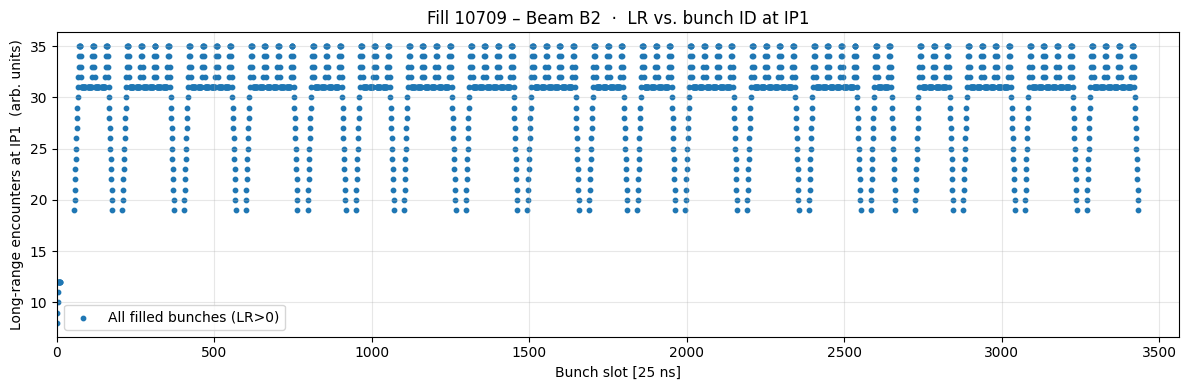

In [7]:
beam = 'B2'          # 'B2'
ip   = 'ip1'         # 'ip1', 'ip2', 'ip5', 'ip8'
orbit_len = 3564

# LR array and "filled + LR>0" flag
lr_b2 = fpat.lrencounters[beam][ip]               # length-3564 array
filled = fpat.bunches_b2

is_filled_lr = np.zeros(3564, dtype=bool)
is_filled_lr[filled] = lr_b2[filled] > 0   
# Get the corresponding LR values from the lr array
bid_firsts = fpat.bunchtrainsDF_b2['bid_first'].values
lr_values = lr_b2[bid_firsts]
#holds both the first bunch data and the corresponding lr values
first_bunch_data = np.array(list(zip(bid_firsts, lr_values)), dtype=[('bid_first', int), ('lr', float)])
plt.figure(figsize=(12, 4))
# background: every filled bunch with LR>0
slots = np.arange(3564)
plt.scatter(slots[is_filled_lr], lr_b2[is_filled_lr],
            s=10, color="tab:blue", label="All filled bunches (LR>0)")
plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range encounters at {ip.upper()}  (arb. units)")
plt.title(f"Fill {fpat.fill_number} – Beam {beam}  ·  LR vs. bunch ID at {ip.upper()}")
plt.grid(alpha=0.3)

plt.xlim(0, orbit_len)
plt.legend()
plt.tight_layout()
plt.show()

## Family 1

bid_firsts after gap = 32 or 63:
 [  55  208  404  600  796  949 1102 1298 1494 1690 1843 1996 2192 2388
 2584 2725 2878 3074 3270]
Number of such trains: 19
Corresponding LR values:
 [19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.
 19.]


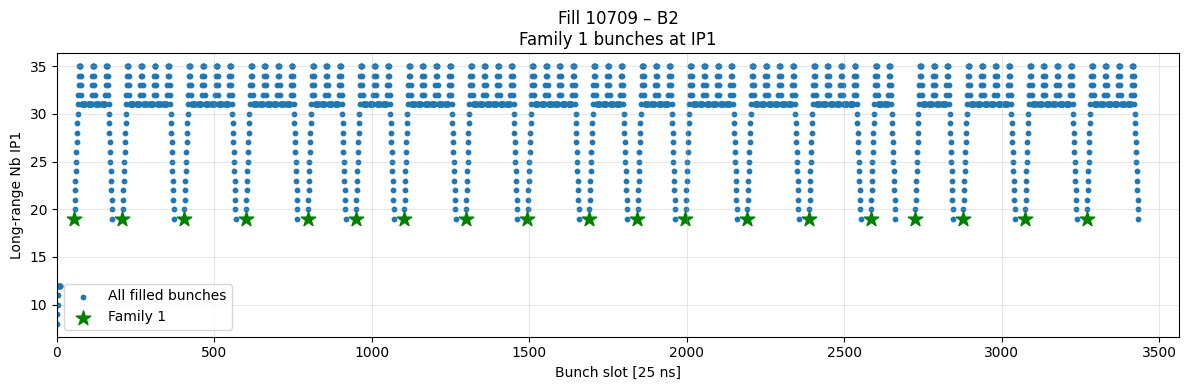

In [8]:
trains_gap_long_b2   = fpat.bunchtrainsDF_b2[fpat.bunchtrainsDF_b2["gap"].isin([32, 63,44])]
Family_1   = trains_gap_long_b2["bid_first"].to_numpy(int)
lr_values_long_b2    = lr_b2[Family_1]

plt.figure(figsize=(12, 4))
plt.scatter(slots[is_filled_lr], lr_b2[is_filled_lr],
            s=10, color="tab:blue", label="All filled bunches")

print("bid_firsts after gap = 32 or 63:\n", Family_1)
print("Number of such trains:", len(Family_1))

# corresponding LR values ──────────────────────────────────────────
lr_values_long = lr_b2[Family_1]
print("Corresponding LR values:\n", lr_values_long)

# train heads after a 32- or 63-slot gap
plt.scatter(Family_1, lr_values_long_b2,
            marker="*", s=120, color="green",
            label="Family 1")
plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.title(f"Fill {fpat.fill_number} – {beam}\nFamily 1 bunches at {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
# plt.xlim(50, 250)
plt.xlim(0, orbit_len)
plt.tight_layout()
plt.show()


## Family 2

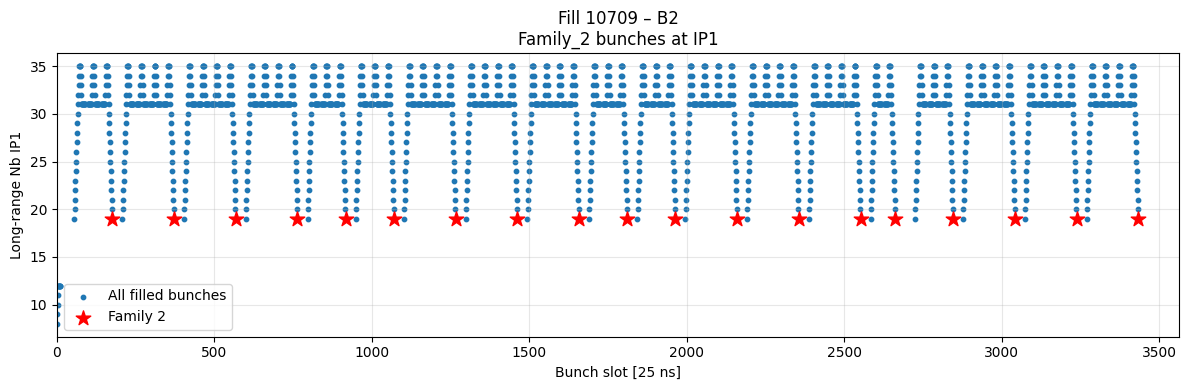

Last bunches before 32/63-slot gaps:
 [ 176  372  568  764  917 1070 1266 1462 1658 1811 1964 2160 2356 2552
 2662 2846 3042 3238 3434]
Number of such bunches: 19
Corresponding LR values:
 [19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.
 19.]


In [9]:
df_b2 = fpat.bunchtrainsDF_b2.sort_values("bid_first").reset_index(drop=True)
next_start = df_b2["bid_first"].shift(-1).fillna(orbit_len).astype(int)
df_b2["gap_after"] = next_start - df_b2["bid_last"] - 1

mask_big_gap = df_b2["gap_after"] >= 31
Family_2 = df_b2.loc[mask_big_gap, "bid_last"].to_numpy(int)
lr_last_b2 = lr_b2[Family_2]

# ─── Plot ─────────────────────────────────────────────────────────────
slots = np.arange(orbit_len)
filled = fpat.bunches_b2
is_filled_lr = np.zeros_like(slots, dtype=bool)
is_filled_lr[filled] = lr_b2[filled] > 0

plt.figure(figsize=(12, 4))
plt.scatter(slots[is_filled_lr], lr_b2[is_filled_lr],
            s=10, color="tab:blue", label="All filled bunches")
plt.scatter(Family_2, lr_last_b2,
            marker="*", s=120, color="red", label="Family 2")

plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.title(f"Fill {fpat.fill_number} – B2\nFamily_2 bunches at {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, orbit_len)
plt.tight_layout()
plt.show()
print("Last bunches before 32/63-slot gaps:\n", Family_2)
print("Number of such bunches:", len(Family_2))
lr_last = lr_b2[Family_2]
print("Corresponding LR values:\n", lr_last)

## Family 3

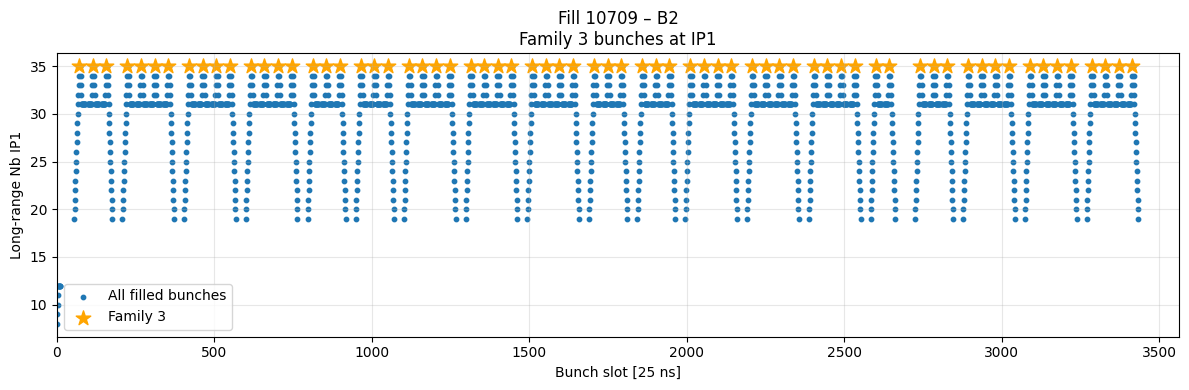

First-maximum slot of each train:
 [  71  114  157  224  267  310  353  420  463  506  549  616  659  702
  745  812  855  898  965 1008 1051 1118 1161 1204 1247 1314 1357 1400
 1443 1510 1553 1596 1639 1706 1749 1792 1859 1902 1945 2012 2055 2098
 2141 2208 2251 2294 2337 2404 2447 2490 2533 2600 2643 2741 2784 2827
 2894 2937 2980 3023 3090 3133 3176 3219 3286 3329 3372 3415]
Number of such bunches: 68
Corresponding LR values:
 [35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.]


In [10]:
def first_maxima_per_train(df, lr_array):
    Family_3, peak_vals_b2 = [], []
    for bids in df["bids"]:
        bids = np.asarray(bids, int)
        lr_vals = lr_array[bids]
        max_val = lr_vals.max()
        first_idx = np.where(lr_vals == max_val)[0][0]
        Family_3.append(bids[first_idx])
        peak_vals_b2.append(max_val)
    return np.array(Family_3, int), np.array(peak_vals_b2)
df_b2 = fpat.bunchtrainsDF_b2
lr_b2 = fpat.lrencounters["B2"][ip]
Family_3, peak_vals_b2 = first_maxima_per_train(df_b2, lr_b2)
plt.figure(figsize=(12, 4))
plt.scatter(slots[is_filled_lr], lr_b2[is_filled_lr],
            s=10, color="tab:blue", label="All filled bunches")
plt.scatter(Family_3, peak_vals_b2,
            marker="*", s=120, color="orange", label="Family 3")

plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.title(f"Fill {fpat.fill_number} – B2\nFamily 3 bunches at {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 3564)
plt.tight_layout()
plt.show()
print("First-maximum slot of each train:\n", Family_3)
print("Number of such bunches:", len(Family_3))
print("Corresponding LR values:\n", peak_vals_b2)

## Family 4

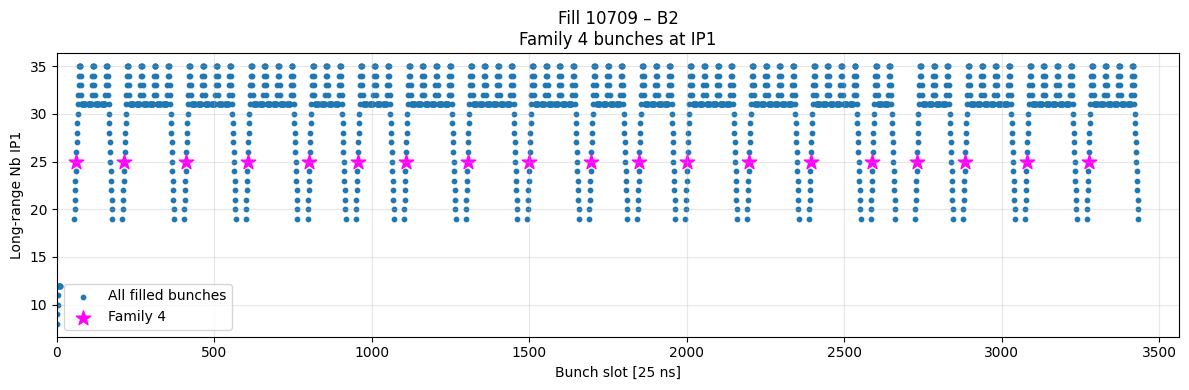

7-th bunch in each long-gap train:
 [  61  214  410  606  802  955 1108 1304 1500 1696 1849 2002 2198 2394
 2590 2731 2884 3080 3276]
Number of such bunches: 19
Corresponding LR values:
 [25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25.]


In [11]:
# ─── 7th bunch in trains with 32/63-slot leading gaps (Beam 2) ────────────
df_gap_b2 = fpat.bunchtrainsDF_b2[fpat.bunchtrainsDF_b2["gap"].isin([32,44, 63])]
Family_4 = (df_gap_b2["bid_first"] + 6).to_numpy(int)  # 7th = first + 6
bunch7_lr_b2 = fpat.lrencounters["B2"][ip][Family_4]      # LR values
lr_b2 = fpat.lrencounters["B2"][ip]
filled_b2 = fpat.bunches_b2
plt.figure(figsize=(12, 4))
plt.scatter(slots[is_filled_lr], lr_b2[is_filled_lr],
            s=10, color="tab:blue", label="All filled bunches")
plt.scatter(Family_4, bunch7_lr_b2,
            marker="*", s=120, color="magenta",
            label="Family 4")

plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.title(f"Fill {fpat.fill_number} – B2\nFamily 4 bunches at {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, orbit_len)
plt.tight_layout()
plt.show()
print("7-th bunch in each long-gap train:\n", Family_4)
print("Number of such bunches:", len(Family_4))
print("Corresponding LR values:\n", bunch7_lr_b2)


## Family 5

15th bunch in each long-gap train (gap=8):
 [ 112  155  265  308  351  461  504  547  657  700  743  853  896 1006
 1049 1159 1202 1245 1355 1398 1441 1551 1594 1637 1747 1790 1900 1943
 2053 2096 2139 2249 2292 2335 2445 2488 2531 2641 2782 2825 2935 2978
 3021 3131 3174 3217 3327 3370 3413]
Number of such bunches: 49
Corresponding LR values:
 [33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.]


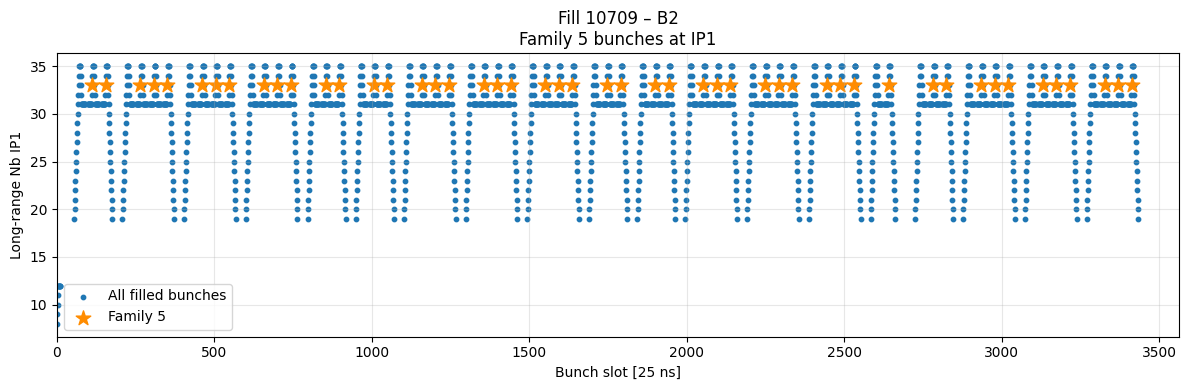

In [12]:
# ─── 15th bunch in trains after 8-slot gap (Beam 2) ───────────────────────
df_gap_b2 = (
    fpat.bunchtrainsDF_b2
        .loc[fpat.bunchtrainsDF_b2['gap'].isin([8])]
        .query("nbunches >= 15")  # Ensure a 15th bunch exists
)

Family_5 = (df_gap_b2['bid_first'] + 14).to_numpy(int)
print("15th bunch in each long-gap train (gap=8):\n", Family_5 )
print("Number of such bunches:", len(Family_5 ))

lr_b2 = fpat.lrencounters["B2"][ip]
bunch15_lr_b2 = lr_b2[Family_5 ]
print("Corresponding LR values:\n", bunch15_lr_b2)

slots_b2 = np.arange(3564)
filled_b2 = fpat.bunches_b2
is_filled_lr_b2 = np.zeros_like(slots_b2, dtype=bool)
is_filled_lr_b2[filled_b2] = lr_b2[filled_b2] > 0
plt.figure(figsize=(12, 4))
plt.scatter(slots_b2[is_filled_lr_b2], lr_b2[is_filled_lr_b2],
            s=10, color="tab:blue", label="All filled bunches")
plt.scatter(Family_5, bunch15_lr_b2,
            marker="*", s=120, color="darkorange",
            label="Family 5")
plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.title(f"Fill {fpat.fill_number} – B2\nFamily 5 bunches at {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, orbit_len)
plt.tight_layout()
plt.show()


## Family 6

27th bunch (trains before gap=8): [  81  124  234  277  320  430  473  516  626  669  712  822  865  975
 1018 1128 1171 1214 1324 1367 1410 1520 1563 1606 1716 1759 1869 1912
 2022 2065 2108 2218 2261 2304 2414 2457 2500 2610 2751 2794 2904 2947
 2990 3100 3143 3186 3296 3339 3382]
How many: 49


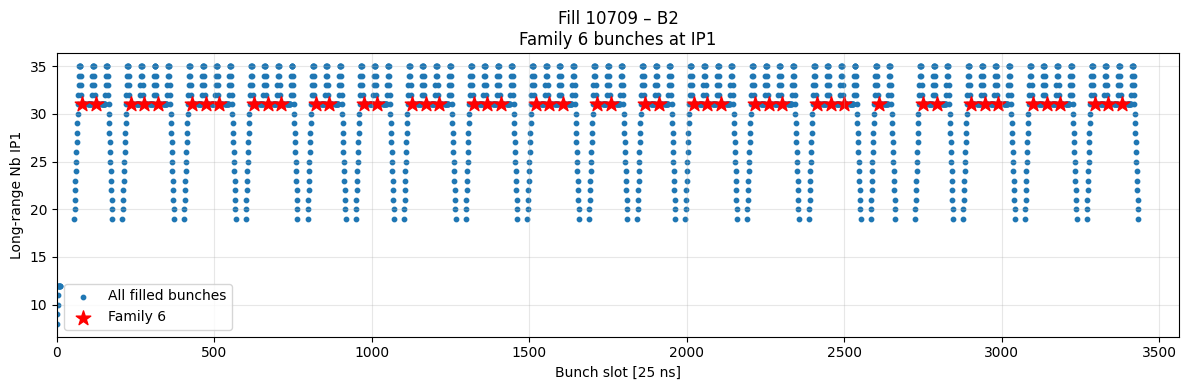

In [13]:
df_b2 = fpat.bunchtrainsDF_b2.sort_values("bid_first").reset_index(drop=True)

train_before_gap8_b2 = (
    df_b2.shift(1)                      # look at previous train
         .loc[df_b2["gap"] == 8]       # where the current gap is 8
         .dropna()
         .query("nbunches >= 27")      # ensure the 27-th bunch exists
)

Family_6 = (train_before_gap8_b2["bid_first"] + 26).to_numpy(int)
print("27th bunch (trains before gap=8):", Family_6)
print("How many:", len(Family_6))
lr_b2 = fpat.lrencounters["B2"][ip]
bunch27_lr_b2 = lr_b2[Family_6]
filled_b2 = fpat.bunches_b2
is_filled_lr_b2 = np.zeros_like(slots, dtype=bool)
is_filled_lr_b2[filled_b2] = lr_b2[filled_b2] > 0

plt.figure(figsize=(12, 4))
plt.scatter(slots[is_filled_lr_b2], lr_b2[is_filled_lr_b2],
            s=10, color="tab:blue", label="All filled bunches")

plt.scatter(Family_6, bunch27_lr_b2,
            marker="*", s=120, color="red",
            label="Family 6")

plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.title(f"Fill {fpat.fill_number} – B2\nFamily 6 bunches at {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, orbit_len)
plt.tight_layout()
plt.show()


## Family 7

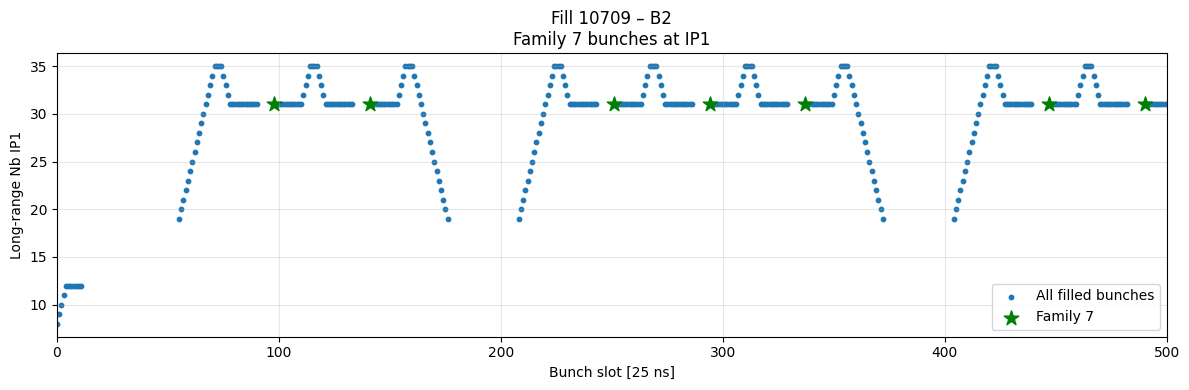

First bunch after each 8-slot gap:
 [  98  141  251  294  337  447  490  533  643  686  729  839  882  992
 1035 1145 1188 1231 1341 1384 1427 1537 1580 1623 1733 1776 1886 1929
 2039 2082 2125 2235 2278 2321 2431 2474 2517 2627 2768 2811 2921 2964
 3007 3117 3160 3203 3313 3356 3399]
Number of such bunches: 49
Corresponding LR values:
 [31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.]


In [14]:
df_small_gap8_b2 = fpat.bunchtrainsDF_b2.query("gap == 8")
Family_7 = df_small_gap8_b2["bid_first"].to_numpy(int)
lr_b2 = fpat.lrencounters["B2"][ip]
lr_vals_b2 = lr_b2[Family_7]
is_filled = np.zeros(3564, dtype=bool)
is_filled[fpat.bunches_b2] = lr_b2[fpat.bunches_b2] > 0

plt.figure(figsize=(12, 4))
plt.scatter(np.arange(3564)[is_filled], lr_b2[is_filled],
            s=10, color="tab:blue", label="All filled bunches")
plt.scatter(Family_7, lr_vals_b2,
            marker="*", s=120, color="green", label="Family 7")

plt.title(f"Fill {fpat.fill_number} – B2\nFamily 7 bunches at {ip.upper()}")
plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 500)
plt.tight_layout()
plt.show()
print("First bunch after each 8-slot gap:\n", Family_7)
print("Number of such bunches:", len(Family_7))

lr_first_after = lr_b2[Family_7]
print("Corresponding LR values:\n", lr_first_after)


## Family 8

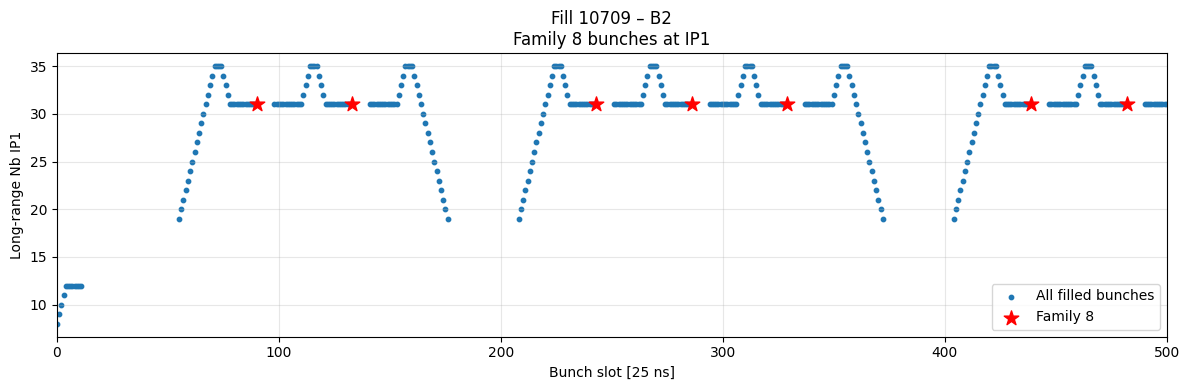

Last bunch before each 8-slot gap:
 [  90  133  243  286  329  439  482  525  635  678  721  831  874  984
 1027 1137 1180 1223 1333 1376 1419 1529 1572 1615 1725 1768 1878 1921
 2031 2074 2117 2227 2270 2313 2423 2466 2509 2619 2760 2803 2913 2956
 2999 3109 3152 3195 3305 3348 3391]
Number of such bunches: 49
Corresponding LR values:
 [31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.
 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.]


In [15]:
mask_gap8 = df_b2["gap"] == 8
df_before_gap8_b2 = df_b2.shift(1).loc[mask_gap8].dropna()
Family_8 = df_before_gap8_b2["bid_last"].to_numpy(int)
lr_b2 = fpat.lrencounters["B2"][ip]
lr_vals_b2 = lr_b2[Family_8 ]

filled_b2 = fpat.bunches_b2
is_filled_lr = np.zeros(3564, dtype=bool)
is_filled_lr[filled_b2] = lr_b2[filled_b2] > 0

plt.figure(figsize=(12, 4))
plt.scatter(np.arange(3564)[is_filled_lr], lr_b2[is_filled_lr],
            s=10, color="tab:blue", label="All filled bunches")
plt.scatter(Family_8 , lr_vals_b2,
            marker="*", s=120, color="red", label="Family 8")

plt.title(f"Fill {fpat.fill_number} – B2\nFamily 8 bunches at {ip.upper()}")
plt.xlabel("Bunch slot [25 ns]")
plt.ylabel(f"Long-range Nb {ip.upper()}")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 500)
plt.tight_layout()
plt.show()
print("Last bunch before each 8-slot gap:\n", Family_8 )
print("Number of such bunches:", len(Family_8 ))

# ── 4. corresponding LR values ───────────────────────────────────────────
lr_last_before = lr_b2[Family_8 ]
print("Corresponding LR values:\n", lr_last_before)


# Selecting Colliding Bunches

In [16]:
# colliding-bunch masks for each IP, B1 side
ip15_b2 = np.asarray(fpat.collbid_ip15["B2"], dtype=int)
ip2_b2  = np.asarray(fpat.collbid_ip2 ["B2"], dtype=int)
ip8_b2  = np.asarray(fpat.collbid_ip8 ["B2"], dtype=int)
set15_2  = set(ip15_b2)
set2_2     = set(ip2_b2)
set8_2     = set(ip8_b2)

## Family 1

In [17]:
# ── 1. Basic sets ────────────────────────────────────────────────────────
trains_gap_long_b2 = fpat.bunchtrainsDF_b2[
    fpat.bunchtrainsDF_b2["gap"].isin([32, 63, 44])
]
Family_1 = np.asarray(trains_gap_long_b2["bid_first"], dtype=int)
set_long_first_b2  = set(Family_1)
set15 = set15_2
set2  = set2_2
set8  = set8_2

# ── 2. Exclusive single‐IP lists ────────────────────────────────────────
Family_1_in_only_15_b2 = np.array(
    sorted(set_long_first_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_1_in_only_2_b2  = np.array(
    sorted(set_long_first_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_1_in_only_8_b2  = np.array(
    sorted(set_long_first_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi‐IP intersections ────────────────────────────────────────────
Family_1_in_15_2_b2   = np.array(
    sorted((set_long_first_b2 & set15 & set2)-set8),
    dtype=int
)
Family_1_in_15_8_b2   = np.array(
    sorted((set_long_first_b2 & set15 & set8)-set2),
    dtype=int
)
Family_1_in_2_8_b2    = np.array(
    sorted((set_long_first_b2 & set2  & set8)-set15),
    dtype=int
)
Family_1_in_15_2_8_b2 = np.array(
    sorted(set_long_first_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Helper to print results ───────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",         Family_1_in_only_15_b2)
show("Only in IP2  (B2)",         Family_1_in_only_2_b2)
show("Only in IP8  (B2)",         Family_1_in_only_8_b2)
show("In IP15 AND IP2 (B2)",      Family_1_in_15_2_b2)
show("In IP15 AND IP8 (B2)",      Family_1_in_15_8_b2)
show("In IP2  AND IP8 (B2)",      Family_1_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)", Family_1_in_15_2_8_b2)


Only in IP15 (B2) (0): []
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (1): [2584]
In IP15 AND IP8 (B2) (5): [ 796 2725 2878 3074 3270]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (13): [  55  208  404  600  949 1102 1298 1494 1690 1843 1996 2192 2388]


## Family 2

In [18]:
# ── 1. Convert to numpy array and sets ────────────────────────────────────
last_before_big_gap_b2 = np.asarray(Family_2, dtype=int)
set_tail_b2 = set(last_before_big_gap_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

# only in one IP (and nowhere else)
Family_2_in_only_15_b2 = np.array(
    sorted(set_tail_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_2_in_only_2_b2  = np.array(
    sorted(set_tail_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_2_in_only_8_b2  = np.array(
    sorted(set_tail_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ─────────────────────────────────────────────
Family_2_in_15_2_b2   = np.array(
    sorted((set_tail_b2 & set15 & set2)-set8),
    dtype=int
)
Family_2_in_15_8_b2   = np.array(
    sorted((set_tail_b2 & set15 & set8)-set2),
    dtype=int
)
Family_2_in_2_8_b2    = np.array(
    sorted((set_tail_b2 & set2  & set8)-set15),
    dtype=int
)
Family_2_in_15_2_8_b2 = np.array(
    sorted(set_tail_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Print results ─────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_2_in_only_15_b2)
show("Only in IP2  (B2)",           Family_2_in_only_2_b2)
show("Only in IP8  (B2)",           Family_2_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_2_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_2_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_2_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_2_in_15_2_8_b2)


Only in IP15 (B2) (6): [1811 1964 2160 2356 2552 2662]
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (0): []
In IP15 AND IP8 (B2) (9): [ 176  372  568  764  917 1070 1266 1462 1658]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (4): [2846 3042 3238 3434]


## Family 3

In [19]:
# ── 1. Convert to numpy array and sets ────────────────────────────────────
peak_slots_b2      = np.asarray(Family_3, dtype=int)
set_long_max_b2    = set(peak_slots_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

Family_3_in_only_15_b2 = np.array(
    sorted(set_long_max_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_3_in_only_2_b2  = np.array(
    sorted(set_long_max_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_3_in_only_8_b2  = np.array(
    sorted(set_long_max_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ──────────────────────────────────────────────
Family_3_in_15_2_b2   = np.array(
    sorted((set_long_max_b2 & set15 & set2)-set8),
    dtype=int
)
Family_3_in_15_8_b2   = np.array(
    sorted((set_long_max_b2 & set15 & set8)-set2),
    dtype=int
)
Family_3_in_2_8_b2    = np.array(
    sorted((set_long_max_b2 & set2  & set8)-set15),
    dtype=int
)
Family_3_in_15_2_8_b2 = np.array(
    sorted(set_long_max_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Print results ─────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_3_in_only_15_b2)
show("Only in IP2  (B2)",           Family_3_in_only_2_b2)
show("Only in IP8  (B2)",           Family_3_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_3_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_3_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_3_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_3_in_15_2_8_b2)


Only in IP15 (B2) (0): []
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (3): [1792 2600 2643]
In IP15 AND IP8 (B2) (3): [812 855 898]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (62): [  71  114  157  224  267  310  353  420  463  506  549  616  659  702
  745  965 1008 1051 1118 1161 1204 1247 1314 1357 1400 1443 1510 1553
 1596 1639 1706 1749 1859 1902 1945 2012 2055 2098 2141 2208 2251 2294
 2337 2404 2447 2490 2533 2741 2784 2827 2894 2937 2980 3023 3090 3133
 3176 3219 3286 3329 3372 3415]


## Family 4

In [20]:
# ── 1. Convert to numpy array and sets ────────────────────────────────────
bunch7_slots_b2   = np.asarray(Family_4, dtype=int)
set_long_7_b2     = set(bunch7_slots_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

Family_4_in_only_15_b2 = np.array(
    sorted(set_long_7_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_4_in_only_2_b2  = np.array(
    sorted(set_long_7_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_4_in_only_8_b2  = np.array(
    sorted(set_long_7_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ─────────────────────────────────────────────
Family_4_in_15_2_b2   = np.array(
    sorted((set_long_7_b2 & set15 & set2)-set8),
    dtype=int
)
Family_4_in_15_8_b2   = np.array(
    sorted((set_long_7_b2 & set15 & set8)-set2),
    dtype=int
)
Family_4_in_2_8_b2    = np.array(
    sorted((set_long_7_b2 & set2  & set8)-set15),
    dtype=int
)
Family_4_in_15_2_8_b2 = np.array(
    sorted(set_long_7_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Print results ─────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_4_in_only_15_b2)
show("Only in IP2  (B2)",           Family_4_in_only_2_b2)
show("Only in IP8  (B2)",           Family_4_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_4_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_4_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_4_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_4_in_15_2_8_b2)


Only in IP15 (B2) (0): []
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (1): [2590]
In IP15 AND IP8 (B2) (5): [ 802 2731 2884 3080 3276]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (13): [  61  214  410  606  955 1108 1304 1500 1696 1849 2002 2198 2394]


## Family 5

In [21]:
# ── 1. Convert to numpy array and sets ────────────────────────────────────
bunch15_slots_b2   = np.asarray(Family_5, dtype=int)
set_long_15_b2     = set(bunch15_slots_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

Family_5_in_only_15_b2 = np.array(
    sorted(set_long_15_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_5_in_only_2_b2  = np.array(
    sorted(set_long_15_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_5_in_only_8_b2  = np.array(
    sorted(set_long_15_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ─────────────────────────────────────────────
Family_5_in_15_2_b2   = np.array(
    sorted((set_long_15_b2 & set15 & set2)-set8),
    dtype=int
)
Family_5_in_15_8_b2   = np.array(
    sorted((set_long_15_b2 & set15 & set8)-set2),
    dtype=int
)
Family_5_in_2_8_b2    = np.array(
    sorted((set_long_15_b2 & set2  & set8)-set15),
    dtype=int
)
Family_5_in_15_2_8_b2 = np.array(
    sorted(set_long_15_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Print results ─────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_5_in_only_15_b2)
show("Only in IP2  (B2)",           Family_5_in_only_2_b2)
show("Only in IP8  (B2)",           Family_5_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_5_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_5_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_5_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_5_in_15_2_8_b2)


Only in IP15 (B2) (0): []
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (2): [1790 2641]
In IP15 AND IP8 (B2) (2): [853 896]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (45): [ 112  155  265  308  351  461  504  547  657  700  743 1006 1049 1159
 1202 1245 1355 1398 1441 1551 1594 1637 1747 1900 1943 2053 2096 2139
 2249 2292 2335 2445 2488 2531 2782 2825 2935 2978 3021 3131 3174 3217
 3327 3370 3413]


## Family 6

In [22]:
# ── 1. Convert to numpy array and sets ────────────────────────────────────
bunch27_slots_b2   = np.asarray(Family_6, dtype=int)
set_long_27_b2     = set(bunch27_slots_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

Family_6_in_only_15_b2 = np.array(
    sorted(set_long_27_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_6_in_only_2_b2  = np.array(
    sorted(set_long_27_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_6_in_only_8_b2  = np.array(
    sorted(set_long_27_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ─────────────────────────────────────────────
Family_6_in_15_2_b2   = np.array(
    sorted((set_long_27_b2 & set15 & set2)-set8),
    dtype=int
)
Family_6_in_15_8_b2   = np.array(
    sorted((set_long_27_b2 & set15 & set8)-set2),
    dtype=int
)
Family_6_in_2_8_b2    = np.array(
    sorted((set_long_27_b2 & set2  & set8)-set15),
    dtype=int
)
Family_6_in_15_2_8_b2 = np.array(
    sorted(set_long_27_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Print results ─────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_6_in_only_15_b2)
show("Only in IP2  (B2)",           Family_6_in_only_2_b2)
show("Only in IP8  (B2)",           Family_6_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_6_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_6_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_6_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_6_in_15_2_8_b2)


Only in IP15 (B2) (0): []
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (12): [1869 1912 2022 2065 2108 2218 2261 2304 2414 2457 2500 2610]
In IP15 AND IP8 (B2) (2): [822 865]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (35): [  81  124  234  277  320  430  473  516  626  669  712  975 1018 1128
 1171 1214 1324 1367 1410 1520 1563 1606 1716 1759 2751 2794 2904 2947
 2990 3100 3143 3186 3296 3339 3382]


## Family 7

In [23]:
# ── 1. Convert to numpy array and sets ────────────────────────────────────
first_after_gap8_b2         = np.asarray(list(Family_7), dtype=int)
set_first_after_gap8_b2     = set(first_after_gap8_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

Family_7_in_only_15_b2 = np.array(
    sorted(set_first_after_gap8_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_7_in_only_2_b2  = np.array(
    sorted(set_first_after_gap8_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_7_in_only_8_b2  = np.array(
    sorted(set_first_after_gap8_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ─────────────────────────────────────────────
Family_7_in_15_2_b2   = np.array(
    sorted((set_first_after_gap8_b2 & set15 & set2)-set8),
    dtype=int
)
Family_7_in_15_8_b2   = np.array(
    sorted((set_first_after_gap8_b2 & set15 & set8)-set2),
    dtype=int
)
Family_7_in_2_8_b2    = np.array(
    sorted((set_first_after_gap8_b2 & set2  & set8)-set15),
    dtype=int
)
Family_7_in_15_2_8_b2 = np.array(
    sorted(set_first_after_gap8_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Display results ────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_7_in_only_15_b2)
show("Only in IP2  (B2)",           Family_7_in_only_2_b2)
show("Only in IP8  (B2)",           Family_7_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_7_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_7_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_7_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_7_in_15_2_8_b2)


Only in IP15 (B2) (0): []
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (2): [1776 2627]
In IP15 AND IP8 (B2) (2): [839 882]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (45): [  98  141  251  294  337  447  490  533  643  686  729  992 1035 1145
 1188 1231 1341 1384 1427 1537 1580 1623 1733 1886 1929 2039 2082 2125
 2235 2278 2321 2431 2474 2517 2768 2811 2921 2964 3007 3117 3160 3203
 3313 3356 3399]


## Family 8

In [24]:
# ── 1. Convert to numpy array and set ─────────────────────────────────────
last_before_gap8_b2       = np.asarray(list(Family_8), dtype=int)
set_last_before_gap8_b2   = set(last_before_gap8_b2)

# ── 2. Exclusive single-IP lists ─────────────────────────────────────────
# basic IP-sets
set15 = set15_2
set2  = set2_2
set8  = set8_2

Family_8_in_only_15_b2 = np.array(
    sorted(set_last_before_gap8_b2 & set15  - (set2 | set8)),
    dtype=int
)
Family_8_in_only_2_b2  = np.array(
    sorted(set_last_before_gap8_b2 & set2   - (set15 | set8)),
    dtype=int
)
Family_8_in_only_8_b2  = np.array(
    sorted(set_last_before_gap8_b2 & set8   - (set15 | set2)),
    dtype=int
)

# ── 3. Multi-IP intersections ─────────────────────────────────────────────
Family_8_in_15_2_b2   = np.array(
    sorted((set_last_before_gap8_b2 & set15 & set2)-set8),
    dtype=int
)
Family_8_in_15_8_b2   = np.array(
    sorted((set_last_before_gap8_b2 & set15 & set8)-set2),
    dtype=int
)
Family_8_in_2_8_b2    = np.array(
    sorted((set_last_before_gap8_b2 & set2  & set8)-set15),
    dtype=int
)
Family_8_in_15_2_8_b2 = np.array(
    sorted(set_last_before_gap8_b2 & set15 & set2 & set8),
    dtype=int
)

# ── 4. Display results ────────────────────────────────────────────────────
def show(name, arr):
    print(f"{name} ({len(arr)}): {arr}")

show("Only in IP15 (B2)",           Family_8_in_only_15_b2)
show("Only in IP2  (B2)",           Family_8_in_only_2_b2)
show("Only in IP8  (B2)",           Family_8_in_only_8_b2)
show("In IP15 AND IP2 (B2)",        Family_8_in_15_2_b2)
show("In IP15 AND IP8 (B2)",        Family_8_in_15_8_b2)
show("In IP2  AND IP8 (B2)",        Family_8_in_2_8_b2)
show("In IP15, IP2 AND IP8 (B2)",   Family_8_in_15_2_8_b2)


Only in IP15 (B2) (1): [2619]
Only in IP2  (B2) (0): []
Only in IP8  (B2) (0): []
In IP15 AND IP2 (B2) (0): []
In IP15 AND IP8 (B2) (37): [  90  133  243  286  329  439  482  525  635  678  721  831  874  984
 1027 1137 1180 1223 1333 1376 1419 1529 1572 1615 1725 1768 1878 1921
 2031 2074 2117 2227 2270 2313 2423 2466 2509]
In IP2  AND IP8 (B2) (0): []
In IP15, IP2 AND IP8 (B2) (11): [2760 2803 2913 2956 2999 3109 3152 3195 3305 3348 3391]


## TABLE

In [25]:
def to_int_array(obj):
    """Return a 1-D NumPy int array, whether obj is list, ndarray, or set."""
    if isinstance(obj, set):
        obj = list(obj)
    return np.asarray(obj, dtype=int)

# ── Slot groups for Beam 2 ─────────────────────────────────────────────────
slot_sets_b2 = {
    "Family 1" : to_int_array(Family_1),
    "Family 2": to_int_array(Family_2),
    "Family 3"      : to_int_array(Family_3),
    "Family 4"          : to_int_array(Family_4),
    "Family 5"         : to_int_array(Family_5),
    "Family 6"         : to_int_array(Family_6),
    "Family 7"    : to_int_array(Family_7),
    "Family 8"  : to_int_array(Family_8),
}

# IP-colliding bunch sets for Beam 2
ip15 = set(fpat.collbid_ip15["B2"])
ip2  = set(fpat.collbid_ip2 ["B2"])
ip8  = set(fpat.collbid_ip8 ["B2"])

# ── Generate exclusive‐intersection summary ─────────────────────────────────
rows_b2 = []
for label, arr in slot_sets_b2.items():
    s = set(arr)
    only15   = s & ip15            - (ip2 | ip8)
    only2    = s & ip2             - (ip15 | ip8)
    only8    = s & ip8             - (ip15 | ip2)
    only15_2 = (s & ip15 & ip2)    - ip8
    only15_8 = (s & ip15 & ip8)    - ip2
    only2_8  = (s & ip2  & ip8)    - ip15
    only15_2_8 = s & ip15 & ip2 & ip8

    rows_b2.append({
        "Group"          : label,
        "Total"          : len(arr),
        "In IP15 only"   : len(only15),
        "In IP2 only"    : len(only2),
        "In IP8 only"    : len(only8),
        "IP15∩IP2 only"  : len(only15_2),
        "IP15∩IP8 only"  : len(only15_8),
        "IP2∩IP8 only"   : len(only2_8),
        "IP15∩IP2∩IP8"   : len(only15_2_8),
    })

summary_b2 = pd.DataFrame(rows_b2).set_index("Group")
summary_b2


,Total,In IP15 only,In IP2 only,In IP8 only,IP15∩IP2 only,IP15∩IP8 only,IP2∩IP8 only,IP15∩IP2∩IP8
Group,,,,,,,,
Family 1,19,0,0,0,1,5,0,13
Family 2,19,6,0,0,0,9,0,4
Family 3,68,0,0,0,3,3,0,62
Family 4,19,0,0,0,1,5,0,13
Family 5,49,0,0,0,2,2,0,45
Family 6,49,0,0,0,12,2,0,35
Family 7,49,0,0,0,2,2,0,45
Family 8,49,1,0,0,0,37,0,11


# ANALYSIS

## Intensity

### Mean Intensity classified by bunch position

/tmp/ipykernel_358915/589935502.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette    = plt.cm.get_cmap("tab10").colors


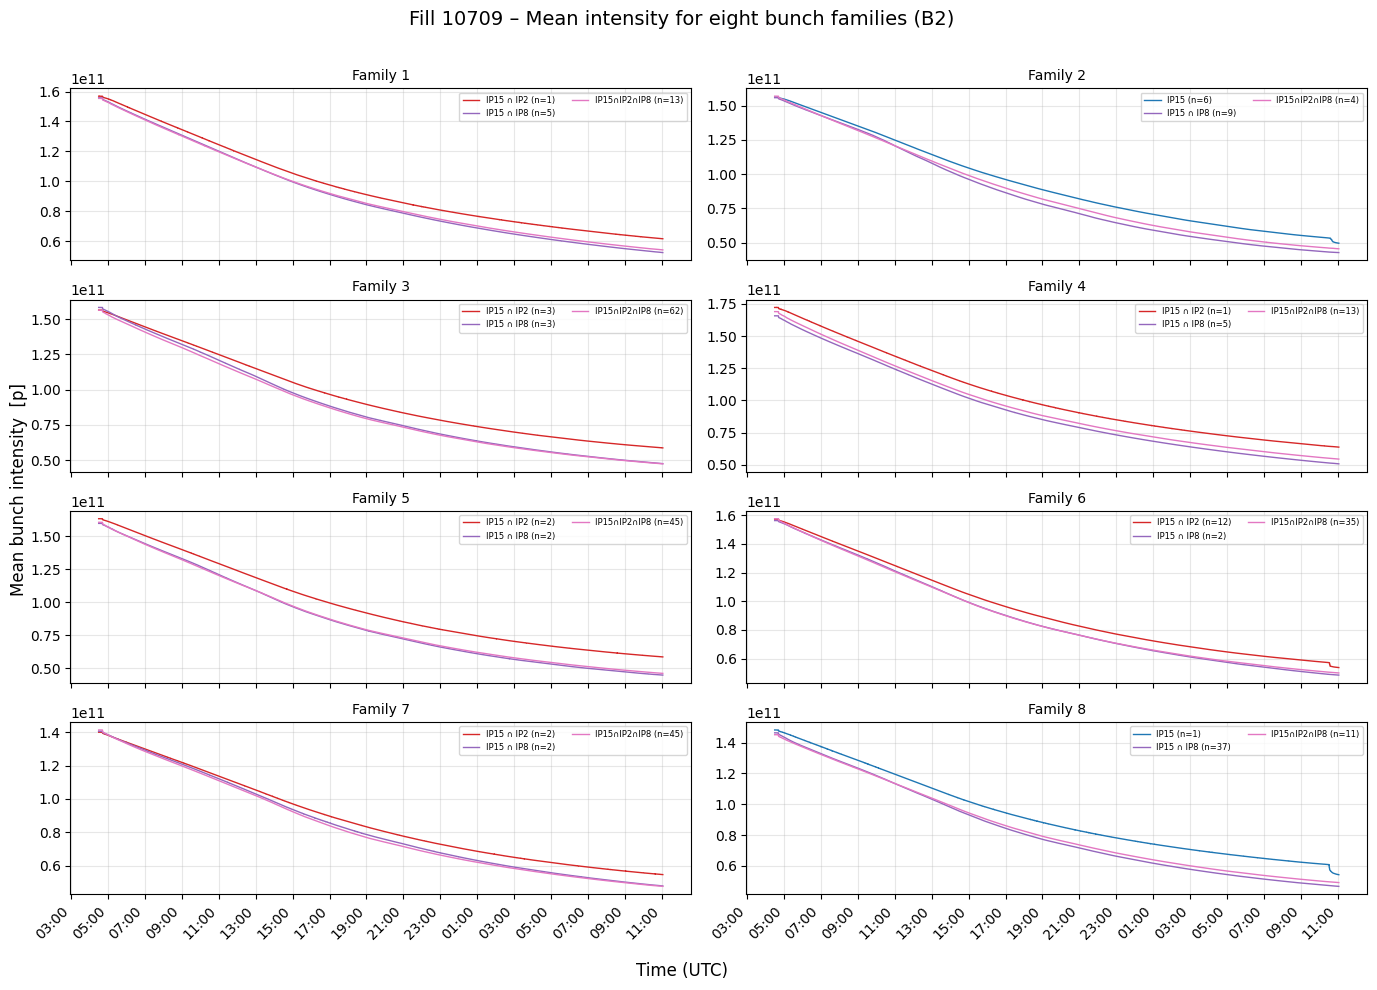

n          mean           std
Family   Group                                       
Family 1 IP15 ∩ IP2     1  9.688769e+10  2.816546e+10
         IP15 ∩ IP8     5  9.046356e+10  3.024105e+10
         IP15∩IP2∩IP8  13  9.117485e+10  2.943669e+10
Family 2 IP15           6  9.320948e+10  3.144947e+10
         IP15 ∩ IP8     9  8.488191e+10  3.473417e+10
         IP15∩IP2∩IP8   4  8.725790e+10  3.348870e+10
Family 3 IP15 ∩ IP2     3  9.532900e+10  2.937524e+10
         IP15 ∩ IP8     3  8.776770e+10  3.288507e+10
         IP15∩IP2∩IP8  62  8.654301e+10  3.215287e+10
Family 4 IP15 ∩ IP2     1  1.033463e+11  3.195946e+10
         IP15 ∩ IP8     5  9.212370e+10  3.326566e+10
         IP15∩IP2∩IP8  13  9.527417e+10  3.301303e+10
Family 5 IP15 ∩ IP2     2  9.764858e+10  3.152149e+10
         IP15 ∩ IP8     2  8.625496e+10  3.442122e+10
         IP15∩IP2∩IP8  45  8.677489e+10  3.378131e+10
Family 6 IP15 ∩ IP2    12  9.444877e+10  3.032987e+10
         IP15 ∩ IP8     2  8.882786e+10  3.221661e+10
         IP15∩IP2∩IP8  35  8.904049e+10  3.177078e+10
Family 7 IP15 ∩ IP2     2  8.754346e+10  2.578601e+10
         IP15 ∩ IP8     2  8.352697e+10  2.792849e+10
         IP15∩IP2∩IP8  45  8.253152e+10  2.792581e+10
Family 8 IP15           1  9.312257e+10  2.640730e+10
         IP15 ∩ IP8    37  8.336670e+10  2.967084e+10
         IP15∩IP2∩IP8  11  8.473951e+10  2.855449e+10

In [26]:
fno     = 10709
beam    = "B2"
int_var_2 = f"LHC.BCTFR.B6R4.{beam}:BUNCH_INTENSITY"
import matplotlib.dates as mdates

DATADIR  = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH  = DATADIR / "rawdata"
FILLINFO = DATADIR / "fills-info"

# ─── Time window from fill data ─────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno].query("BMODE=='STABLE'").sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0], utc=True)

# ─── Load intensity variable ────────────────────────────────────
ser = pd.read_parquet(RAWPATH / f"HX:FILLN={fno}", columns=[int_var_2])[int_var_2]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No intensity samples in STABLE window.")

M_int          = np.stack(ser.values)        # nTimes × 3564
time_index_int = ser.index
palette    = plt.cm.get_cmap("tab10").colors

# ─── Utilities ────────────────────────────────────

def to_arr(x):
    return np.asarray(x, dtype=int)

def mean_curve(slot_arr):
    if slot_arr.size == 0:
        return None
    return np.nanmean(M_int[:, slot_arr], axis=1)

families = {
    "Family 1": {
        "IP15"         : np.asarray(Family_1_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_1_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_1_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_1_in_15_2_b2,        int),
        "IP15 ∩ IP8"   : np.asarray(Family_1_in_15_8_b2,        int),
        "IP2  ∩ IP8"   : np.asarray(Family_1_in_2_8_b2,         int),
        "IP15∩IP2∩IP8" : np.asarray(Family_1_in_15_2_8_b2,      int),
    },
    "Family 2": {
        "IP15"         : np.asarray(Family_2_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_2_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_2_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_2_in_15_2_b2,        int),
        "IP15 ∩ IP8"   : np.asarray(Family_2_in_15_8_b2,        int),
        "IP2  ∩ IP8"   : np.asarray(Family_2_in_2_8_b2,         int),
        "IP15∩IP2∩IP8" : np.asarray(Family_2_in_15_2_8_b2,      int),
    },
    "Family 3": {
        "IP15"         : np.asarray(Family_3_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_3_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_3_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_3_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_3_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_3_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_3_in_15_2_8_b2,  int),
    },
    "Family 4": {
        "IP15"         : np.asarray(Family_4_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_4_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_4_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_4_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_4_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_4_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_4_in_15_2_8_b2,  int),
    },
    "Family 5": {
        "IP15"         : np.asarray(Family_5_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_5_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_5_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_5_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_5_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_5_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_5_in_15_2_8_b2,  int),
    },
    "Family 6": {
        "IP15"         : np.asarray(Family_6_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_6_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_6_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_6_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_6_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_6_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_6_in_15_2_8_b2,  int),
    },
    "Family 7": {
        "IP15"         : np.asarray(Family_7_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_7_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_7_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_7_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_7_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_7_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_7_in_15_2_8_b2,  int),
    },
    "Family 8": {
        "IP15"         : np.asarray(Family_8_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_8_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_8_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_8_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_8_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_8_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_8_in_15_2_8_b2,  int),
    },
}
# ─── Plotting ────────────────────────────────────
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
big_stats = []

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (label, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_int, curve,
                label=f"{label} (n={len(slots)})",
                color=palette[i % 10], lw=1)
        big_stats.append({
            "Family": fam_name,
            "Group": label,
            "n": len(slots),
            "mean": np.nanmean(curve),
            "std": np.nanstd(curve),
        })
    ax.set_title(fam_name, fontsize=10)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=6, ncol=2)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle(f"Fill {fno} – Mean intensity for eight bunch families ({beam})", fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean bunch intensity  [p]")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ─── Summary Table ────────────────────────────────────
stats_df = pd.DataFrame(big_stats).set_index(["Family", "Group"]).sort_index()
display(stats_df)


### Ramp, adjust squeeze

/tmp/ipykernel_358915/1067698559.py:173: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette10 = plt.cm.get_cmap("tab10").colors
/tmp/ipykernel_358915/1067698559.py:204: RuntimeWarning: Mean of empty slice
  fam_mean = np.nanmean(inj2[slots])
/tmp/ipykernel_358915/1067698559.py:166: RuntimeWarning: Mean of empty slice
  return None if slots.size == 0 else np.nanmean(M_ph[:, slots], axis=1)


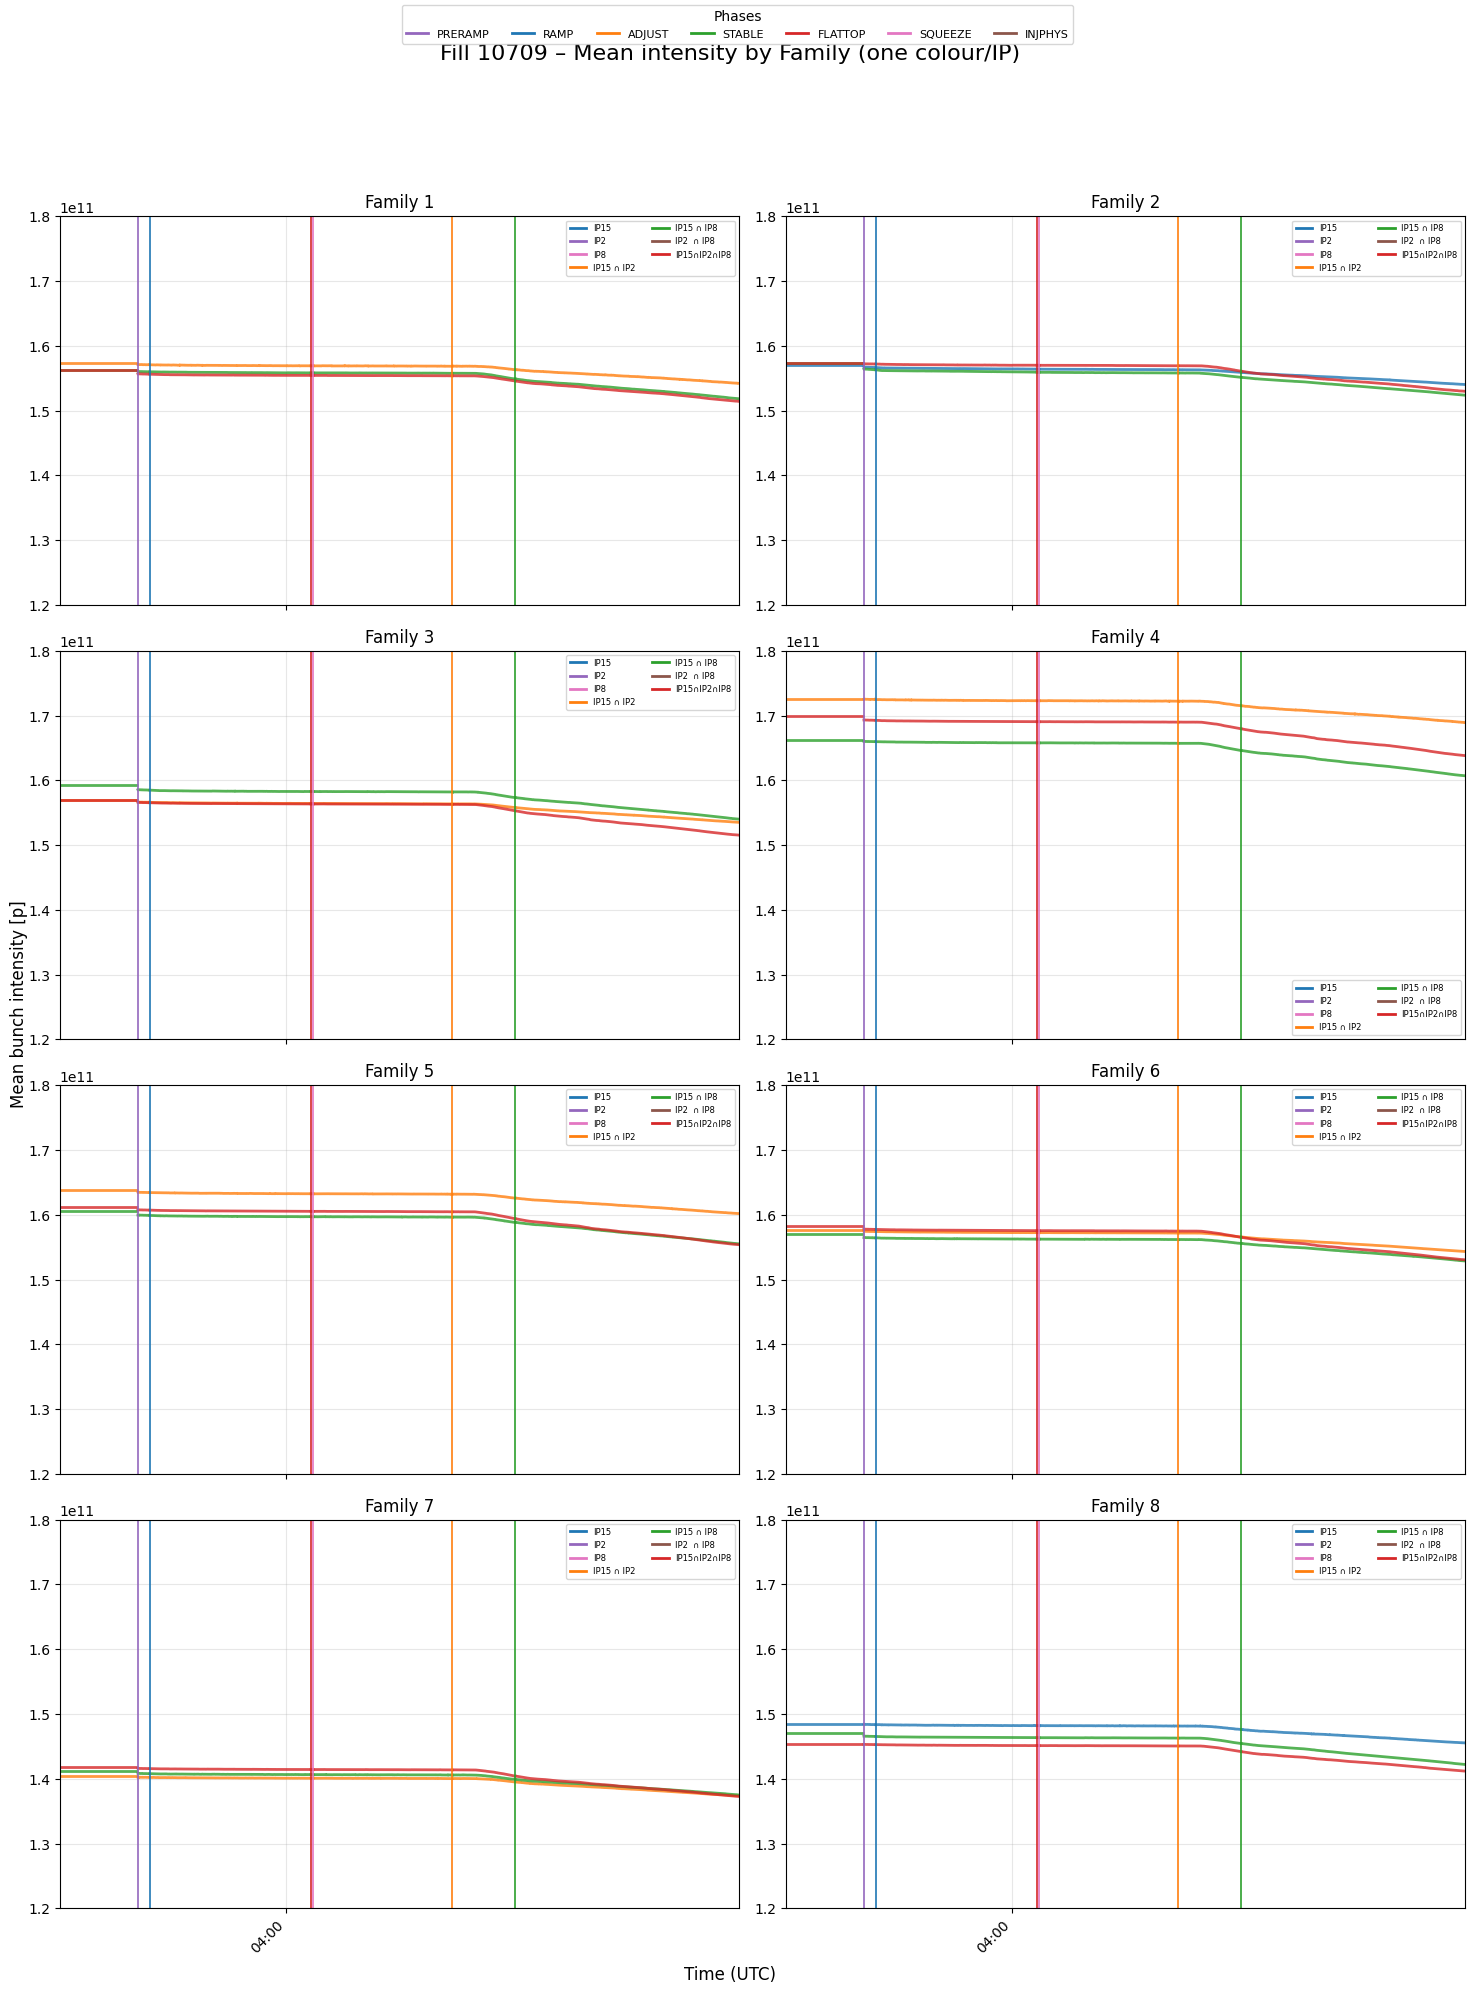

In [33]:
import math
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

# ───────────────────────────────────────────────────────────────
# PARAMETERS
# ───────────────────────────────────────────────────────────────
fno  = 10709
beam = "B2"
int_var = f"LHC.BCTFR.B6R4.{beam}:BUNCH_INTENSITY"

DATADIR  = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH  = DATADIR / "rawdata"
FILLINFO = DATADIR / "fills-info"

# ───────────────────────────────────────────────────────────────
# 0)  Read fill & BMODE info
# ───────────────────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")

families = {
    "Family 1": {
        "IP15"         : np.asarray(Family_1_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_1_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_1_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_1_in_15_2_b2,        int),
        "IP15 ∩ IP8"   : np.asarray(Family_1_in_15_8_b2,        int),
        "IP2  ∩ IP8"   : np.asarray(Family_1_in_2_8_b2,         int),
        "IP15∩IP2∩IP8" : np.asarray(Family_1_in_15_2_8_b2,      int),
    },
    "Family 2": {
        "IP15"         : np.asarray(Family_2_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_2_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_2_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_2_in_15_2_b2,        int),
        "IP15 ∩ IP8"   : np.asarray(Family_2_in_15_8_b2,        int),
        "IP2  ∩ IP8"   : np.asarray(Family_2_in_2_8_b2,         int),
        "IP15∩IP2∩IP8" : np.asarray(Family_2_in_15_2_8_b2,      int),
    },
    "Family 3": {
        "IP15"         : np.asarray(Family_3_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_3_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_3_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_3_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_3_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_3_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_3_in_15_2_8_b2,  int),
    },
    "Family 4": {
        "IP15"         : np.asarray(Family_4_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_4_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_4_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_4_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_4_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_4_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_4_in_15_2_8_b2,  int),
    },
    "Family 5": {
        "IP15"         : np.asarray(Family_5_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_5_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_5_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_5_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_5_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_5_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_5_in_15_2_8_b2,  int),
    },
    "Family 6": {
        "IP15"         : np.asarray(Family_6_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_6_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_6_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_6_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_6_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_6_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_6_in_15_2_8_b2,  int),
    },
    "Family 7": {
        "IP15"         : np.asarray(Family_7_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_7_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_7_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_7_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_7_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_7_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_7_in_15_2_8_b2,  int),
    },
    "Family 8": {
        "IP15"         : np.asarray(Family_8_in_only_15_b2,     int),
        "IP2"          : np.asarray(Family_8_in_only_2_b2,      int),
        "IP8"          : np.asarray(Family_8_in_only_8_b2,      int),
        "IP15 ∩ IP2"   : np.asarray(Family_8_in_15_2_b2,    int),
        "IP15 ∩ IP8"   : np.asarray(Family_8_in_15_8_b2,    int),
        "IP2  ∩ IP8"   : np.asarray(Family_8_in_2_8_b2,     int),
        "IP15∩IP2∩IP8" : np.asarray(Family_8_in_15_2_8_b2,  int),
    },
}
# ───────────────────────────────────────────────────────────────
# 2) Read the full‐fill intensity series
# ───────────────────────────────────────────────────────────────
ser_full = (
    pd.read_parquet(RAWPATH / f"HX:FILLN={fno}", columns=[int_var])[int_var]
).dropna().sort_index()
ser_full.index = pd.to_datetime(ser_full.index, utc=True, errors="coerce")

# ───────────────────────────────────────────────────────────────
# 3) Helper to load a single BMODE window (stack → mask zeros → NaN → threshold)
# ───────────────────────────────────────────────────────────────
def load_phase_data(phase):
    df   = fbmodes.loc[fno]
    rows = df.query("BMODE == @phase").sort_values("tsStart")
    if rows.empty:
        # fallback if segment missing
        rows = (
            df.sort_values("tsEnd").iloc[[-1]]
            if phase == "STABLE"
            else df.sort_values("tsStart").iloc[[0]]
        )
    t0 = pd.to_datetime(rows.tsStart.iloc[0], utc=True)
    t1 = pd.to_datetime(rows.tsEnd  .iloc[0], utc=True)

    ser = (
        pd.read_parquet(RAWPATH / f"HX:FILLN={fno}", columns=[int_var])[int_var]
          .dropna().sort_index()
    )
    ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce")
    ser = ser.loc[t0:t1]
    if ser.empty:
        raise RuntimeError(f"No non-NaN samples in {phase}")

    M_ph = np.stack(ser.values).astype(float)
    # mask zeros & below threshold
    M_ph[M_ph == 0]      = np.nan
    M_ph[M_ph < 0.5e10]  = np.nan
    return M_ph, ser.index, t0, t1

# ───────────────────────────────────────────────────────────────
# 4) Build all seven phase windows
# ───────────────────────────────────────────────────────────────
phase_names = ["PRERAMP","RAMP","ADJUST","STABLE","FLATTOP","SQUEEZE","INJPHYS"]
phase_data  = {ph: load_phase_data(ph) for ph in phase_names}

phase_styles = {ph: "-" for ph in phase_names}
phase_colors = {
    "PRERAMP":"tab:purple","RAMP":"tab:blue","ADJUST":"tab:orange",
    "STABLE":"tab:green","FLATTOP":"tab:red","SQUEEZE":"tab:pink",
    "INJPHYS":"tab:brown"
}

# ───────────────────────────────────────────────────────────────
# 5) Injection: extract second non-NaN sample per slot
# ───────────────────────────────────────────────────────────────
M_inj, ti_inj_full, t0_inj, t1_inj = phase_data["INJPHYS"]
inj2 = np.full(M_inj.shape[1], np.nan)
for j in range(M_inj.shape[1]):
    col = M_inj[:, j]
    valid = np.where(~np.isnan(col))[0]
    if len(valid) >= 2:
        inj2[j] = col[valid[1]]

# ───────────────────────────────────────────────────────────────
# 6) Mean‐curve helper (per‐phase only)
# ───────────────────────────────────────────────────────────────
def mean_curve_phase(M_ph, slots):
    return None if slots.size == 0 else np.nanmean(M_ph[:, slots], axis=1)

# ───────────────────────────────────────────────────────────────
# 7) Plotting: one subplot per Family, one colour per IP group
# ───────────────────────────────────────────────────────────────
# build a consistent colour map for your IP labels
ip_labels = sorted({ip for fam in families.values() for ip in fam})
palette10 = plt.cm.get_cmap("tab10").colors
ip_colors = {ip: palette10[i % 10] for i, ip in enumerate(ip_labels)}

# 4×2 grid for 8 families
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True)
axes = axes.flatten()

tidx      = ser_full.index
fill_date = tidx[0].normalize()
tmin      = fill_date + pd.Timedelta(hours=3, minutes=30)
tmax      = fill_date + pd.Timedelta(hours=5)

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for ip_label, slots in fam_groups.items():
        colour = ip_colors[ip_label]

        # plot each non‐injection phase
        for ph in phase_names:
            if ph != "INJPHYS":
                M_ph, ti_ph, _, _ = phase_data[ph]
                curve = mean_curve_phase(M_ph, slots)
                if curve is not None:
                    ax.plot(
                        ti_ph, curve,
                        color=colour,
                        linestyle=phase_styles[ph],
                        lw=2, alpha=0.8,
                        label=ip_label if ph == "PRERAMP" else None
                    )

        # injection: flat‐line at second‐sample mean
        fam_mean = np.nanmean(inj2[slots])
        ax.hlines(
            fam_mean, t0_inj, t1_inj,
            color=colour,
            linestyle=phase_styles["INJPHYS"],
            lw=2, alpha=0.8,
            label=ip_label if ph == "PRERAMP" else None
        )

    # vertical phase markers
    for ph in phase_names:
        _, _, t0_ph, _ = phase_data[ph]
        ax.axvline(
            t0_ph,
            color=phase_colors[ph],
            linestyle=phase_styles[ph],
            linewidth=1.2
        )

    ax.set_title(fam_name, fontsize=12)
    ax.set_xlim(tmin, tmax)
    ax.set_ylim(1.2e11, 1.8e11)
    ax.grid(alpha=0.3)

    # legend: one entry per IP label
    handles = [
        Line2D([], [], color=ip_colors[ip], lw=2, label=ip)
        for ip in fam_groups
    ]
    ax.legend(handles=handles, fontsize=6, ncol=2)

# x-axis formatting
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# overall phase legend
phase_handles = [
    Line2D([], [], color=phase_colors[p],
           linestyle=phase_styles[p], lw=2, label=p)
    for p in phase_names
]
fig.legend(
    handles=phase_handles,
    title="Phases",
    loc="upper center",
    ncol=len(phase_names),
    frameon=True,
    fontsize=8
)

fig.suptitle(f"Fill {fno} – Mean intensity by Family (one colour/IP)", fontsize=16)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean bunch intensity [p]")
fig.tight_layout(rect=[0,0,1,0.93])
plt.show()


/tmp/ipykernel_358915/293593195.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette10 = plt.cm.get_cmap("tab10").colors
/tmp/ipykernel_358915/1067698559.py:166: RuntimeWarning: Mean of empty slice
  return None if slots.size == 0 else np.nanmean(M_ph[:, slots], axis=1)


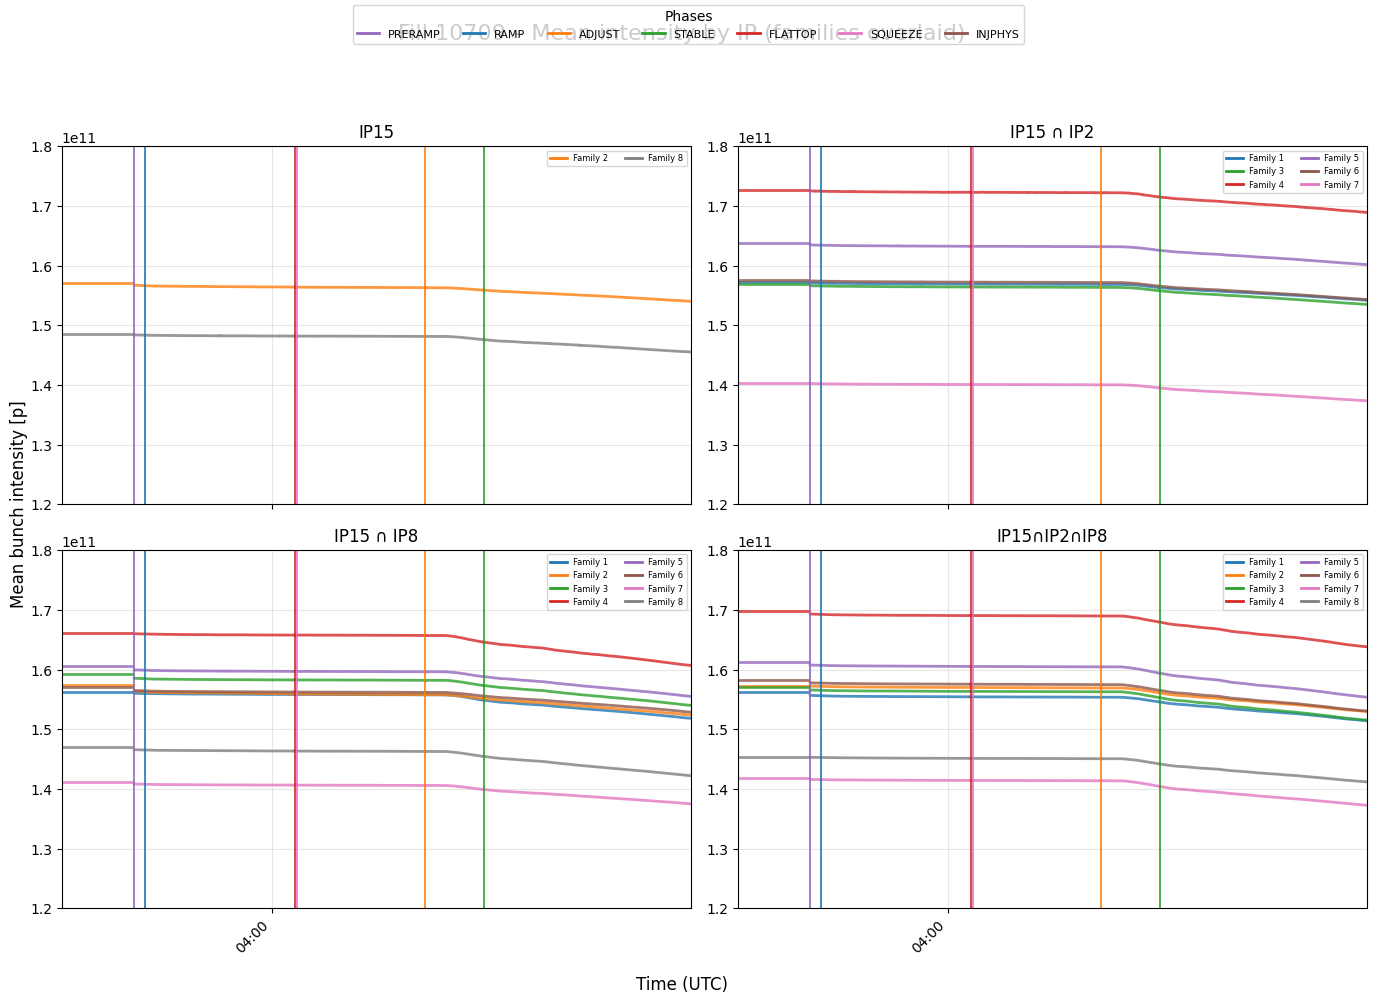

In [35]:
IP_panels = {
    "IP15"       : {fam:grp["IP15"]       for fam,grp in families.items()},
    "IP15 ∩ IP2" : {fam:grp["IP15 ∩ IP2"] for fam,grp in families.items()},
    "IP15 ∩ IP8" : {fam:grp["IP15 ∩ IP8"] for fam,grp in families.items()},
     "IP15∩IP2∩IP8" : {fam:grp["IP15∩IP2∩IP8"] for fam,grp in families.items()},
}
# drop any empty slot-lists
IP_panels = {
    ip:{f:s for f,s in fams.items() if s.size>0}
    for ip,fams in IP_panels.items()
}
IP_panels = {ip:fams for ip,fams in IP_panels.items() if fams}

# ───────────────────────────────────────────────────────────────
# 7) Plot: one subplot per IP, families overlaid
# ───────────────────────────────────────────────────────────────
ip_labels = list(IP_panels.keys())
palette10 = plt.cm.get_cmap("tab10").colors
fam_colors = {fam: palette10[i] for i,fam in enumerate(families)}

ncols = 2
nrows = math.ceil(len(ip_labels)/2)
fig, axes = plt.subplots(nrows, ncols, figsize=(14,5*nrows), sharex=True)
axes = axes.flatten()[:len(ip_labels)]

tidx      = ser_full.index
fill_date = tidx[0].normalize()
tmin      = fill_date + pd.Timedelta(hours=3, minutes=30)
tmax      = fill_date + pd.Timedelta(hours=5)

for ax, ip in zip(axes, ip_labels):
    fams = IP_panels[ip]
    for fam, slots in fams.items():
        c = fam_colors[fam]
        # plot non-INJPHYS phases
        for ph in phase_names:
            if ph!="INJPHYS":
                Mph, tiph, _, _ = phase_data[ph]
                curve = mean_curve_phase(Mph, slots)
                if curve is not None:
                    ax.plot(tiph, curve,
                            color=c,
                            linestyle=phase_styles[ph],
                            lw=2, alpha=0.8,
                            label=fam if ph=="PRERAMP" else None)
        # INJPHYS flat line
        mean2 = np.nanmean(inj2[slots])
        ax.hlines(mean2, t0_inj, t1_inj,
                  color=c,
                  linestyle=phase_styles["INJPHYS"],
                  lw=2, alpha=0.8)

    # vertical phase markers
    for ph in phase_names:
        _,_,t0p,_ = phase_data[ph]
        ax.axvline(t0p,
                   color=phase_colors[ph],
                   linestyle=phase_styles[ph],
                   linewidth=1.2)

    ax.set_title(ip, fontsize=12)
    ax.set_xlim(tmin, tmax)
    ax.set_ylim(1.2e11, 1.8e11)
    ax.grid(alpha=0.3)

    # family legend
    handles = [
        Line2D([],[],color=fam_colors[f], lw=2, label=f)
        for f in fams
    ]
    ax.legend(handles=handles, fontsize=6, ncol=2)

# shared x-axis formatting
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# overall phase legend
phase_handles = [
    Line2D([],[],color=phase_colors[p],
           linestyle=phase_styles[p], lw=2, label=p)
    for p in phase_names
]
fig.legend(handles=phase_handles,
           title="Phases",
           loc="upper center",
           ncol=len(phase_names),
           frameon=True, fontsize=8)

fig.suptitle(f"Fill {fno} – Mean intensity by IP (families overlaid)", fontsize=16)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean bunch intensity [p]")
fig.tight_layout(rect=[0,0,1,0.93])

plt.show()

### Mean Intensity classified by IP

/tmp/ipykernel_3449391/1035662064.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10").colors


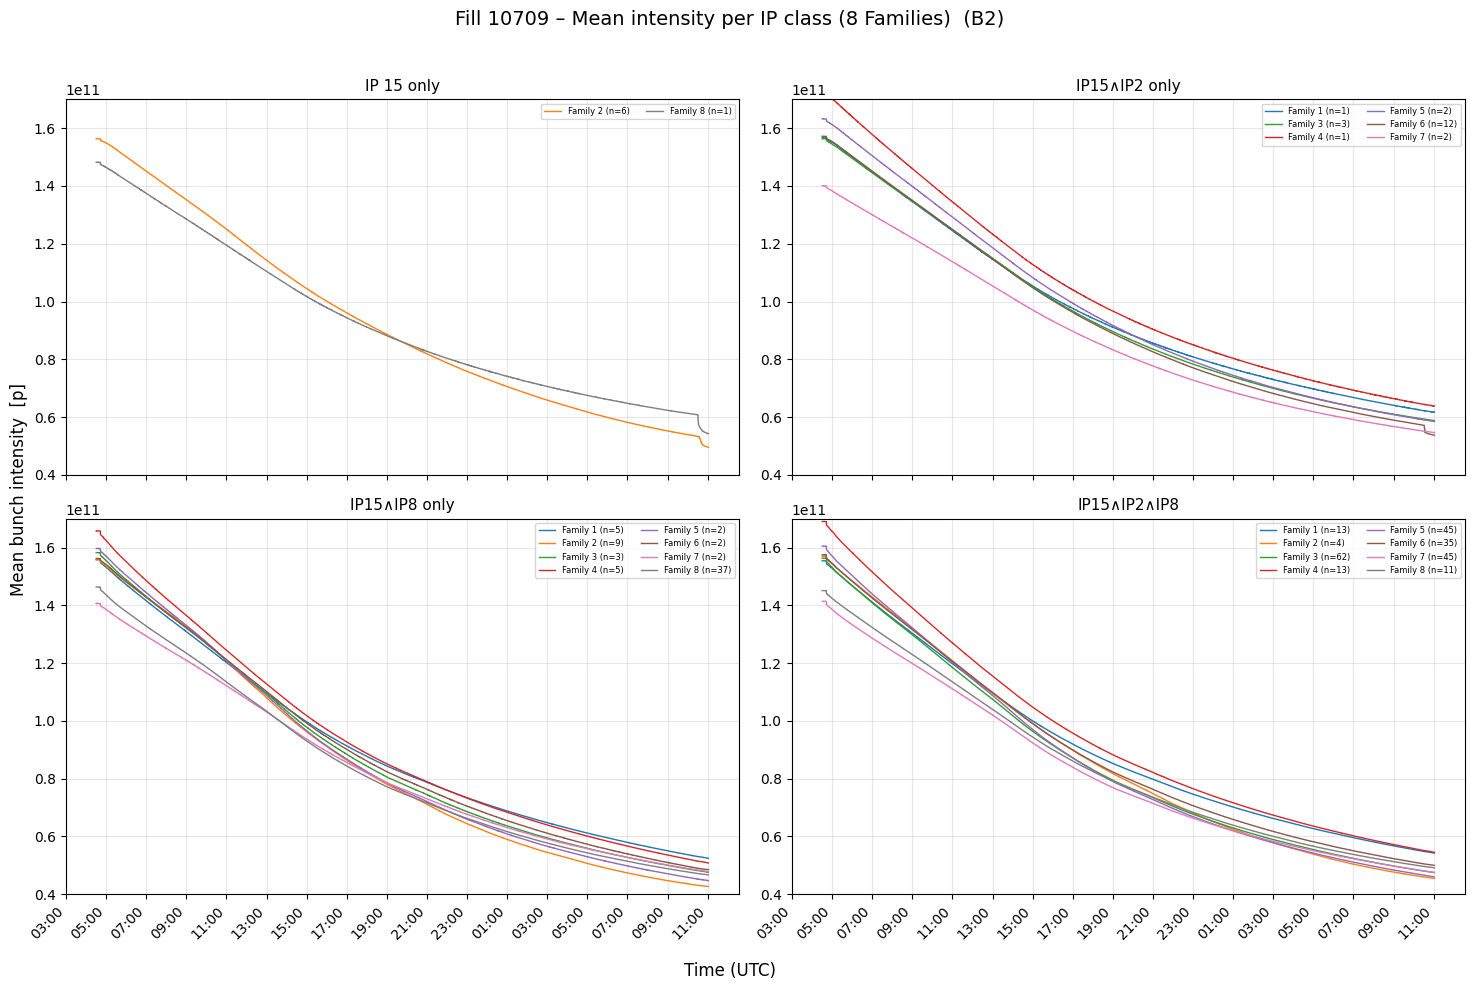

n          mean           std
IP class      Family                                  
IP 15 only    Family 2   6  9.320948e+10  3.144947e+10
              Family 8   1  9.312257e+10  2.640730e+10
IP15∧IP2 only Family 1   1  9.688769e+10  2.816546e+10
              Family 3   3  9.532900e+10  2.937524e+10
              Family 4   1  1.033463e+11  3.195946e+10
              Family 5   2  9.764858e+10  3.152149e+10
              Family 6  12  9.444877e+10  3.032987e+10
              Family 7   2  8.754346e+10  2.578601e+10
IP15∧IP2∧IP8  Family 1  13  9.117485e+10  2.943669e+10
              Family 2   4  8.725790e+10  3.348870e+10
              Family 3  62  8.654301e+10  3.215287e+10
              Family 4  13  9.527417e+10  3.301303e+10
              Family 5  45  8.677489e+10  3.378131e+10
              Family 6  35  8.904049e+10  3.177078e+10
              Family 7  45  8.253152e+10  2.792581e+10
              Family 8  11  8.473951e+10  2.855449e+10
IP15∧IP8 only Family 1   5  9.046356e+10  3.024105e+10
              Family 2   9  8.488191e+10  3.473417e+10
              Family 3   3  8.776770e+10  3.288507e+10
              Family 4   5  9.212370e+10  3.326566e+10
              Family 5   2  8.625496e+10  3.442122e+10
              Family 6   2  8.882786e+10  3.221661e+10
              Family 7   2  8.352697e+10  2.792849e+10
              Family 8  37  8.336670e+10  2.967084e+10

In [62]:
def mean_curve(slots):
    if slots.size == 0:
        return None
    return np.nanmean(M_int[:, slots], axis=1)

palette = plt.cm.get_cmap("tab10").colors
family_labels = [
    "Family 1", "Family 2", "Family 3", "Family 4", "Family 5",
    "Family 6", "Family 7", "Family 8"
]
IP_panels = {
    "IP 15 only"    : [Family_1_in_only_15_b2,  Family_2_in_only_15_b2,  Family_3_in_only_15_b2,
                       Family_4_in_only_15_b2,  Family_5_in_only_15_b2,  Family_6_in_only_15_b2,
                       Family_7_in_only_15_b2,  Family_8_in_only_15_b2],
    "IP 2 only"     : [Family_1_in_only_2_b2,   Family_2_in_only_2_b2,   Family_3_in_only_2_b2,
                       Family_4_in_only_2_b2,   Family_5_in_only_2_b2,   Family_6_in_only_2_b2,
                       Family_7_in_only_2_b2,   Family_8_in_only_2_b2],
    "IP 8 only"     : [Family_1_in_only_8_b2,   Family_2_in_only_8_b2,   Family_3_in_only_8_b2,
                       Family_4_in_only_8_b2,   Family_5_in_only_8_b2,   Family_6_in_only_8_b2,
                       Family_7_in_only_8_b2,   Family_8_in_only_8_b2],
    "IP15∧IP2 only" : [Family_1_in_15_2_b2, Family_2_in_15_2_b2, Family_3_in_15_2_b2,
                       Family_4_in_15_2_b2, Family_5_in_15_2_b2, Family_6_in_15_2_b2,
                       Family_7_in_15_2_b2, Family_8_in_15_2_b2],
    "IP15∧IP8 only" : [Family_1_in_15_8_b2, Family_2_in_15_8_b2, Family_3_in_15_8_b2,
                       Family_4_in_15_8_b2, Family_5_in_15_8_b2, Family_6_in_15_8_b2,
                       Family_7_in_15_8_b2, Family_8_in_15_8_b2],
    "IP2∧IP8 only"  : [Family_1_in_2_8_b2,  Family_2_in_2_8_b2,  Family_3_in_2_8_b2,
                       Family_4_in_2_8_b2,  Family_5_in_2_8_b2,  Family_6_in_2_8_b2,
                       Family_7_in_2_8_b2,  Family_8_in_2_8_b2],
    "IP15∧IP2∧IP8"  : [Family_1_in_15_2_8_b2, Family_2_in_15_2_8_b2, Family_3_in_15_2_8_b2,
                       Family_4_in_15_2_8_b2, Family_5_in_15_2_8_b2, Family_6_in_15_2_8_b2,
                       Family_7_in_15_2_8_b2, Family_8_in_15_2_8_b2]
}

# 2) Filter out any IP class where *all* families are empty
IP_panels = {
    ip_label: fam_arrays
    for ip_label, fam_arrays in IP_panels.items()
    if any(arr.size > 0 for arr in fam_arrays)
}

# 3) Prepare subplots grid based on how many panels survived
n_panels = len(IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

# 4) Plot and collect stats
table_rows = []
for ax, (ip_label, fam_arrays) in zip(axes, IP_panels.items()):
    for i, (fam_label, slots) in enumerate(zip(family_labels, fam_arrays)):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_int, curve,
                label=f"{fam_label} (n={len(slots)})",
                color=palette[i], lw=1)
        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_label,
            "n"       : len(slots),
            "mean"    : np.nanmean(curve),
            "std"     : np.nanstd(curve)
        })

    ax.set_title(ip_label, fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_ylim(0.4e11, 1.7e11)
    ax.legend(fontsize=6, ncol=2)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
# 5) Tidy up
fig.suptitle(f"Fill {fno} – Mean intensity per IP class (8 Families)  ({beam})", fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean bunch intensity  [p]")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# 6) Display stats table
stats_df = (pd.DataFrame(table_rows)
            .set_index(["IP class", "Family"])
            .sort_index())
display(stats_df)

### Zoom in


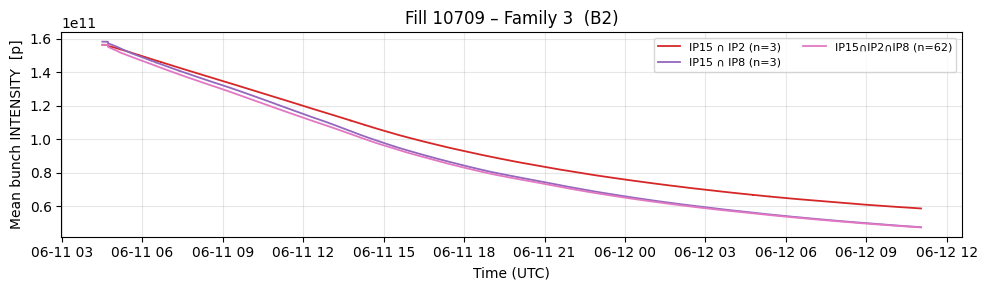

,,n,mean,std
IP class,Family,,,
IP15∧IP2 only,Family 3,3,9.532901e+10,2.945941e+10
IP15∧IP2∧IP8,Family 3,62,8.654299e+10,3.244233e+10
IP15∧IP8 only,Family 3,3,8.776770e+10,3.313393e+10


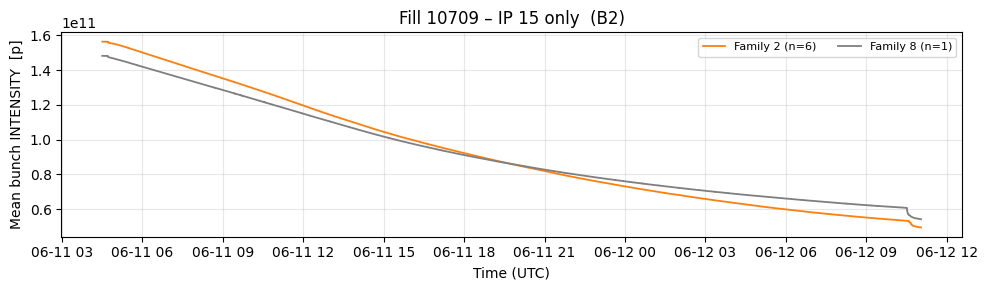

,n,mean,std
Family,,,
Family 2,6,9.320947e+10,3.160854e+10
Family 8,1,9.312257e+10,2.640730e+10


In [64]:

family_labels = [
    "Family 1", "Family 2", "Family 3", "Family 4", "Family 5",
    "Family 6", "Family 7", "Family 8"
]
IP_panels = {
    "IP 15 only"    : [Family_1_in_only_15_b2,  Family_2_in_only_15_b2,  Family_3_in_only_15_b2,
                       Family_4_in_only_15_b2,  Family_5_in_only_15_b2,  Family_6_in_only_15_b2,
                       Family_7_in_only_15_b2,  Family_8_in_only_15_b2],
    "IP 2 only"     : [Family_1_in_only_2_b2,   Family_2_in_only_2_b2,   Family_3_in_only_2_b2,
                       Family_4_in_only_2_b2,   Family_5_in_only_2_b2,   Family_6_in_only_2_b2,
                       Family_7_in_only_2_b2,   Family_8_in_only_2_b2],
    "IP 8 only"     : [Family_1_in_only_8_b2,   Family_2_in_only_8_b2,   Family_3_in_only_8_b2,
                       Family_4_in_only_8_b2,   Family_5_in_only_8_b2,   Family_6_in_only_8_b2,
                       Family_7_in_only_8_b2,   Family_8_in_only_8_b2],
    "IP15∧IP2 only" : [Family_1_in_15_2_b2, Family_2_in_15_2_b2, Family_3_in_15_2_b2,
                       Family_4_in_15_2_b2, Family_5_in_15_2_b2, Family_6_in_15_2_b2,
                       Family_7_in_15_2_b2, Family_8_in_15_2_b2],
    "IP15∧IP8 only" : [Family_1_in_15_8_b2, Family_2_in_15_8_b2, Family_3_in_15_8_b2,
                       Family_4_in_15_8_b2, Family_5_in_15_8_b2, Family_6_in_15_8_b2,
                       Family_7_in_15_8_b2, Family_8_in_15_8_b2],
    "IP2∧IP8 only"  : [Family_1_in_2_8_b2,  Family_2_in_2_8_b2,  Family_3_in_2_8_b2,
                       Family_4_in_2_8_b2,  Family_5_in_2_8_b2,  Family_6_in_2_8_b2,
                       Family_7_in_2_8_b2,  Family_8_in_2_8_b2],
    "IP15∧IP2∧IP8"  : [Family_1_in_15_2_8_b2, Family_2_in_15_2_8_b2, Family_3_in_15_2_8_b2,
                       Family_4_in_15_2_8_b2, Family_5_in_15_2_8_b2, Family_6_in_15_2_8_b2,
                       Family_7_in_15_2_8_b2, Family_8_in_15_2_8_b2]
}
IP_keys = [
    "IP 15 only",
    "IP 2 only",
    "IP 8 only",
    "IP15∧IP2 only",
    "IP15∧IP8 only",
    "IP2∧IP8 only",
    "IP15∧IP2∧IP8"
]

big_rows = []
for ip, fam_arrays in IP_panels.items():
    for fam_lbl, slots in zip(family_labels, fam_arrays):
        if slots.size == 0: continue
        big_rows.append({
            "IP class": ip,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean"    : np.nanmean(M_int[:, slots]),
            "std"     : np.nanstd(M_int[:, slots]),
        })
stats_df = (pd.DataFrame(big_rows)
            .set_index(["IP class", "Family"])
            .sort_index())

long_to_short = {k: v for k, v in zip(families.keys(), family_labels)}
short_to_long = {v: k for k, v in long_to_short.items()}

def plot_single(*, ip_class=None, family=None):
    """Zoom plot (INTENSITY) for Beam 2."""
    if (ip_class is None) == (family is None):
        raise ValueError("Specify exactly one of ip_class or family")

    if ip_class is not None:
        curves = zip(family_labels, IP_panels[ip_class])
        title  = ip_class
        table  = stats_df.loc[ip_class]
    else:
        fam_long  = short_to_long.get(family, family)
        if fam_long not in families:
            raise KeyError(f"Family '{family}' not found.")
        fam_short = long_to_short[fam_long]
        curves = families[fam_long].items()
        title  = fam_long
        table  = stats_df.xs(fam_short, level="Family", drop_level=False)

    plt.figure(figsize=(10, 3))
    for i, (lbl, slots) in enumerate(curves):
        slots = np.asarray(slots, int)
        if slots.size == 0: continue
        y = np.nanmean(M_int[:, slots], axis=1)
        plt.plot(time_index_int, y,
                 label=f"{lbl} (n={len(slots)})",
                 color=palette[i % len(palette)], lw=1.3)
    plt.xlabel("Time (UTC)")
    plt.ylabel("Mean bunch INTENSITY  [p]")
    plt.title(f"Fill {fno} – {title}  ({beam})")
    plt.grid(alpha=.3); plt.legend(ncol=2, fontsize=8)
    plt.tight_layout(); plt.show()
    display(table)

# Example usage:
plot_single(family="Family 3")
plot_single(ip_class="IP 15 only") 


## Emittance H

### Mean Emittance H classified by bunch position

/tmp/ipykernel_3449391/3203825191.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette    = plt.cm.get_cmap("tab10").colors


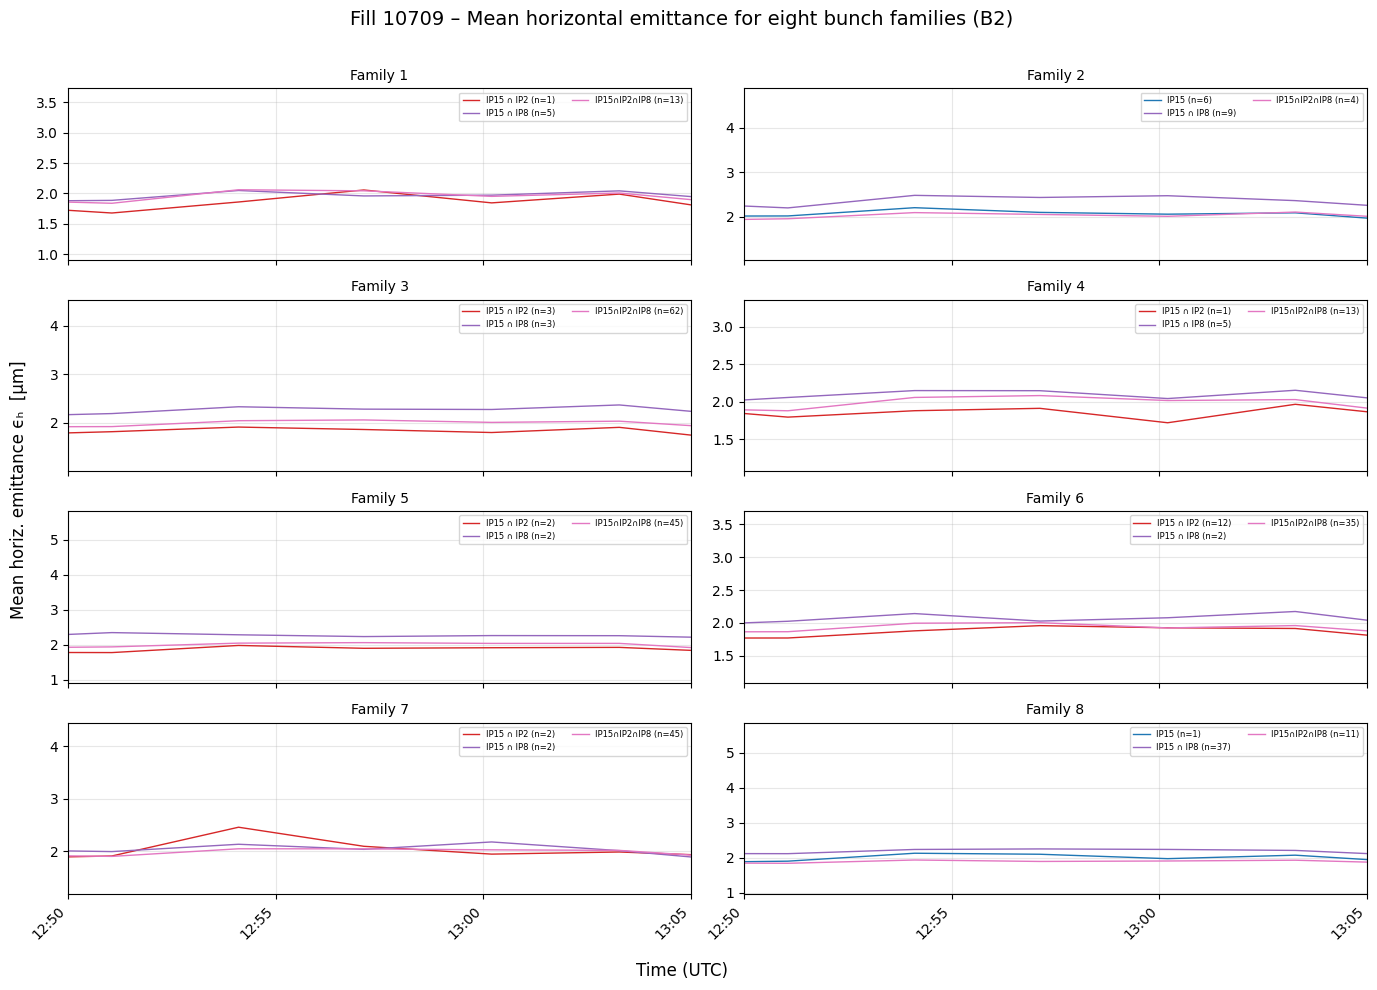

n      mean       std
Family   Group                               
Family 1 IP15 ∩ IP2     1  1.972159  0.354931
         IP15 ∩ IP8     5  2.196970  0.463132
         IP15∩IP2∩IP8  13  2.146884  0.433155
Family 2 IP15           6  2.352000  0.510496
         IP15 ∩ IP8     9  2.748948  0.666983
         IP15∩IP2∩IP8   4  2.579496  0.774229
Family 3 IP15 ∩ IP2     3  2.069838  0.418359
         IP15 ∩ IP8     3  2.516409  0.545443
         IP15∩IP2∩IP8  62  2.301033  0.525262
Family 4 IP15 ∩ IP2     1  1.904938  0.291645
         IP15 ∩ IP8     5  2.149231  0.374960
         IP15∩IP2∩IP8  13  2.053261  0.324206
Family 5 IP15 ∩ IP2     2  2.178379  0.481555
         IP15 ∩ IP8     2  2.585975  0.612643
         IP15∩IP2∩IP8  45  2.371885  0.582592
Family 6 IP15 ∩ IP2    12  2.164397  0.484525
         IP15 ∩ IP8     2  2.348392  0.542526
         IP15∩IP2∩IP8  35  2.268305  0.543276
Family 7 IP15 ∩ IP2     2  2.266918  0.467759
         IP15 ∩ IP8     2  2.420810  0.541634
         IP15∩IP2∩IP8  45  2.322969  0.518620
Family 8 IP15           1  2.183822  0.563189
         IP15 ∩ IP8    37  2.496661  0.579006
         IP15∩IP2∩IP8  11  2.326808  0.628072

In [84]:
emit_H_var = f"LHC.BSRT.5L4.{beam}:BUNCH_EMITTANCE_H"   # horizontal εH
# ── STABLE‐beam window ─────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno]
                    .query("BMODE=='STABLE'")
                    .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

# ── load εH parquet and slice to STABLE interval ───────────
ser = (pd.read_parquet(RAWPATH / f"HX:FILLN={fno}",
                       columns=[emit_H_var])[emit_H_var])
ser.index = pd.to_datetime(ser.index, utc=True,
                           errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No horizontal-emittance samples in STABLE window.")

M_emit_H          = np.stack(ser.values)       # shape  nTimes × 3564
time_index_emit_H = ser.index                  # x-axis (≈ hundreds of points)
palette    = plt.cm.get_cmap("tab10").colors

def to_arr(x): return np.asarray(x, int)
a = to_arr

def mean_curve(slots):
    """Time-series mean over the given bunch IDs."""
    slots = np.asarray(slots, int)
    return None if slots.size == 0 else np.nanmean(M_emit_H[:, slots], axis=1)

plot_date = time_index_emit_H[0].date().isoformat()
#xmin = pd.to_datetime(f"{plot_date} 05:00:00+00:00")
#xmax = pd.to_datetime(f"{plot_date} 15:30:00+00:00")
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
all_stats = []

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (grp_lbl, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_emit_H, curve,
                label=f"{grp_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)
        all_stats.append({
            "Family": fam_name,
            "Group" : grp_lbl,
            "n"     : len(slots),
            "mean"  : np.nanmean(curve),
            "std"   : np.nanstd(curve),
        })
    ax.set_title(fam_name, fontsize=10)
    ax.grid(alpha=.3)
    ax.set_xlim(xmin,xmax)
    ax.legend(fontsize=6, ncol=2)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f"Fill {fno} – Mean horizontal emittance for eight bunch families ({beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean horiz. emittance ϵₕ  [µm]")
fig.tight_layout(rect=[0,0,1,0.97])
plt.show()

stats_df = (pd.DataFrame(all_stats)
            .set_index(["Family", "Group"])
            .sort_index())
display(stats_df)


Normalizing to closest sample at: 2025-06-11 04:41:48.577509+00:00


/tmp/ipykernel_3449391/2136543993.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10").colors


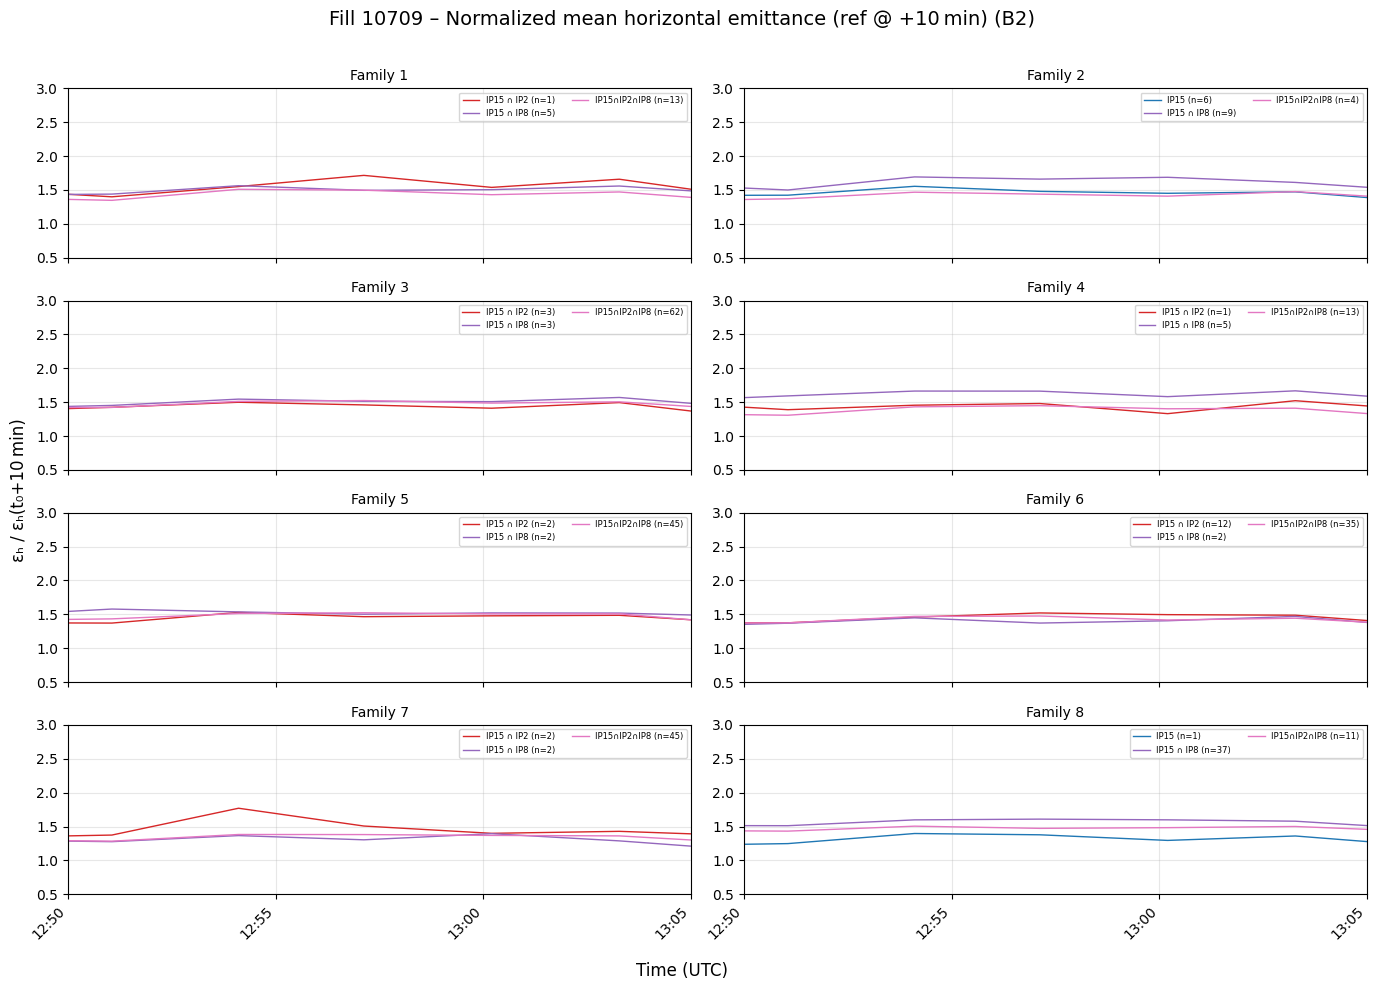

n  mean_norm  std_norm
Family   Group                                
Family 1 IP15 ∩ IP2     1   1.644702  0.295998
         IP15 ∩ IP8     5   1.676442  0.353402
         IP15∩IP2∩IP8  13   1.573230  0.317415
Family 2 IP15           6   1.662419  0.360824
         IP15 ∩ IP8     9   1.878829  0.455865
         IP15∩IP2∩IP8   4   1.812397  0.543986
Family 3 IP15 ∩ IP2     3   1.618663  0.327167
         IP15 ∩ IP8     3   1.665304  0.360962
         IP15∩IP2∩IP8  62   1.699420  0.387930
Family 4 IP15 ∩ IP2     1   1.474743  0.225782
         IP15 ∩ IP8     5   1.664265  0.290352
         IP15∩IP2∩IP8  13   1.428262  0.225520
Family 5 IP15 ∩ IP2     2   1.678764  0.371109
         IP15 ∩ IP8     2   1.736232  0.411330
         IP15∩IP2∩IP8  45   1.750622  0.429995
Family 6 IP15 ∩ IP2    12   1.679381  0.375949
         IP15 ∩ IP8     2   1.586632  0.366544
         IP15∩IP2∩IP8  35   1.669075  0.399756
Family 7 IP15 ∩ IP2     2   1.634227  0.337208
         IP15 ∩ IP8     2   1.552927  0.347453
         IP15∩IP2∩IP8  45   1.571430  0.350833
Family 8 IP15           1   1.434356  0.369908
         IP15 ∩ IP8    37   1.785435  0.414064
         IP15∩IP2∩IP8  11   1.811590  0.489000

In [85]:

# ── 3. Compute reference index at first 10 minutes ───────────────────────
ref_time = time_index_emit_H[0] + pd.Timedelta(minutes=10)
ref_idx  = (np.abs(time_index_emit_H - ref_time)).argmin()
print("Normalizing to closest sample at:", time_index_emit_H[ref_idx])

# ── 4. Helper & color palette ─────────────────────────────────────────────
def mean_curve(slots):
    slots = np.asarray(slots, int)
    return None if slots.size == 0 else np.nanmean(M_emit_H[:, slots], axis=1)

palette = plt.cm.get_cmap("tab10").colors
plot_date = time_index_emit_H[0].date().isoformat()
#xmin = pd.to_datetime(f"{plot_date} 05:00:00+00:00")
#xmax = pd.to_datetime(f"{plot_date} 15:30:00+00:00")
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")
# ── 5. Plot normalized curves for eight families ──────────────────────────
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
all_stats = []

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (grp_lbl, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue

        # normalize by the first-10-min value
        ref_val = curve[ref_idx]
        if not np.isfinite(ref_val) or ref_val == 0:
            continue
        norm_curve = curve / ref_val

        ax.plot(time_index_emit_H, norm_curve,
                label=f"{grp_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)

        all_stats.append({
            "Family":    fam_name,
            "Group":     grp_lbl,
            "n":         len(slots),
            "mean_norm": np.nanmean(norm_curve),
            "std_norm":  np.nanstd(norm_curve),
        })

    ax.set_title(fam_name, fontsize=10)
    ax.set_ylim(0.5, 3.0)  
    ax.set_xlim(xmin,xmax)# adjust to normalized scale
    ax.grid(alpha=0.3)
    ax.legend(fontsize=6, ncol=2)

# ── 6. Format x-axis ──────────────────────────────────────────────────────
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle(
    f"Fill {fno} – Normalized mean horizontal emittance (ref @ +10 min) ({beam})",
    fontsize=14
)
fig.supxlabel("Time (UTC)")
fig.supylabel("εₕ / εₕ(t₀+10 min)")
fig.tight_layout(rect=[0,0,1,0.97])
plt.show()

# ── 7. Display stats table ───────────────────────────────────────────────
stats_df = (
    pd.DataFrame(all_stats)
      .set_index(["Family", "Group"])
      .sort_index()
)
display(stats_df)


### Mean Emittance H classified by IP position

/tmp/ipykernel_3449391/1880012834.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10").colors


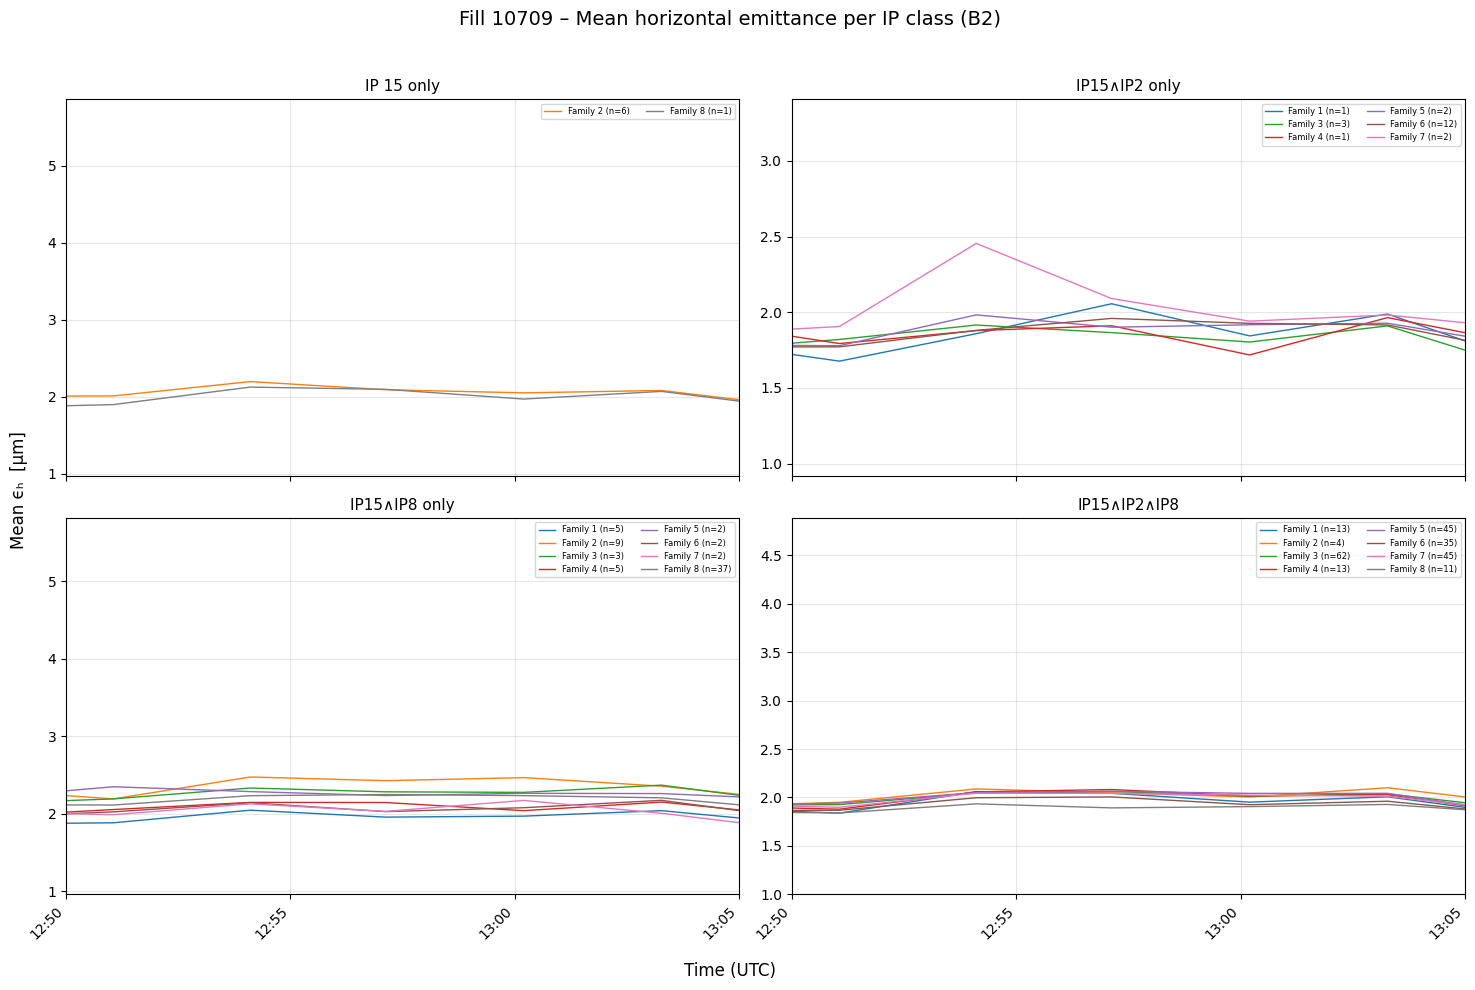

n      mean       std
IP class      Family                          
IP 15 only    Family 2   6  2.352000  0.510496
              Family 8   1  2.183822  0.563189
IP15∧IP2 only Family 1   1  1.972159  0.354931
              Family 3   3  2.069838  0.418359
              Family 4   1  1.904938  0.291645
              Family 5   2  2.178379  0.481555
              Family 6  12  2.164397  0.484525
              Family 7   2  2.266918  0.467759
IP15∧IP2∧IP8  Family 1  13  2.146884  0.433155
              Family 2   4  2.579496  0.774229
              Family 3  62  2.301033  0.525262
              Family 4  13  2.053261  0.324206
              Family 5  45  2.371885  0.582592
              Family 6  35  2.268305  0.543276
              Family 7  45  2.322969  0.518620
              Family 8  11  2.326808  0.628072
IP15∧IP8 only Family 1   5  2.196970  0.463132
              Family 2   9  2.748948  0.666983
              Family 3   3  2.516409  0.545443
              Family 4   5  2.149231  0.374960
              Family 5   2  2.585975  0.612643
              Family 6   2  2.348392  0.542526
              Family 7   2  2.420810  0.541634
              Family 8  37  2.496661  0.579006

In [86]:
def mean_curve(slots):
    slots = np.asarray(slots, int)
    if slots.size == 0:
        return None
    return np.nanmean(M_emit_H[:, slots], axis=1)

palette = plt.cm.get_cmap("tab10").colors
family_labels = [
    "Family 1", "Family 2", "Family 3", "Family 4",
    "Family 5", "Family 6", "Family 7", "Family 8"
]

# 2) hand-built IP_panels for horizontal emittance, keyed by same labels
IP_panels = {
    "IP 15 only"    : [
        Family_1_in_only_15_b2, Family_2_in_only_15_b2, Family_3_in_only_15_b2,
        Family_4_in_only_15_b2, Family_5_in_only_15_b2, Family_6_in_only_15_b2,
        Family_7_in_only_15_b2, Family_8_in_only_15_b2
    ],
    "IP 2 only"     : [
        Family_1_in_only_2_b2,  Family_2_in_only_2_b2,  Family_3_in_only_2_b2,
        Family_4_in_only_2_b2,  Family_5_in_only_2_b2,  Family_6_in_only_2_b2,
        Family_7_in_only_2_b2,  Family_8_in_only_2_b2
    ],
    "IP 8 only"     : [
        Family_1_in_only_8_b2,  Family_2_in_only_8_b2,  Family_3_in_only_8_b2,
        Family_4_in_only_8_b2,  Family_5_in_only_8_b2,  Family_6_in_only_8_b2,
        Family_7_in_only_8_b2,  Family_8_in_only_8_b2
    ],
    "IP15∧IP2 only" : [
        Family_1_in_15_2_b2, Family_2_in_15_2_b2, Family_3_in_15_2_b2,
        Family_4_in_15_2_b2, Family_5_in_15_2_b2, Family_6_in_15_2_b2,
        Family_7_in_15_2_b2, Family_8_in_15_2_b2
    ],
    "IP15∧IP8 only" : [
        Family_1_in_15_8_b2, Family_2_in_15_8_b2, Family_3_in_15_8_b2,
        Family_4_in_15_8_b2, Family_5_in_15_8_b2, Family_6_in_15_8_b2,
        Family_7_in_15_8_b2, Family_8_in_15_8_b2
    ],
    "IP2∧IP8 only"  : [
        Family_1_in_2_8_b2,  Family_2_in_2_8_b2,  Family_3_in_2_8_b2,
        Family_4_in_2_8_b2,  Family_5_in_2_8_b2,  Family_6_in_2_8_b2,
        Family_7_in_2_8_b2,  Family_8_in_2_8_b2
    ],
    "IP15∧IP2∧IP8"  : [
        Family_1_in_15_2_8_b2, Family_2_in_15_2_8_b2, Family_3_in_15_2_8_b2,
        Family_4_in_15_2_8_b2, Family_5_in_15_2_8_b2, Family_6_in_15_2_8_b2,
        Family_7_in_15_2_8_b2, Family_8_in_15_2_8_b2
    ],
}

# 3) drop any IP class where all families are empty
clean_IP_panels = {
    ip: arrs
    for ip, arrs in IP_panels.items()
    if any(np.asarray(a, int).size > 0 for a in arrs)
}
plot_date = time_index_emit_H[0].date().isoformat()
#xmin = pd.to_datetime(f"{plot_date} 05:00:00+00:00")
#xmax = pd.to_datetime(f"{plot_date} 15:30:00+00:00")
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")
# 4) set up dynamic grid
n_panels = len(clean_IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

# 5) plot and gather stats
table_rows = []
for ax, (ip_label, fam_arrays) in zip(axes, clean_IP_panels.items()):
    for i, (fam_label, slots) in enumerate(zip(family_labels, fam_arrays)):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_emit_H, curve,
                label=f"{fam_label} (n={len(slots)})",
                color=palette[i], lw=1)
        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_label,
            "n"       : len(slots),
            "mean"    : np.nanmean(curve),
            "std"     : np.nanstd(curve),
        })

    ax.set_title(ip_label, fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_xlim(xmin,xmax)
    #ax.set_ylim(0.4e11, 1.7e11)
    ax.legend(fontsize=6, ncol=2)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
# 6) finalize layout
fig.suptitle(f"Fill {fno} – Mean horizontal emittance per IP class ({beam})", fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean ϵₕ  [µm]")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# 7) display stats
stats_df = (
    pd.DataFrame(table_rows)
      .set_index(["IP class", "Family"])
      .sort_index()
)
display(stats_df)


Normalizing to sample at: 2025-06-11 04:41:48.577509+00:00


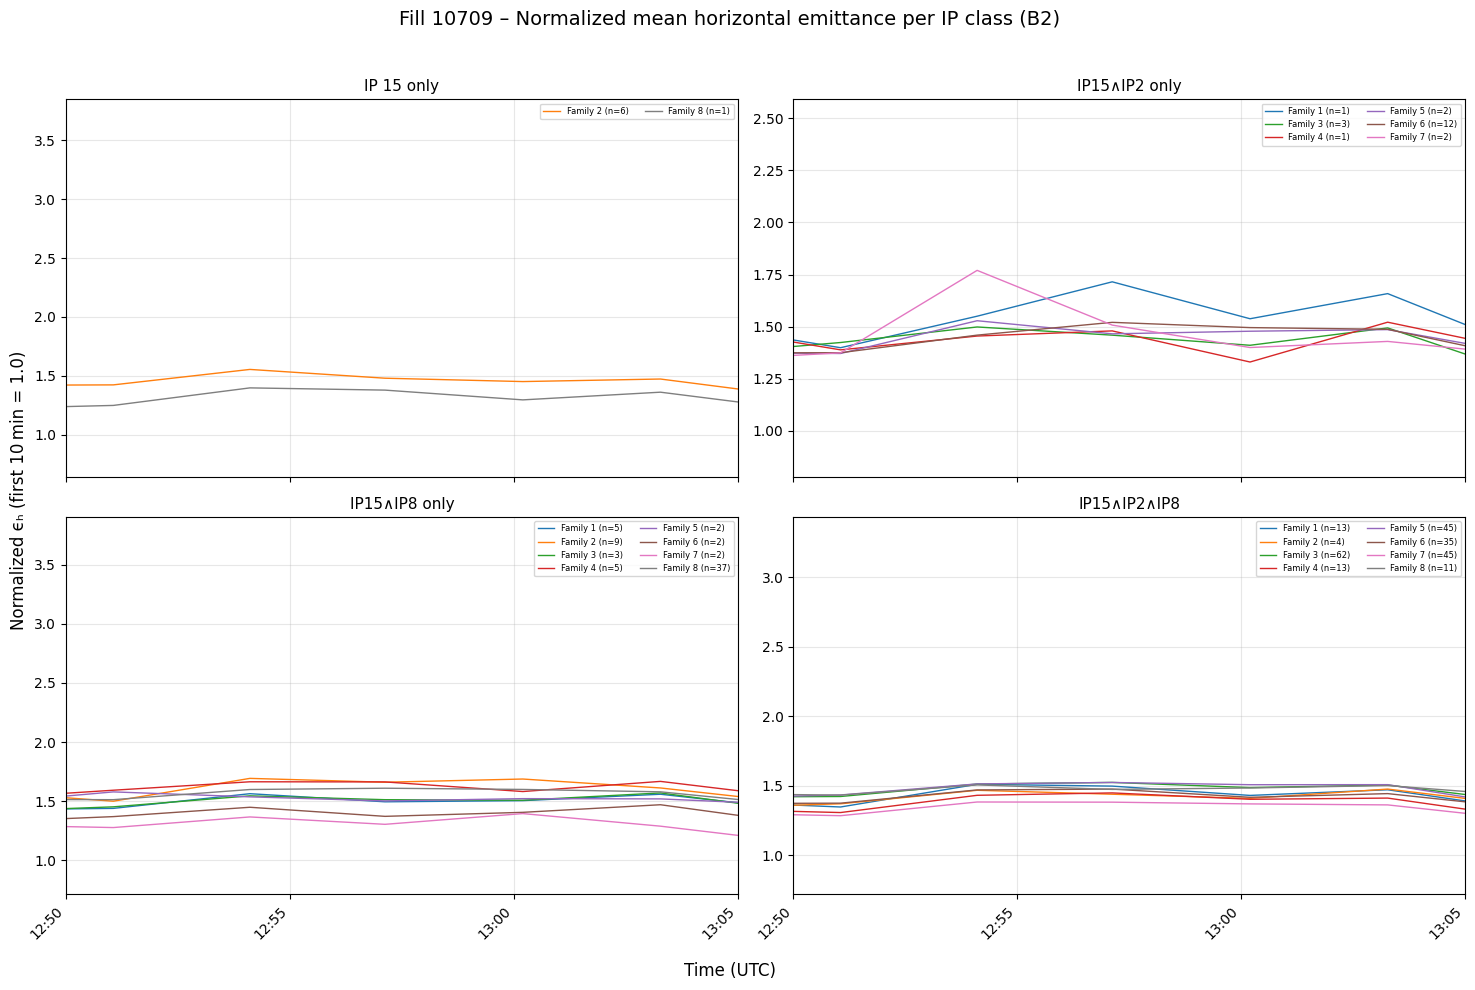

n      mean       std
IP class      Family                          
IP 15 only    Family 2   6  1.662419  0.360824
              Family 8   1  1.434356  0.369908
IP15∧IP2 only Family 1   1  1.644702  0.295998
              Family 3   3  1.618663  0.327167
              Family 4   1  1.474743  0.225782
              Family 5   2  1.678764  0.371109
              Family 6  12  1.679381  0.375949
              Family 7   2  1.634227  0.337208
IP15∧IP2∧IP8  Family 1  13  1.573230  0.317415
              Family 2   4  1.812397  0.543986
              Family 3  62  1.699420  0.387930
              Family 4  13  1.428262  0.225520
              Family 5  45  1.750622  0.429995
              Family 6  35  1.669075  0.399756
              Family 7  45  1.571430  0.350833
              Family 8  11  1.811590  0.489000
IP15∧IP8 only Family 1   5  1.676442  0.353402
              Family 2   9  1.878829  0.455865
              Family 3   3  1.665304  0.360962
              Family 4   5  1.664265  0.290352
              Family 5   2  1.736232  0.411330
              Family 6   2  1.586632  0.366544
              Family 7   2  1.552927  0.347453
              Family 8  37  1.785435  0.414064

In [87]:
ref_time = time_index_emit_H[0] + pd.Timedelta(minutes=10)
ref_idx  = (np.abs(time_index_emit_H - ref_time)).argmin()
print("Normalizing to sample at:", time_index_emit_H[ref_idx])

# ── 6. Prepare dynamic grid ───────────────────────────────────────────────
n_panels = len(clean_IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

# ── 7. Plot normalized curves and collect stats ───────────────────────────
table_rows = []
for ax, (ip_label, fam_arrays) in zip(axes, clean_IP_panels.items()):
    for i, (fam_label, slots) in enumerate(zip(family_labels, fam_arrays)):
        slots = np.asarray(slots, int)
        if slots.size == 0:
            continue

        curve = mean_curve(slots)
        if curve is None:
            continue

        # normalize the family‐mean by its first‐10‐min value
        ref_val = curve[ref_idx]
        if not np.isfinite(ref_val) or ref_val == 0:
            continue
        norm_curve = curve / ref_val

        ax.plot(time_index_emit_H, norm_curve,
                label=f"{fam_label} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)

        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_label,
            "n"       : len(slots),
            "mean"    : np.nanmean(norm_curve),
            "std"     : np.nanstd(norm_curve),
        })

    ax.set_title(ip_label, fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_xlim(xmin,xmax)
    ax.legend(fontsize=6, ncol=2)

# ── 8. Shared x-axis formatting ────────────────────────────────────────────
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# ── 9. Final layout ───────────────────────────────────────────────────────
fig.suptitle(f"Fill {fno} – Normalized mean horizontal emittance per IP class ({beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Normalized ϵₕ (first 10 min = 1.0)")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# ── 10. Display stats table ────────────────────────────────────────────────
stats_df = (pd.DataFrame(table_rows)
            .set_index(["IP class", "Family"])
            .sort_index())
display(stats_df)










### Zoom in

In [69]:
big_rows_emitH = []
for ip, fam_arrays in IP_panels.items():
    for fam_lbl, slots in zip(family_labels, fam_arrays):
        if slots.size == 0:
            continue
        y = np.nanmean(M_emit_H[:, slots], axis=1)
        big_rows_emitH.append({
            "IP class": ip,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean"    : np.nanmean(y),
            "std"     : np.nanstd(y),
        })

stats_emitH_df = (
    pd.DataFrame(big_rows_emitH)
      .set_index(["IP class", "Family"])
      .sort_index()
)

# ── 2) plot_single for horizontal emittance ───────────────────────────────
def plot_single_emitH(*, ip_class=None, family=None):
    """
    Zoom plot of mean horizontal emittance (εₕ) for Beam 2.
    Specify exactly one of ip_class or family.
    """
    if (ip_class is None) == (family is None):
        raise ValueError("Specify exactly one of ip_class or family")

    plt.figure(figsize=(10,3))

    if ip_class is not None:
        curves = zip(family_labels, IP_panels[ip_class])
        title  = ip_class
        table  = stats_emitH_df.loc[ip_class]
    else:
        fam_long = family if family.startswith("Family") else f"Family {family}"
        if fam_long not in families:
            raise KeyError(f"Family '{family}' not found.")
        curves = families[fam_long].items()
        title  = fam_long
        # note: level name is "Family"
        table  = stats_emitH_df.xs(fam_long, level="Family", drop_level=False)

    for i, (lbl, slots) in enumerate(curves):
        s = np.asarray(slots, int)
        if s.size == 0:
            continue
        y = np.nanmean(M_emit_H[:, s], axis=1)
        plt.plot(time_index_emit_H, y,
                 label=f"{lbl} (n={len(s)})",
                 color=palette[i % len(palette)],
                 lw=1.3)

    plt.title(f"Fill {fno} – Mean horizontal emittance εₕ  ({beam})  ·  {title}")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Mean εₕ  [µm]")
    plt.grid(alpha=0.3)
    plt.legend(fontsize=8, ncol=2)
    plt.tight_layout()
    plt.show()

    display(table)

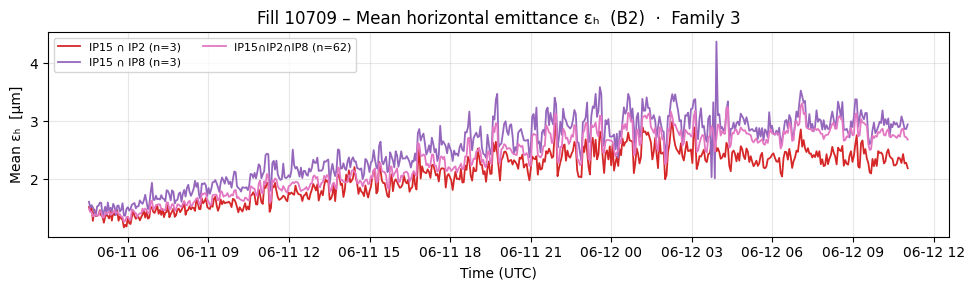

,,n,mean,std
IP class,Family,,,
IP15∧IP2 only,Family 3,3,2.069838,0.418359
IP15∧IP2∧IP8,Family 3,62,2.301033,0.525262
IP15∧IP8 only,Family 3,3,2.516409,0.545443


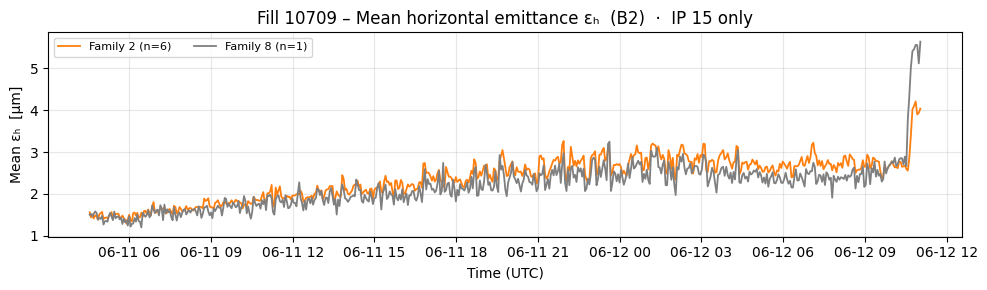

,n,mean,std
Family,,,
Family 2,6,2.352000,0.510496
Family 8,1,2.183822,0.563189


In [70]:
plot_single_emitH(family="Family 3")
plot_single_emitH(ip_class="IP 15 only")


## Emittance V

### Mean Emittance V classified by bunch position

/tmp/ipykernel_3449391/3150065358.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette    = plt.cm.get_cmap("tab10").colors


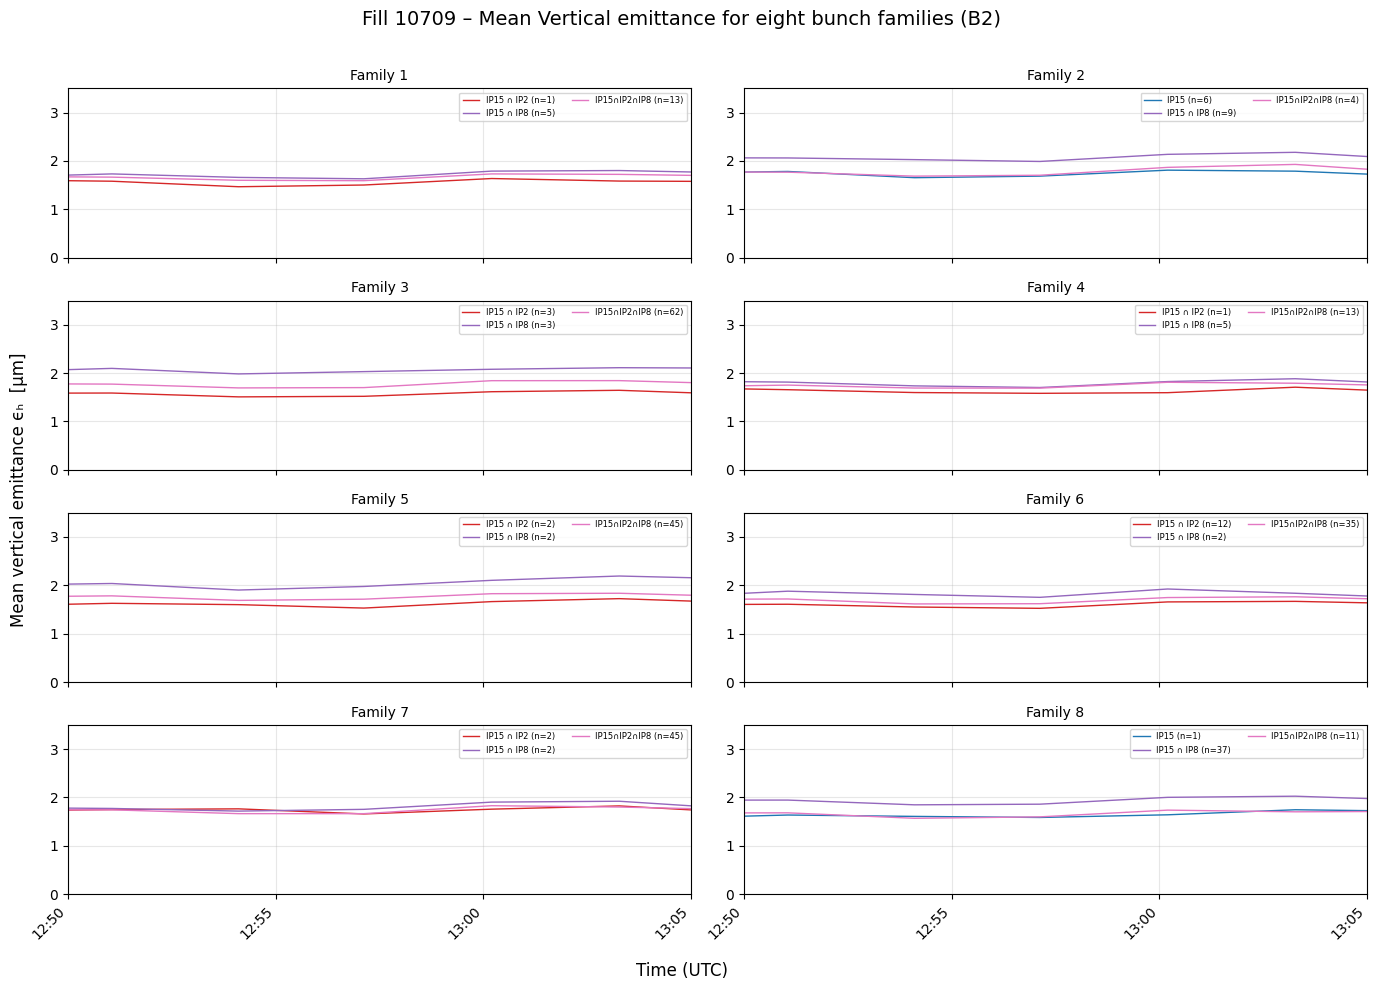

n      mean       std
Family   Group                               
Family 1 IP15 ∩ IP2     1  1.775882  0.273229
         IP15 ∩ IP8     5  1.971726  0.358737
         IP15∩IP2∩IP8  13  1.935540  0.328639
Family 2 IP15           6  2.136945  0.533378
         IP15 ∩ IP8     9  2.367559  0.612376
         IP15∩IP2∩IP8   4  2.306126  0.647491
Family 3 IP15 ∩ IP2     3  1.889943  0.346477
         IP15 ∩ IP8     3  2.324702  0.456686
         IP15∩IP2∩IP8  62  2.097985  0.431434
Family 4 IP15 ∩ IP2     1  1.729646  0.207624
         IP15 ∩ IP8     5  1.956649  0.280211
         IP15∩IP2∩IP8  13  1.874585  0.242912
Family 5 IP15 ∩ IP2     2  2.001966  0.418214
         IP15 ∩ IP8     2  2.387263  0.550392
         IP15∩IP2∩IP8  45  2.154512  0.486375
Family 6 IP15 ∩ IP2    12  1.992092  0.445955
         IP15 ∩ IP8     2  2.184114  0.469542
         IP15∩IP2∩IP8  35  2.087932  0.464011
Family 7 IP15 ∩ IP2     2  2.077704  0.386153
         IP15 ∩ IP8     2  2.200731  0.432548
         IP15∩IP2∩IP8  45  2.094020  0.418134
Family 8 IP15           1  1.998370  0.816511
         IP15 ∩ IP8    37  2.250568  0.463684
         IP15∩IP2∩IP8  11  2.115072  0.528641

In [88]:
emit_V_var = f"LHC.BSRT.5L4.{beam}:BUNCH_EMITTANCE_V"   # horizontal εH
# ── STABLE‐beam window ─────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno]
                    .query("BMODE=='STABLE'")
                    .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

# ── load εH parquet and slice to STABLE interval ───────────
ser = (pd.read_parquet(RAWPATH / f"HX:FILLN={fno}",
                       columns=[emit_V_var])[emit_V_var])
ser.index = pd.to_datetime(ser.index, utc=True,
                           errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No vertical-emittance samples in STABLE window.")

M_emit_V          = np.stack(ser.values)       # shape  nTimes × 3564
time_index_emit_V = ser.index                  # x-axis (≈ hundreds of points)
palette    = plt.cm.get_cmap("tab10").colors

def to_arr(x): return np.asarray(x, int)
a = to_arr

def mean_curve(slots):
    """Time-series mean over the given bunch IDs."""
    slots = np.asarray(slots, int)
    return None if slots.size == 0 else np.nanmean(M_emit_V[:, slots], axis=1)


fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
all_stats = []

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (grp_lbl, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_emit_V, curve,
                label=f"{grp_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)
        all_stats.append({
            "Family": fam_name,
            "Group" : grp_lbl,
            "n"     : len(slots),
            "mean"  : np.nanmean(curve),
            "std"   : np.nanstd(curve),
        })
    ax.set_title(fam_name, fontsize=10)
    ax.grid(alpha=.3)
    ax.legend(fontsize=6, ncol=2)
    ax.set_ylim(0,3.5)
    ax.set_xlim(xmin,xmax)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f"Fill {fno} – Mean Vertical emittance for eight bunch families ({beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean vertical emittance ϵₕ  [µm]")
fig.tight_layout(rect=[0,0,1,0.97])
plt.show()

stats_df = (pd.DataFrame(all_stats)
            .set_index(["Family", "Group"])
            .sort_index())
display(stats_df)


Normalizing to closest sample at: 2025-06-11 04:41:48.577509+00:00


/tmp/ipykernel_3449391/1579176778.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10").colors


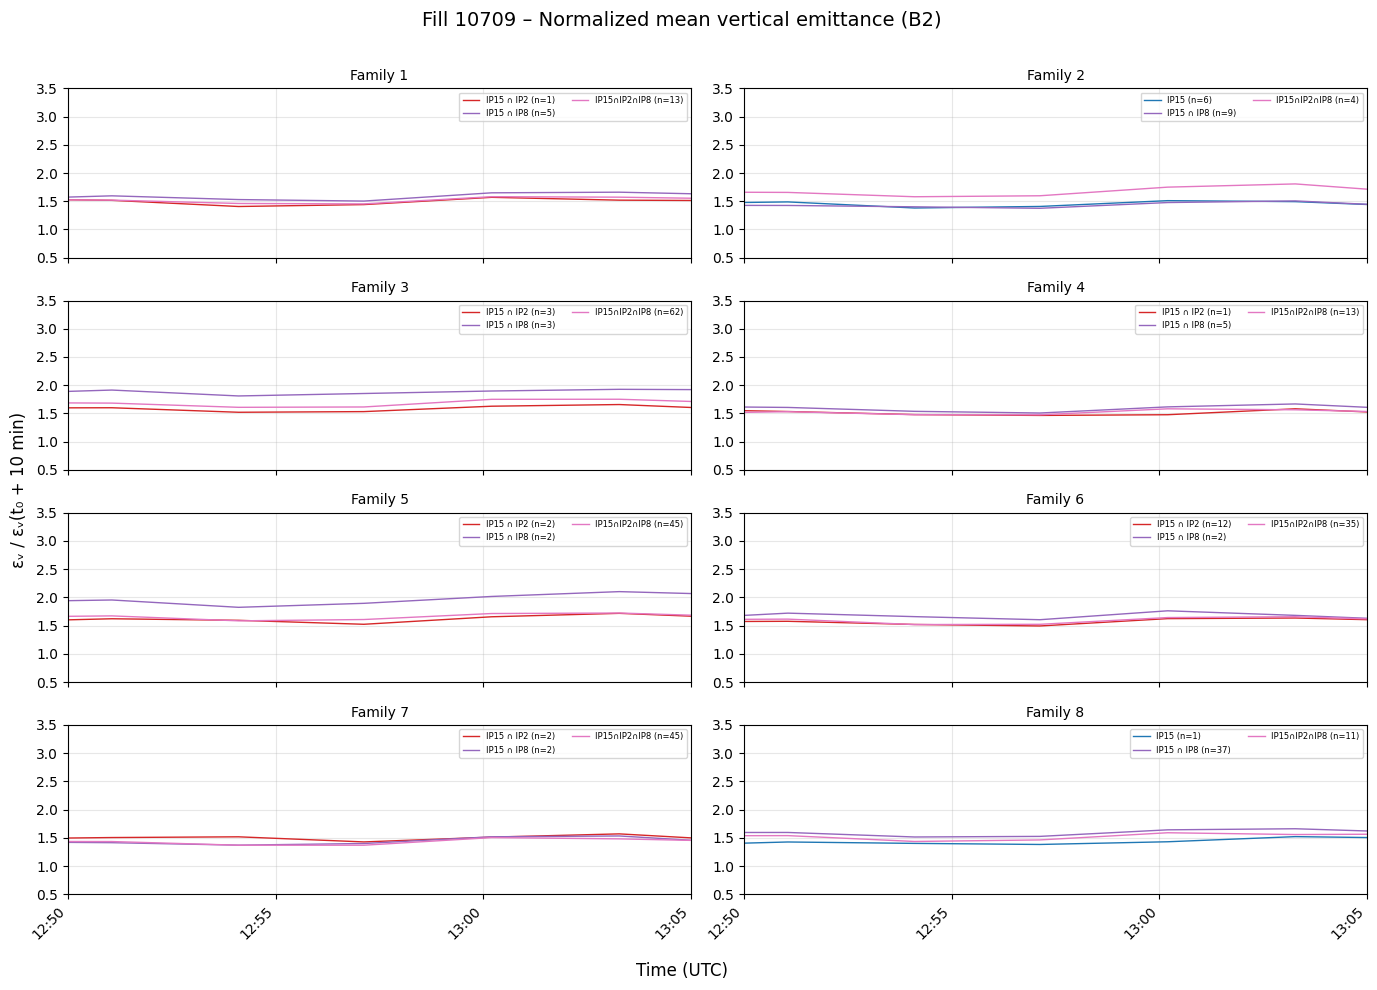

n  mean_norm  std_norm
Family   Group                                
Family 1 IP15 ∩ IP2     1   1.703501  0.262093
         IP15 ∩ IP8     5   1.817447  0.330667
         IP15∩IP2∩IP8  13   1.767047  0.300030
Family 2 IP15           6   1.784225  0.445339
         IP15 ∩ IP8     9   1.637062  0.423430
         IP15∩IP2∩IP8   4   2.161357  0.606844
Family 3 IP15 ∩ IP2     3   1.904652  0.349174
         IP15 ∩ IP8     3   2.121287  0.416726
         IP15∩IP2∩IP8  62   1.991690  0.409575
Family 4 IP15 ∩ IP2     1   1.601266  0.192214
         IP15 ∩ IP8     5   1.732386  0.248094
         IP15∩IP2∩IP8  13   1.637682  0.212214
Family 5 IP15 ∩ IP2     2   1.994383  0.416630
         IP15 ∩ IP8     2   2.289674  0.527893
         IP15∩IP2∩IP8  45   2.022321  0.456533
Family 6 IP15 ∩ IP2    12   1.952731  0.437144
         IP15 ∩ IP8     2   2.001223  0.430224
         IP15∩IP2∩IP8  35   1.963551  0.436369
Family 7 IP15 ∩ IP2     2   1.786280  0.331990
         IP15 ∩ IP8     2   1.754470  0.344837
         IP15∩IP2∩IP8  45   1.720668  0.343583
Family 8 IP15           1   1.740215  0.711031
         IP15 ∩ IP8    37   1.844059  0.379931
         IP15∩IP2∩IP8  11   1.933779  0.483328

In [89]:
# ── 4. Compute reference index at first 10 minutes ───────────────────────
ref_time = time_index_emit_V[0] + pd.Timedelta(minutes=10)
ref_idx  = (np.abs(time_index_emit_V - ref_time)).argmin()
print("Normalizing to closest sample at:", time_index_emit_V[ref_idx])

# ── 5. Helper & palette ───────────────────────────────────────────────────
def mean_curve(slots):
    slots = np.asarray(slots, int)
    return None if slots.size == 0 else np.nanmean(M_emit_V[:, slots], axis=1)

palette = plt.cm.get_cmap("tab10").colors

# ── 6. Plot normalized vertical emittance for eight families ─────────────
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
all_stats = []

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (grp_lbl, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue

        # normalize by the first-10-min value
        ref_val = curve[ref_idx]
        if not np.isfinite(ref_val) or ref_val == 0:
            continue
        norm_curve = curve / ref_val

        ax.plot(time_index_emit_V, norm_curve,
                label=f"{grp_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)

        all_stats.append({
            "Family":    fam_name,
            "Group":     grp_lbl,
            "n":         len(slots),
            "mean_norm": np.nanmean(norm_curve),
            "std_norm":  np.nanstd(norm_curve),
        })

    ax.set_title(fam_name, fontsize=10)
    ax.set_ylim(0.5, 3.5)
    ax.grid(alpha=0.3)
    ax.set_xlim(xmin,xmax)
    ax.legend(fontsize=6, ncol=2)

# ── 7. Format x-axis ──────────────────────────────────────────────────────
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# ── 8. Final touches ──────────────────────────────────────────────────────
fig.suptitle(
    f"Fill {fno} – Normalized mean vertical emittance ({beam})",
    fontsize=14
)
fig.supxlabel("Time (UTC)")
fig.supylabel("εᵥ / εᵥ(t₀ + 10 min)")
fig.tight_layout(rect=[0,0,1,0.97])
plt.show()

# ── 9. Display stats table ────────────────────────────────────────────────
stats_df = (
    pd.DataFrame(all_stats)
      .set_index(["Family", "Group"])
      .sort_index()
)
display(stats_df)










### Mean Emittance V classified by IP

/tmp/ipykernel_3449391/3063320897.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10").colors


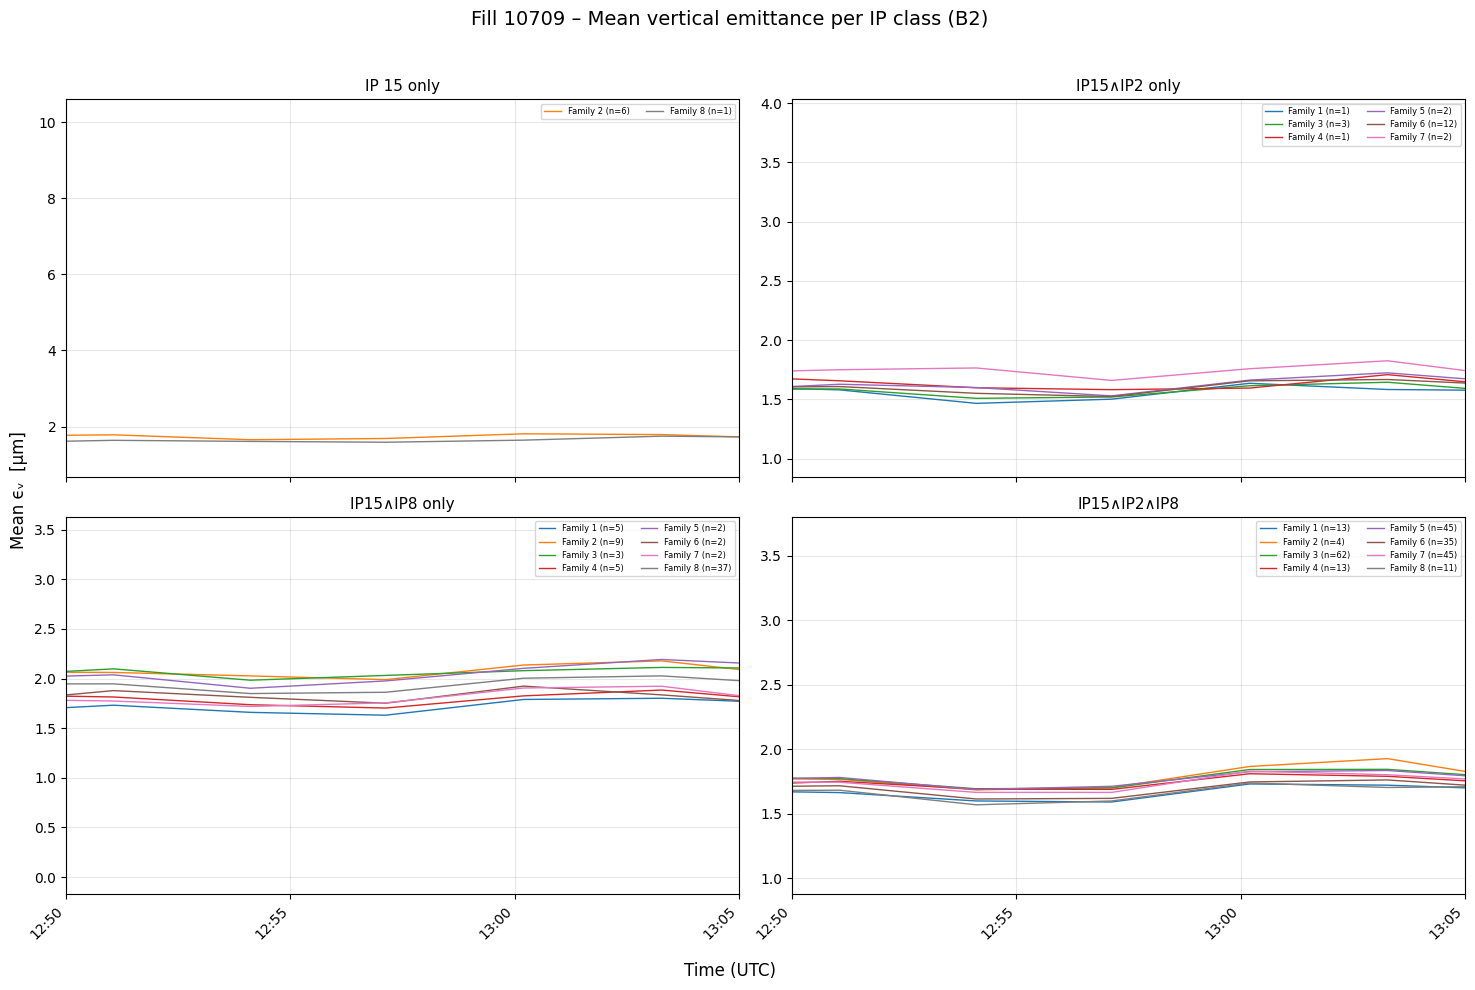

n      mean       std
IP class      Family                          
IP 15 only    Family 2   6  2.136945  0.533378
              Family 8   1  1.998370  0.816511
IP15∧IP2 only Family 1   1  1.775882  0.273229
              Family 3   3  1.889943  0.346477
              Family 4   1  1.729646  0.207624
              Family 5   2  2.001966  0.418214
              Family 6  12  1.992092  0.445955
              Family 7   2  2.077704  0.386153
IP15∧IP2∧IP8  Family 1  13  1.935540  0.328639
              Family 2   4  2.306126  0.647491
              Family 3  62  2.097985  0.431434
              Family 4  13  1.874585  0.242912
              Family 5  45  2.154512  0.486375
              Family 6  35  2.087932  0.464011
              Family 7  45  2.094020  0.418134
              Family 8  11  2.115072  0.528641
IP15∧IP8 only Family 1   5  1.971726  0.358737
              Family 2   9  2.367559  0.612376
              Family 3   3  2.324702  0.456686
              Family 4   5  1.956649  0.280211
              Family 5   2  2.387263  0.550392
              Family 6   2  2.184114  0.469542
              Family 7   2  2.200731  0.432548
              Family 8  37  2.250568  0.463684

In [90]:
# ── PARAMETERS ─────────────────────────────────────────────────────────────
# (assumes fno, beam, DATADIR, RAWPATH, FILLINFO already defined)
emit_V_var = f"LHC.BSRT.5L4.{beam}:BUNCH_EMITTANCE_V"

# ── 1. Load vertical‐emittance (εᵥ) data in the STABLE window ─────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (
    fbmodes.loc[fno]
           .query("BMODE=='STABLE'")
           .sort_values("tsStart")
)
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

ser = pd.read_parquet(
    RAWPATH / f"HX:FILLN={fno}",
    columns=[emit_V_var]
)[emit_V_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No vertical-emittance samples in STABLE window.")

M_emit_V          = np.stack(ser.values)  # shape: nTimes × 3564
time_index_emit_V = ser.index             # pandas.DatetimeIndex

palette = plt.cm.get_cmap("tab10").colors

# ── 2. Mean‐curve helper for εᵥ ───────────────────────────────────────────
def mean_curve(slots):
    slots = np.asarray(slots, int)
    if slots.size == 0:
        return None
    return np.nanmean(M_emit_V[:, slots], axis=1)
clean_IP_panels = {
    ip: arrs
    for ip, arrs in IP_panels.items()
    if any(slot_arr.size > 0 for slot_arr in arrs)
}

# ── 5. Make dynamic subplots ──────────────────────────────────────────────
n_panels = len(clean_IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

# ── 6. Plot & gather stats ───────────────────────────────────────────────
table_rows = []
for ax, (ip_label, fam_arrays) in zip(axes, clean_IP_panels.items()):
    for i, (fam_lbl, slots) in enumerate(zip(family_labels, fam_arrays)):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_emit_V, curve,
                label=f"{fam_lbl} (n={len(slots)})",
                color=palette[i], lw=1)
        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean"    : np.nanmean(curve),
            "std"     : np.nanstd(curve),
        })

    ax.set_title(ip_label, fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_xlim(xmin,xmax)
    ax.legend(fontsize=6, ncol=2)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
# ── 7. Final layout ──────────────────────────────────────────────────────
fig.suptitle(f"Fill {fno} – Mean vertical emittance per IP class ({beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean ϵᵥ  [µm]")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# ── 8. Stats table ───────────────────────────────────────────────────────
stats_df = (
    pd.DataFrame(table_rows)
      .set_index(["IP class","Family"])
      .sort_index()
)
display(stats_df)


Normalizing to closest sample at: 2025-06-11 04:41:48.577509+00:00


/tmp/ipykernel_3449391/2463392887.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10").colors


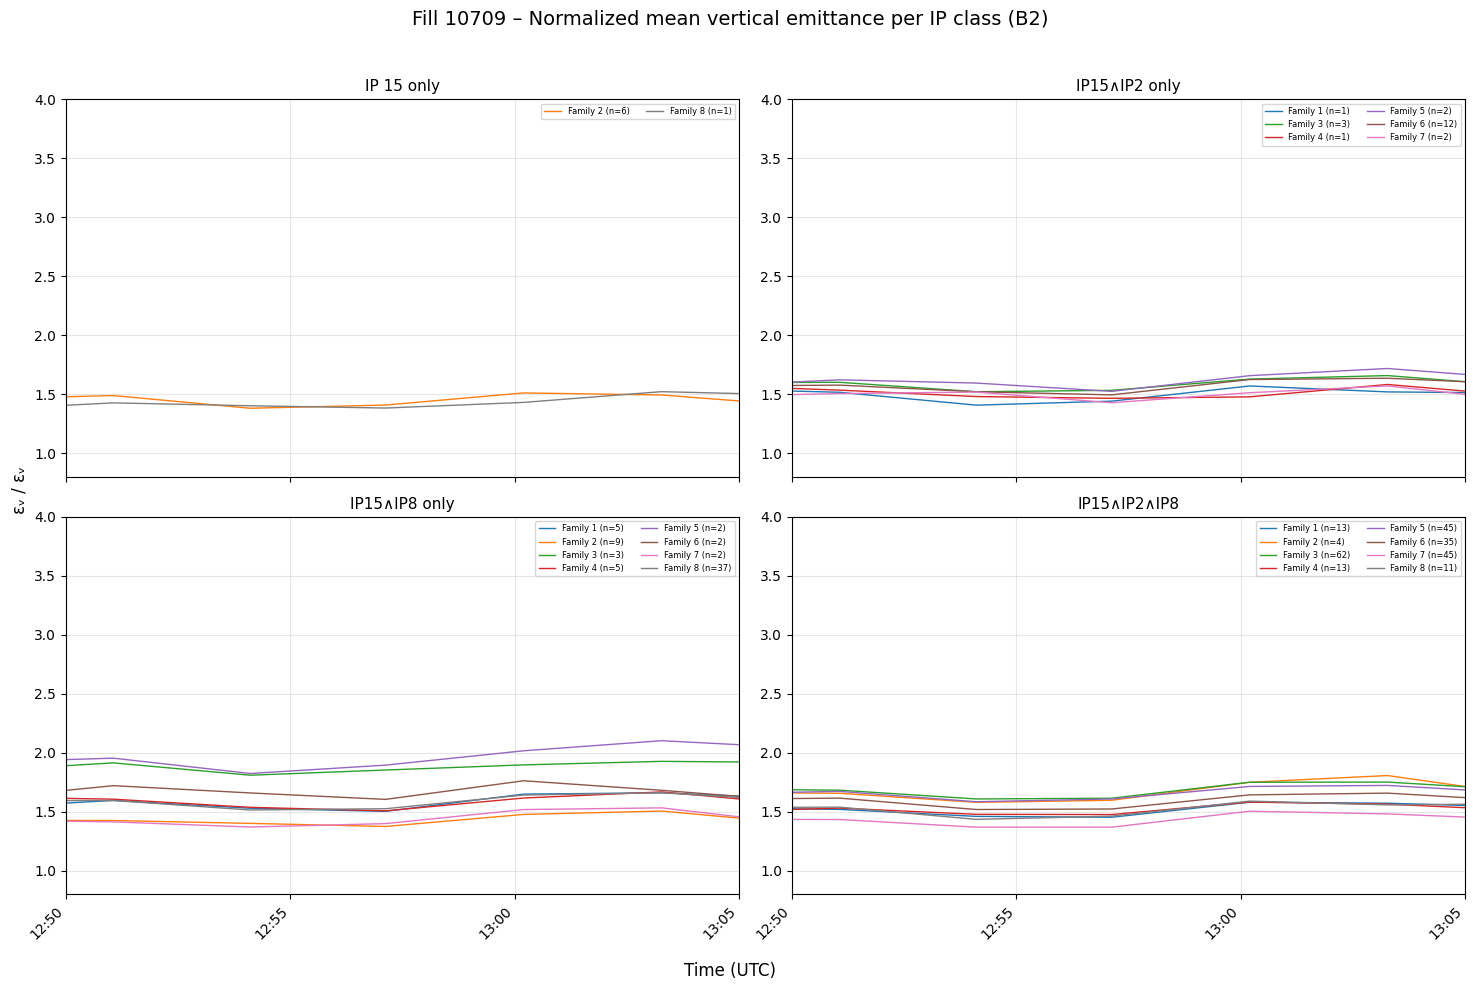

n  mean_norm  std_norm
IP class      Family                           
IP 15 only    Family 2   6   1.784225  0.445339
              Family 8   1   1.740215  0.711031
IP15∧IP2 only Family 1   1   1.703501  0.262093
              Family 3   3   1.904652  0.349174
              Family 4   1   1.601266  0.192214
              Family 5   2   1.994383  0.416630
              Family 6  12   1.952731  0.437144
              Family 7   2   1.786280  0.331990
IP15∧IP2∧IP8  Family 1  13   1.767047  0.300030
              Family 2   4   2.161357  0.606844
              Family 3  62   1.991690  0.409575
              Family 4  13   1.637682  0.212214
              Family 5  45   2.022321  0.456533
              Family 6  35   1.963551  0.436369
              Family 7  45   1.720668  0.343583
              Family 8  11   1.933779  0.483328
IP15∧IP8 only Family 1   5   1.817447  0.330667
              Family 2   9   1.637062  0.423430
              Family 3   3   2.121287  0.416726
              Family 4   5   1.732386  0.248094
              Family 5   2   2.289674  0.527893
              Family 6   2   2.001223  0.430224
              Family 7   2   1.754470  0.344837
              Family 8  37   1.844059  0.379931

In [91]:
ref_time = time_index_emit_V[0] + pd.Timedelta(minutes=10)
ref_idx  = (np.abs(time_index_emit_V - ref_time)).argmin()
print("Normalizing to closest sample at:", time_index_emit_V[ref_idx])

# ── 3. Mean‐curve helper for εᵥ ───────────────────────────────────────────
def mean_curve(slots):
    slots = np.asarray(slots, int)
    return None if slots.size == 0 else np.nanmean(M_emit_V[:, slots], axis=1)

# ── 4. Clean IP_panels ────────────────────────────────────────────────────
clean_IP_panels = {
    ip: arrs
    for ip, arrs in IP_panels.items()
    if any(np.asarray(a, int).size > 0 for a in arrs)
}

# ── 5. Prepare plotting grid ─────────────────────────────────────────────
n_panels = len(clean_IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

palette = plt.cm.get_cmap("tab10").colors
table_rows = []

# ── 6. Plot & gather normalized stats ────────────────────────────────────
for ax, (ip_label, fam_arrays) in zip(axes, clean_IP_panels.items()):
    for i, (fam_lbl, slots) in enumerate(zip(family_labels, fam_arrays)):
        curve = mean_curve(slots)
        if curve is None:
            continue

        # normalize at first 10 min
        ref_val = curve[ref_idx]
        if not np.isfinite(ref_val) or ref_val == 0:
            continue
        norm_curve = curve / ref_val

        ax.plot(time_index_emit_V, norm_curve,
                label=f"{fam_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)

        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean_norm": np.nanmean(norm_curve),
            "std_norm" : np.nanstd(norm_curve),
        })

    ax.set_title(ip_label, fontsize=11)
    ax.set_ylim(0.8, 4)
    ax.set_xlim(xmin,xmax)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=6, ncol=2)

# ── 7. Shared x-axis formatting ───────────────────────────────────────────
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# ── 8. Final layout ──────────────────────────────────────────────────────
fig.suptitle(f"Fill {fno} – Normalized mean vertical emittance per IP class ({beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("εᵥ / εᵥ")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# ── 9. Display stats table ────────────────────────────────────────────────
stats_df = (
    pd.DataFrame(table_rows)
      .set_index(["IP class", "Family"])
      .sort_index()
)
display(stats_df)










### Zoom in

In [75]:
# 1) Build the stats table for εᵥ
big_rows_emitV = []
for ip, fam_arrays in IP_panels.items():
    for fam_lbl, slots in zip(family_labels, fam_arrays):
        if slots.size == 0:
            continue
        y = np.nanmean(M_emit_V[:, slots], axis=1)
        big_rows_emitV.append({
            "IP class": ip,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean"    : np.nanmean(y),
            "std"     : np.nanstd(y),
        })

stats_emitV_df = (
    pd.DataFrame(big_rows_emitV)
      .set_index(["IP class", "Family"])
      .sort_index()
)

# 2) Zoom plot helper for εᵥ
def plot_single_emitV(*, ip_class=None, family=None):
    """
    Zoom plot of mean vertical emittance (εᵥ) for Beam 2.
    Specify exactly one of ip_class or family.
    """
    if (ip_class is None) == (family is None):
        raise ValueError("Specify exactly one of ip_class or family")

    plt.figure(figsize=(10, 3))

    if ip_class is not None:
        curves = zip(family_labels, IP_panels[ip_class])
        title  = ip_class
        table  = stats_emitV_df.loc[ip_class]
    else:
        fam_long = family if family.startswith("Family") else f"Family {family}"
        if fam_long not in families:
            raise KeyError(f"Family '{family}' not found.")
        curves = families[fam_long].items()
        title  = fam_long
        table  = stats_emitV_df.xs(fam_long, level="Family", drop_level=False)

    for i, (lbl, slots) in enumerate(curves):
        s = np.asarray(slots, int)
        if s.size == 0:
            continue
        y = np.nanmean(M_emit_V[:, s], axis=1)
        plt.plot(time_index_emit_V, y,
                 label=f"{lbl} (n={len(s)})",
                 color=palette[i % len(palette)],
                 lw=1.3)

    plt.title(f"Fill {fno} – Mean vertical emittance εᵥ  ({beam})  ·  {title}")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Mean εᵥ  [µm]")
    plt.grid(alpha=0.3)
    plt.legend(fontsize=8, ncol=2)
    plt.tight_layout()
    plt.show()

    display(table)


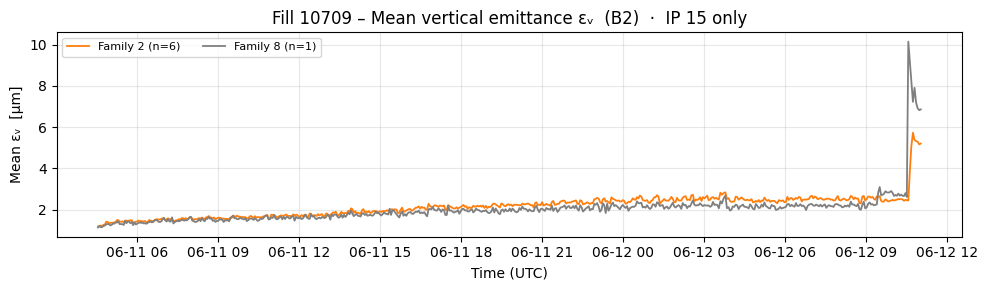

,n,mean,std
Family,,,
Family 2,6,2.136945,0.533378
Family 8,1,1.998370,0.816511


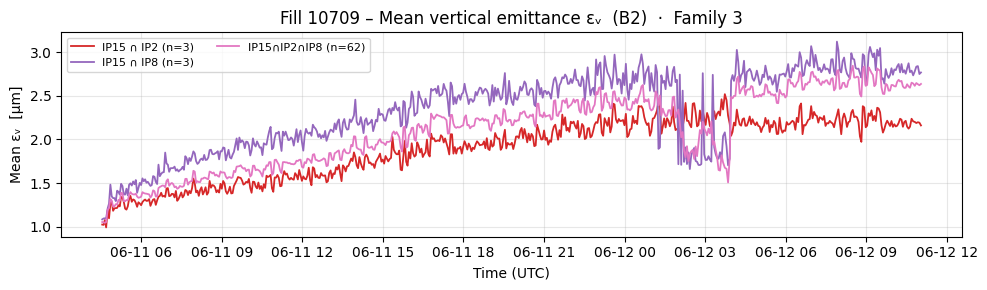

,,n,mean,std
IP class,Family,,,
IP15∧IP2 only,Family 3,3,1.889943,0.346477
IP15∧IP2∧IP8,Family 3,62,2.097985,0.431434
IP15∧IP8 only,Family 3,3,2.324702,0.456686


In [76]:
# Show all families at IP15
plot_single_emitV(ip_class="IP 15 only")

# Or show all IP classes for “Family 3”
plot_single_emitV(family="Family 3")


## ATLAS LUMI

/tmp/ipykernel_3449391/195298531.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette    = plt.cm.get_cmap("tab10").colors


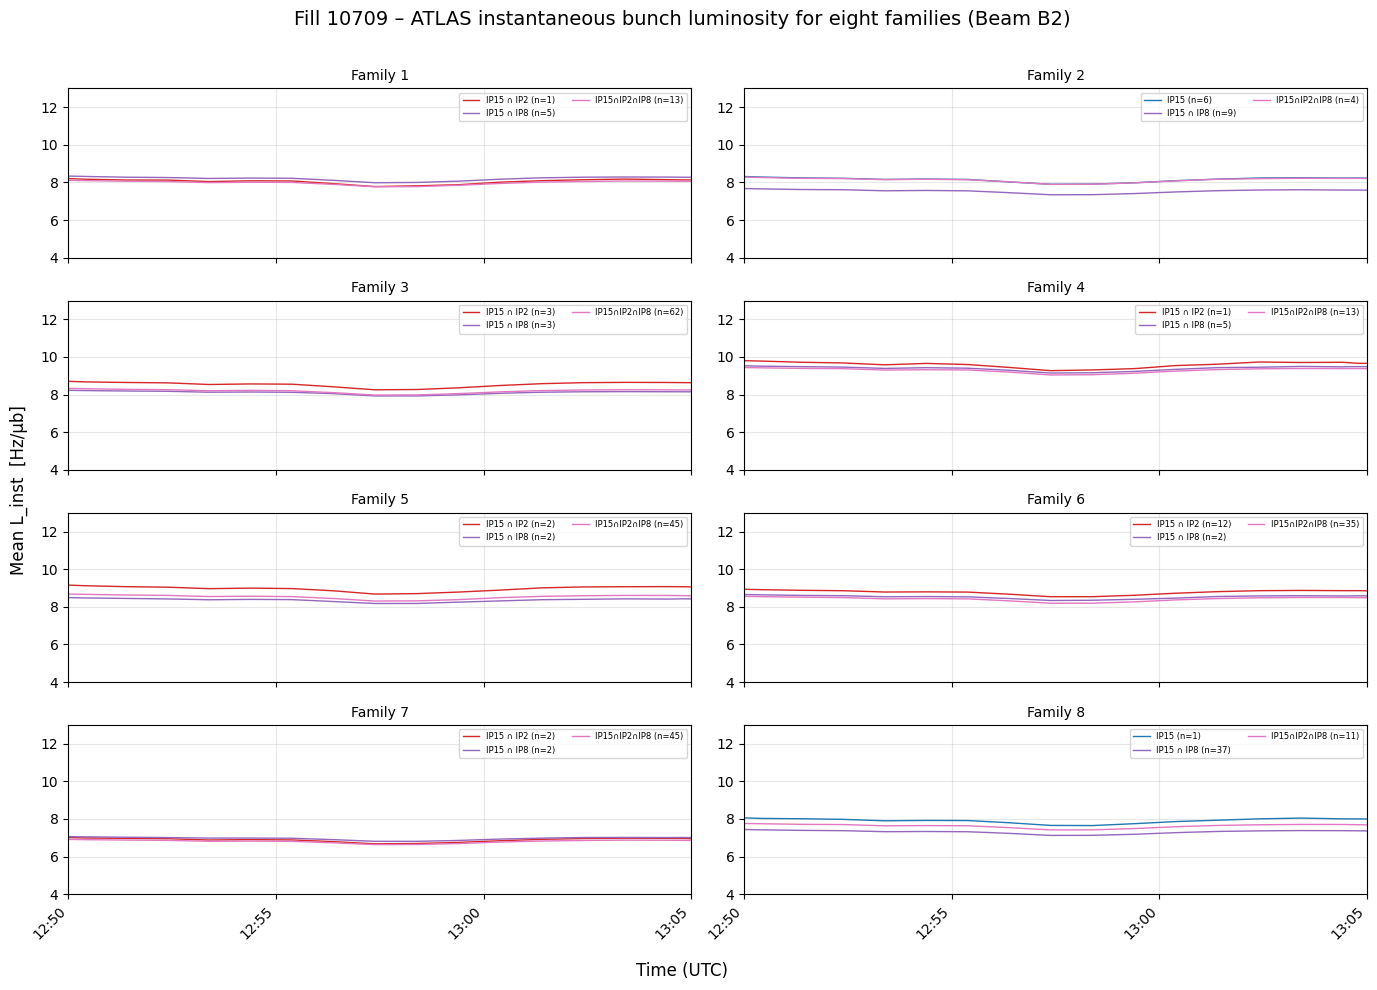

n      mean       std
Family   Group                               
Family 1 IP15 ∩ IP2     1  5.220138  2.660862
         IP15 ∩ IP8     5  5.176699  2.551162
         IP15∩IP2∩IP8  13  5.054994  2.524906
Family 2 IP15           6  5.041430  2.886147
         IP15 ∩ IP8     9  4.581619  2.680591
         IP15∩IP2∩IP8   4  4.893904  2.974800
Family 3 IP15 ∩ IP2     3  5.289004  2.941424
         IP15 ∩ IP8     3  4.852441  2.602707
         IP15∩IP2∩IP8  62  4.901736  2.716037
Family 4 IP15 ∩ IP2     1  6.197955  3.294362
         IP15 ∩ IP8     5  5.859152  2.962004
         IP15∩IP2∩IP8  13  5.843097  3.016792
Family 5 IP15 ∩ IP2     2  5.543740  3.134913
         IP15 ∩ IP8     2  4.983625  2.778233
         IP15∩IP2∩IP8  45  5.092005  2.884434
Family 6 IP15 ∩ IP2    12  5.339982  2.926017
         IP15 ∩ IP8     2  5.130797  2.689588
         IP15∩IP2∩IP8  35  5.102167  2.814033
Family 7 IP15 ∩ IP2     2  4.308350  2.183419
         IP15 ∩ IP8     2  4.201776  2.049454
         IP15∩IP2∩IP8  45  4.128373  2.120800
Family 8 IP15           1  4.935406  2.678685
         IP15 ∩ IP8    37  4.412355  2.399710
         IP15∩IP2∩IP8  11  4.556166  2.548656

In [77]:

fno   = 10709
beam  = "B2"   # Not used directly but kept for clarity
atlas_lumi_var = "ATLAS:BUNCH_LUMI_INST"

DATADIR  = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH  = DATADIR / "rawdata"
FILLINFO = DATADIR / "fills-info"
# ── STABLE window
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno]
                    .query("BMODE=='STABLE'")
                    .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

# ── Load ATLAS lumi
ser = (pd.read_parquet(RAWPATH / f"HX:FILLN={fno}",
                       columns=[atlas_lumi_var])[atlas_lumi_var])
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No ATLAS per-bunch lumi samples in STABLE window.")

M_atlas          = np.stack(ser.values)        # nTimes × 3564
time_index_atlas = ser.index
palette    = plt.cm.get_cmap("tab10").colors
plot_date = time_index_atlas[0].date().isoformat()
#xmin = pd.to_datetime(f"{plot_date} 05:00:00+00:00")
#xmax = pd.to_datetime(f"{plot_date} 15:30:00+00:00")
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")

def a(x): return np.asarray(x, int)
def mean_curve(slots):
    return None if slots.size == 0 else np.nanmean(M_atlas[:, slots], axis=1)

fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
all_stats = []

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (grp_lbl, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_atlas, curve,
                label=f"{grp_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)
        all_stats.append({
            "Family": fam_name,
            "Group" : grp_lbl,
            "n"     : len(slots),
            "mean"  : np.nanmean(curve),
            "std"   : np.nanstd(curve),
        })
    ax.set_title(fam_name, fontsize=10)
    ax.grid(alpha=.3)
    ax.set_ylim(4, 13)
    # ← set x‐limits here
    ax.set_xlim(xmin, xmax)
    ax.legend(fontsize=6, ncol=2)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f"Fill {fno} – ATLAS instantaneous bunch luminosity for eight families (Beam {beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean L_inst  [Hz/µb]")
fig.tight_layout(rect=[0,0,1,0.97])
plt.show()

stats_df = (pd.DataFrame(all_stats)
            .set_index(["Family", "Group"])
            .sort_index())
display(stats_df)


/tmp/ipykernel_3449391/1633782223.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette          = plt.cm.get_cmap("tab10").colors


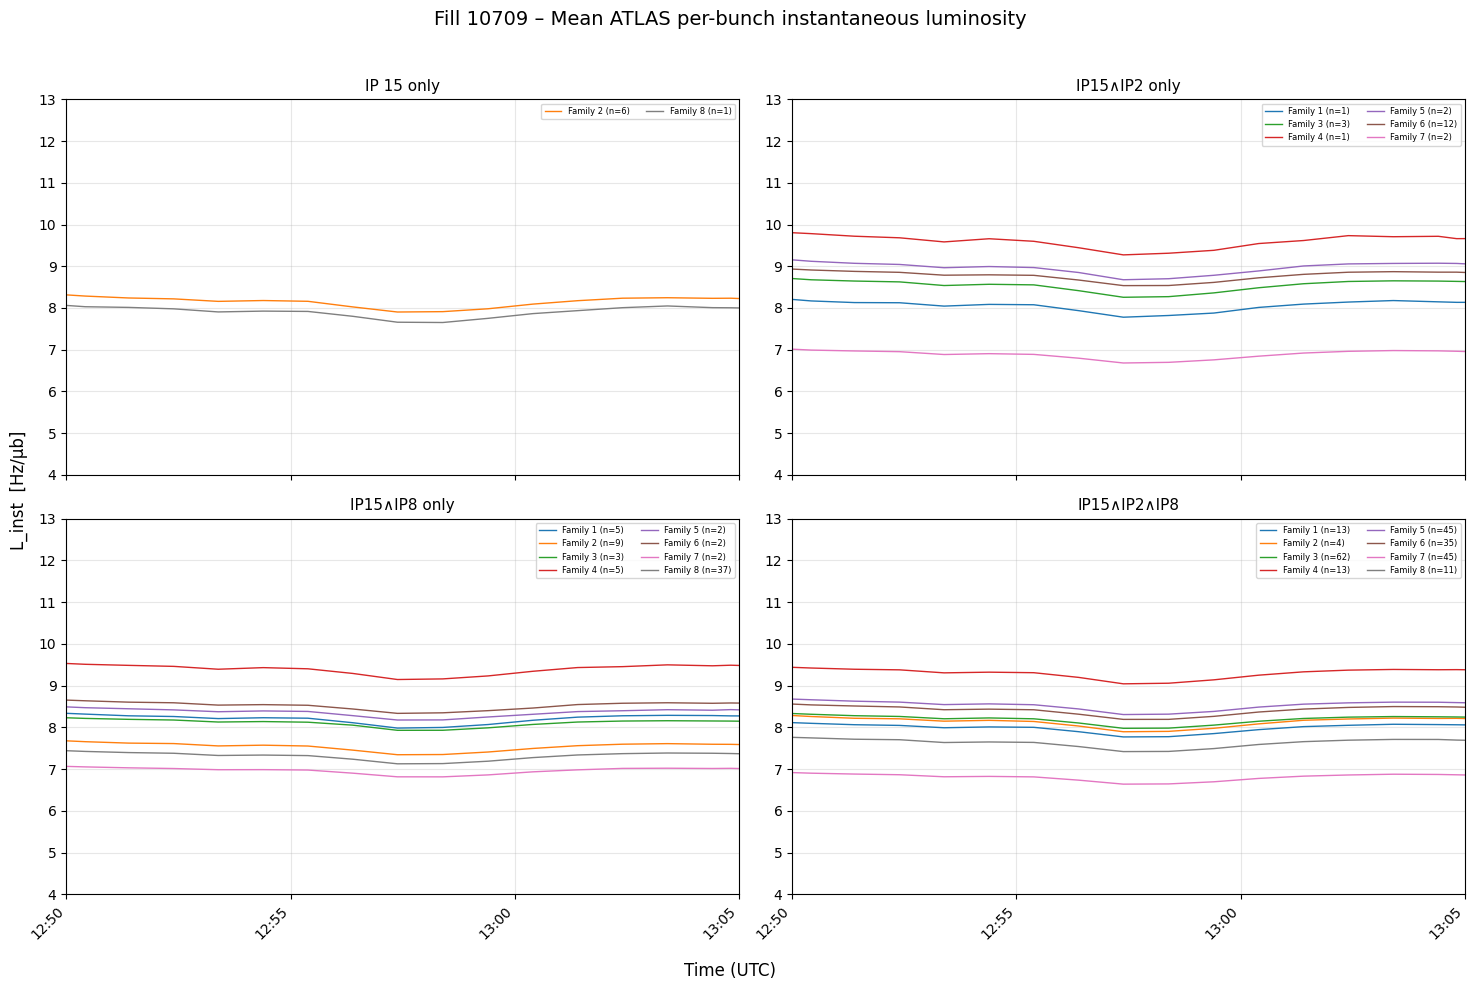

n      mean       std
IP class      Family                          
IP 15 only    Family 2   6  5.041430  2.886147
              Family 8   1  4.935406  2.678685
IP15∧IP2 only Family 1   1  5.220138  2.660862
              Family 3   3  5.289004  2.941424
              Family 4   1  6.197955  3.294362
              Family 5   2  5.543740  3.134913
              Family 6  12  5.339982  2.926017
              Family 7   2  4.308350  2.183419
IP15∧IP2∧IP8  Family 1  13  5.054994  2.524906
              Family 2   4  4.893904  2.974800
              Family 3  62  4.901736  2.716037
              Family 4  13  5.843097  3.016792
              Family 5  45  5.092005  2.884434
              Family 6  35  5.102167  2.814033
              Family 7  45  4.128373  2.120800
              Family 8  11  4.556166  2.548656
IP15∧IP8 only Family 1   5  5.176699  2.551162
              Family 2   9  4.581619  2.680591
              Family 3   3  4.852441  2.602707
              Family 4   5  5.859152  2.962004
              Family 5   2  4.983625  2.778233
              Family 6   2  5.130797  2.689588
              Family 7   2  4.201776  2.049454
              Family 8  37  4.412355  2.399710

In [78]:
# ── PARAMETERS ─────────────────────────────────────────────────────────────
atlas_lumi_var = "ATLAS:BUNCH_LUMI_INST"

# ── 1. STABLE-beam window ─────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno]
                  .query("BMODE=='STABLE'")
                  .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

# ── 2. Load ATLAS per-bunch lumi and slice to STABLE interval ────────────
ser = pd.read_parquet(
    RAWPATH / f"HX:FILLN={fno}",
    columns=[atlas_lumi_var]
)[atlas_lumi_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No ATLAS per-bunch lumi samples in STABLE window.")

M_atlas          = np.stack(ser.values)        # shape: nTimes × 3564
time_index_atlas = ser.index                   # pandas.DatetimeIndex
palette          = plt.cm.get_cmap("tab10").colors

# ── 3. Mean-curve helper for ATLAS L_inst ─────────────────────────────────
def mean_curve_atlas(slots):
    slots = np.asarray(slots, int)
    if slots.size == 0:
        return None
    return np.nanmean(M_atlas[:, slots], axis=1)

# ── 4. Clean out any IP classes with no slots in all families ────────────
clean_IP_panels = {
    ip: arrs
    for ip, arrs in IP_panels.items()
    if any(np.asarray(a, int).size > 0 for a in arrs)
}
plot_date = time_index_atlas[0].date().isoformat()
#xmin = pd.to_datetime(f"{plot_date} 05:00:00+00:00")
#xmax = pd.to_datetime(f"{plot_date} 15:30:00+00:00")
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")
# ── 5. Dynamic subplot grid ──────────────────────────────────────────────
n_panels = len(clean_IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

# ── 6. Plot & gather statistics ──────────────────────────────────────────
table_rows = []
for ax, (ip_label, fam_arrays) in zip(axes, clean_IP_panels.items()):
    for i, (fam_lbl, slots) in enumerate(zip(family_labels, fam_arrays)):
        curve = mean_curve_atlas(slots)
        if curve is None:
            continue
        ax.plot(time_index_atlas, curve,
                label=f"{fam_lbl} (n={len(slots)})",
                color=palette[i], lw=1)
        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean"    : np.nanmean(curve),
            "std"     : np.nanstd(curve),
        })

    ax.set_title(ip_label, fontsize=11)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=6, ncol=2)
    ax.set_ylim(4, 13)
    # ← set x‐limits here
    ax.set_xlim(xmin, xmax)
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
# ── 7. Final layout ──────────────────────────────────────────────────────
fig.suptitle(f"Fill {fno} – Mean ATLAS per-bunch instantaneous luminosity", fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("L_inst  [Hz/µb]")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# ── 8. Display statistics table ──────────────────────────────────────────
stats_atlas_df = (
    pd.DataFrame(table_rows)
      .set_index(["IP class", "Family"])
      .sort_index()
)
display(stats_atlas_df)


## CMS LUMI

/tmp/ipykernel_3449391/801646782.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette    = plt.cm.get_cmap("tab10").colors


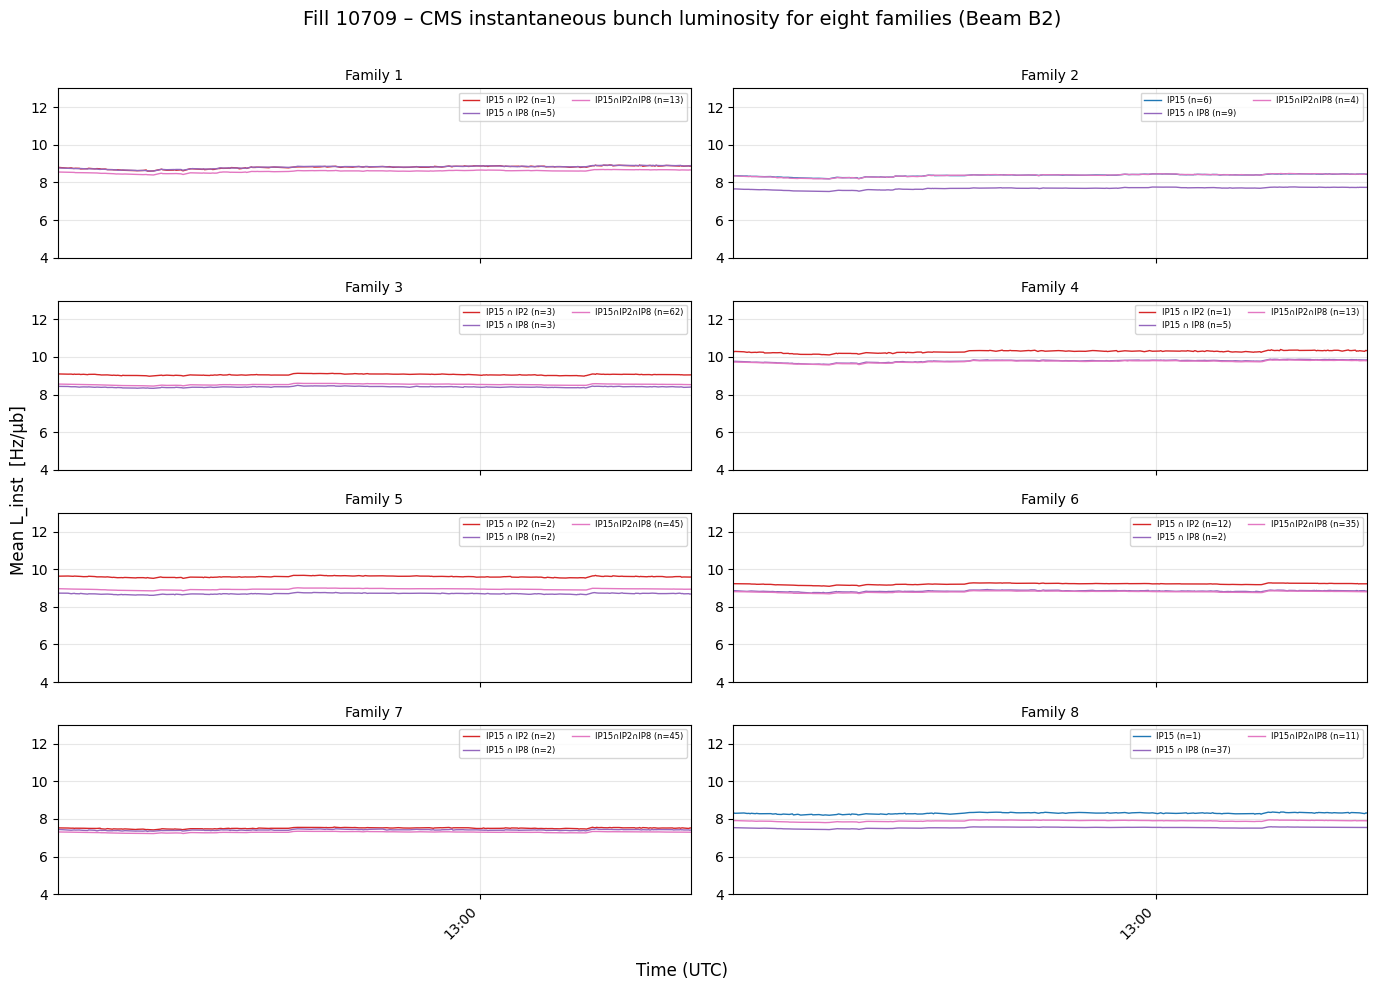

n      mean       std
Family   Group                               
Family 1 IP15 ∩ IP2     1  5.606428  2.728873
         IP15 ∩ IP8     5  5.617649  2.706837
         IP15∩IP2∩IP8  13  5.470940  2.658878
Family 2 IP15           6  5.216142  2.843527
         IP15 ∩ IP8     9  4.760737  2.696020
         IP15∩IP2∩IP8   4  5.078778  2.973944
Family 3 IP15 ∩ IP2     3  5.387758  2.707116
         IP15 ∩ IP8     3  5.098921  2.591379
         IP15∩IP2∩IP8  62  5.088347  2.634847
Family 4 IP15 ∩ IP2     1  6.475646  3.179183
         IP15 ∩ IP8     5  6.247006  3.032778
         IP15∩IP2∩IP8  13  6.194942  3.047344
Family 5 IP15 ∩ IP2     2  5.691314  2.941045
         IP15 ∩ IP8     2  5.224859  2.772016
         IP15∩IP2∩IP8  45  5.291870  2.821862
Family 6 IP15 ∩ IP2    12  5.559505  2.842452
         IP15 ∩ IP8     2  5.384821  2.648610
         IP15∩IP2∩IP8  35  5.288299  2.726159
Family 7 IP15 ∩ IP2     2  4.534250  2.113208
         IP15 ∩ IP8     2  4.463221  2.047515
         IP15∩IP2∩IP8  45  4.357821  2.100135
Family 8 IP15           1  5.060337  2.487217
         IP15 ∩ IP8    37  4.567786  2.322125
         IP15∩IP2∩IP8  11  4.679441  2.429275

In [81]:

fno          = 10709
beam         = "B2"                # just for title clarity
cms_lumi_var = "CMS:BUNCH_LUMI_INST"

DATADIR  = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH  = DATADIR / "rawdata"
FILLINFO = DATADIR / "fills-info"

# ── STABLE window
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno]
                    .query("BMODE=='STABLE'")
                    .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

# ── Load ATLAS lumi
ser = (pd.read_parquet(RAWPATH / f"HX:FILLN={fno}",
                       columns=[cms_lumi_var])[cms_lumi_var])
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No ATLAS per-bunch lumi samples in STABLE window.")

M_cms          = np.stack(ser.values)        # nTimes × 3564
time_index_cms = ser.index
palette    = plt.cm.get_cmap("tab10").colors

def a(x): return np.asarray(x, int)
def mean_curve(slots):
    return None if slots.size == 0 else np.nanmean(M_cms[:, slots], axis=1)

fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()
all_stats = []
plot_date = time_index_cms[0].date().isoformat()
#xmin = pd.to_datetime(f"{plot_date} 05:00:00+00:00")
#xmax = pd.to_datetime(f"{plot_date} 15:30:00+00:00")
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")

for ax, (fam_name, fam_groups) in zip(axes, families.items()):
    for i, (grp_lbl, slots) in enumerate(fam_groups.items()):
        curve = mean_curve(slots)
        if curve is None:
            continue
        ax.plot(time_index_cms, curve,
                label=f"{grp_lbl} (n={len(slots)})",
                color=palette[i % len(palette)], lw=1)
        all_stats.append({
            "Family": fam_name,
            "Group" : grp_lbl,
            "n"     : len(slots),
            "mean"  : np.nanmean(curve),
            "std"   : np.nanstd(curve),
        })
    ax.set_title(fam_name, fontsize=10)
    ax.grid(alpha=.3)
    ax.legend(fontsize=6, ncol=2)
    ax.set_ylim(4, 13)
    # ← set x‐limits here
    ax.set_xlim(xmin, xmax)
locator   = mdates.HourLocator(byhour=range(3,24,2))
formatter = mdates.DateFormatter('%H:%M')

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(alpha=0.3)

# rotate labels on bottom row
for ax in axes[-2:]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f"Fill {fno} – CMS instantaneous bunch luminosity for eight families (Beam {beam})",
             fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("Mean L_inst  [Hz/µb]")
fig.tight_layout(rect=[0,0,1,0.97])
plt.show()

stats_df = (pd.DataFrame(all_stats)
            .set_index(["Family", "Group"])
            .sort_index())
display(stats_df)



/tmp/ipykernel_3449391/1898266714.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette        = plt.cm.get_cmap("tab10").colors


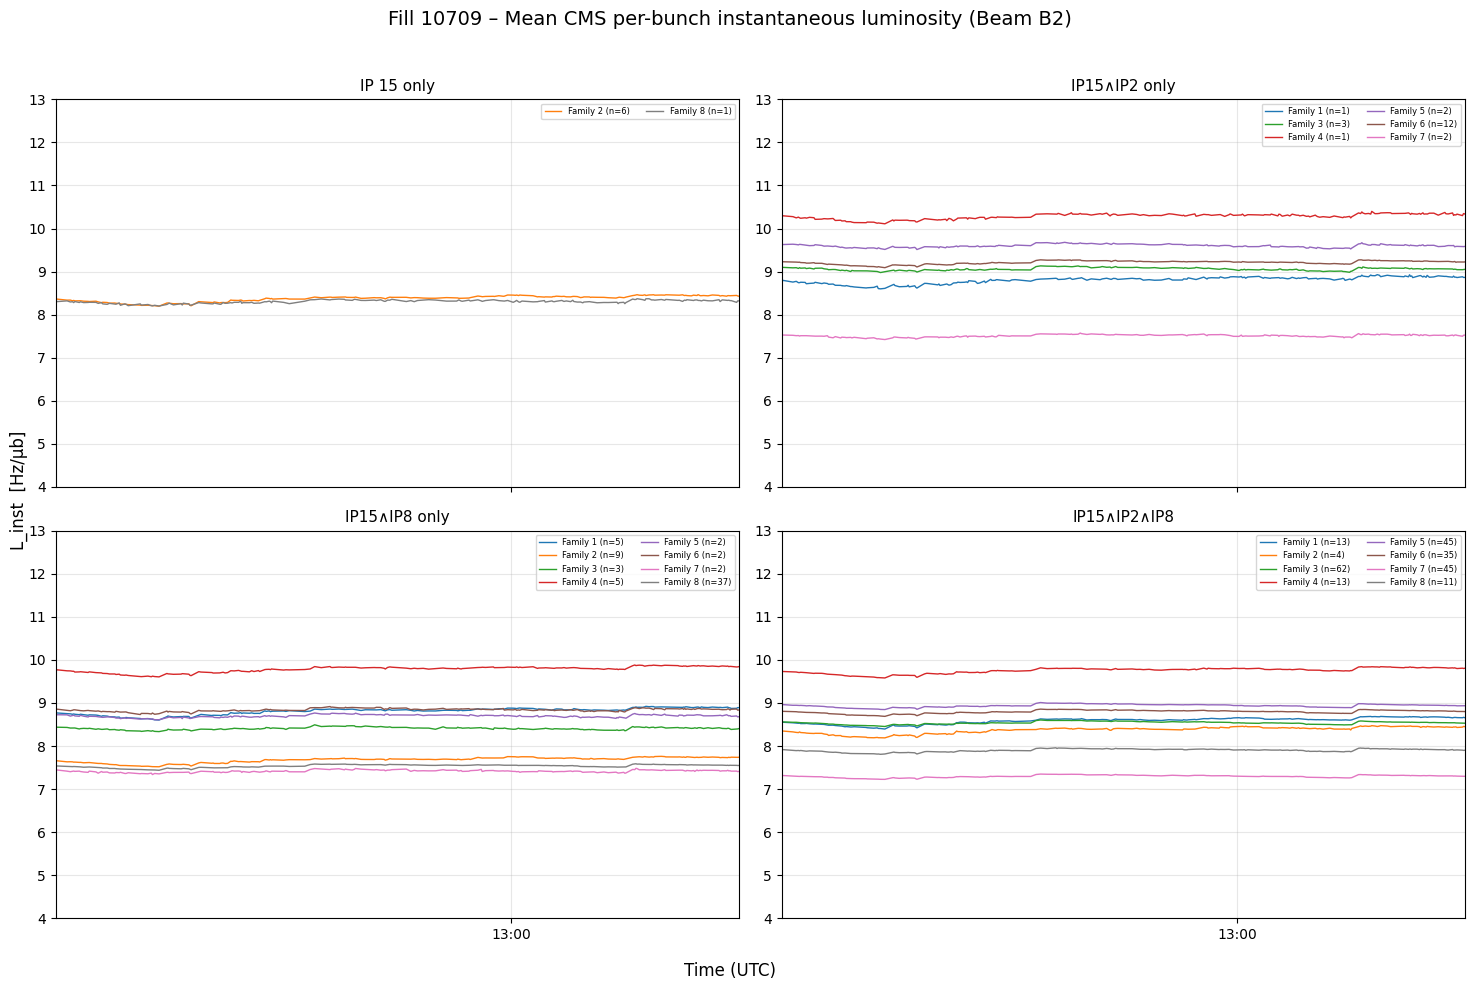

n      mean       std
IP class      Family                          
IP 15 only    Family 2   6  5.216142  2.843527
              Family 8   1  5.060337  2.487217
IP15∧IP2 only Family 1   1  5.606428  2.728873
              Family 3   3  5.387758  2.707116
              Family 4   1  6.475646  3.179183
              Family 5   2  5.691314  2.941045
              Family 6  12  5.559505  2.842452
              Family 7   2  4.534250  2.113208
IP15∧IP2∧IP8  Family 1  13  5.470940  2.658878
              Family 2   4  5.078778  2.973944
              Family 3  62  5.088347  2.634847
              Family 4  13  6.194942  3.047344
              Family 5  45  5.291870  2.821862
              Family 6  35  5.288299  2.726159
              Family 7  45  4.357821  2.100135
              Family 8  11  4.679441  2.429275
IP15∧IP8 only Family 1   5  5.617649  2.706837
              Family 2   9  4.760737  2.696020
              Family 3   3  5.098921  2.591379
              Family 4   5  6.247006  3.032778
              Family 5   2  5.224859  2.772016
              Family 6   2  5.384821  2.648610
              Family 7   2  4.463221  2.047515
              Family 8  37  4.567786  2.322125

In [82]:
fno         = 10709
beam        = "B2"               # just for titles
cms_lumi_var = "CMS:BUNCH_LUMI_INST"

DATADIR  = Path("/eos/project/l/lhc-lumimod/LuminosityFollowUp/2025/")
RAWPATH  = DATADIR / "rawdata"
FILLINFO = DATADIR / "fills-info"

# ── 1. STABLE‐beam window ─────────────────────────────────────────────────
fbmodes = pd.read_parquet(FILLINFO / "fills_and_bmodes_2025.parquet")
rowST   = (fbmodes.loc[fno]
                  .query("BMODE=='STABLE'")
                  .sort_values("tsStart"))
if rowST.empty:
    rowST = fbmodes.loc[fno].sort_values("tsEnd").iloc[[-1]]

t_start = pd.to_datetime(rowST["tsStart"].iloc[0], utc=True)
t_end   = pd.to_datetime(rowST["tsEnd"].iloc[0],   utc=True)

# ── 2. Load CMS per‐bunch lumi and slice to STABLE interval ───────────────
ser = pd.read_parquet(
    RAWPATH / f"HX:FILLN={fno}",
    columns=[cms_lumi_var]
)[cms_lumi_var]
ser.index = pd.to_datetime(ser.index, utc=True, errors="coerce").sort_values()
ser = ser[(ser.index >= t_start) & (ser.index <= t_end)].dropna()
if ser.empty:
    raise RuntimeError("No CMS per-bunch lumi samples in STABLE window.")

M_cms          = np.stack(ser.values)        # shape: nTimes × 3564
time_index_cms = ser.index                   # pandas.DatetimeIndex
palette        = plt.cm.get_cmap("tab10").colors

# ── 3. Mean‐curve helper for CMS L_inst ───────────────────────────────────
def mean_curve_cms(slots):
    slots = np.asarray(slots, int)
    if slots.size == 0:
        return None
    return np.nanmean(M_cms[:, slots], axis=1)

# ── 4. Drop any IP classes where all eight families are empty ────────────
clean_IP_panels = {
    ip: arrs
    for ip, arrs in IP_panels.items()
    if any(np.asarray(a, int).size > 0 for a in arrs)
}

# ── 5. Make a dynamic subplot grid ───────────────────────────────────────
n_panels = len(clean_IP_panels)
ncols    = 2
nrows    = math.ceil(n_panels / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows), sharex=True)
axes = axes.flatten()[:n_panels]

# ── 6. Plot & collect stats ─────────────────────────────────────────────
table_rows = []
family_labels = [
    "Family 1","Family 2","Family 3","Family 4",
    "Family 5","Family 6","Family 7","Family 8"
]
window_start = "12:50"   # ← change this
window_end   = "13:05"   # ← and this

xmin = pd.to_datetime(f"{plot_date} {window_start}:00+00:00")
xmax = pd.to_datetime(f"{plot_date} {window_end  }:00+00:00")
for ax, (ip_label, fam_arrays) in zip(axes, clean_IP_panels.items()):
    for i, (fam_lbl, slots) in enumerate(zip(family_labels, fam_arrays)):
        curve = mean_curve_cms(slots)
        if curve is None:
            continue
        ax.plot(time_index_cms, curve,
                label=f"{fam_lbl} (n={len(slots)})",
                color=palette[i], lw=1)
        table_rows.append({
            "IP class": ip_label,
            "Family"  : fam_lbl,
            "n"       : len(slots),
            "mean"    : np.nanmean(curve),
            "std"     : np.nanstd(curve),
        })

    ax.set_title(ip_label, fontsize=11)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=6, ncol=2)
    ax.set_ylim(4, 13)
    # ← set x‐limits here
    ax.set_xlim(xmin, xmax)
locator   = mdates.HourLocator(byhour=range(3,24,2))
formatter = mdates.DateFormatter('%H:%M')

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(alpha=0.3)

# rotate labels on bottom row
# ── 7. Final layout ──────────────────────────────────────────────────────
fig.suptitle(f"Fill {fno} – Mean CMS per-bunch instantaneous luminosity (Beam {beam})", fontsize=14)
fig.supxlabel("Time (UTC)")
fig.supylabel("L_inst  [Hz/µb]")
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

# ── 8. Display stats table ───────────────────────────────────────────────
stats_cms_df = (
    pd.DataFrame(table_rows)
      .set_index(["IP class","Family"])
      .sort_index()
)
display(stats_cms_df)
